In [1]:
from chardet.universaldetector import UniversalDetector

detector = UniversalDetector()
detector.reset()

filepath = "./user_tag_query.10W.TRAIN"
for each in open(filepath, 'rb'):
    detector.feed(each)
    if detector.done:
        break
detector.close()
fileencoding = detector.result['encoding']
confidence = detector.result['confidence']

if fileencoding == "GB2312" or "GBK":
    fileencoding = "GB18030"
print(fileencoding)
print(confidence)

GB18030
0.99


In [4]:
# 首先读取文件

import ray
import datetime
start=datetime.datetime.now()

data = open('./user_tag_query.10W.TRAIN', 'r', encoding=fileencoding)
all_loginfo = []

for line in data:
    # 对第一行所有内容进行制表符拆分
    line_pre = line.split('\t')
    valid_info = line_pre[4:]
    
    all_loginfo.extend(valid_info)
    # 测试一下日志中总共有多少条记录
print(len(all_loginfo))

file_name = 'all_logs.txt'
    # 打开文件以写入模式
with open(file_name, 'w', encoding='utf-8') as file:
    # 逐行写入列表中的数据
    for words in all_loginfo:
        file.write(words + '\n')
        
#中间写代码块
end=datetime.datetime.now()
print('Running time: %s Seconds'%(end-start))

2023-10-24 21:37:12,452	INFO worker.py:1642 -- Started a local Ray instance.


14273095
Running time: 0:00:47.709540 Seconds


In [13]:
# 过滤掉无效内容
import re
data = open('./all_logs.txt', 'r', encoding='utf-8')
pattern = r'https?://\S+|www\.\S+|[\w.-]+@[\w.-]+|'
file_name = 're_filter.txt'
fil_loginfo = []
count = 0
for word in data:
    filtered_line = re.sub(pattern, '', word)
     # 打印经过过滤的行（如果不为空）
    if filtered_line.strip():  # 检查经过过滤后的行是否不为空
        fil_loginfo.append(filtered_line)
with open(file_name, 'w', encoding='utf-8') as file:
    # 逐行写入列表中的数据
    for words in fil_loginfo:
        file.write(words)

柔和双沟



In [52]:
import jieba

sep_list = []
data = open('./re_filter.txt', encoding='utf-8')
for word in data:
    word = word.strip()
    seg_list = jieba.cut(word, cut_all=False)
    Seg_list = list(seg_list)
    sep_list.extend(Seg_list)

file_name = 'jieba_words.txt'
    # 打开文件以写入模式
with open(file_name, 'w', encoding='utf-8') as file:
    # 逐行写入列表中的数据
    for words in sep_list:
        file.write(words + '\n')

In [23]:
stop_words = "stop_words.txt"
stop_words_dict = open(stop_words, 'r', encoding='utf-8')
stop_words_contents = stop_words_dict.read()
stop_words_list = stop_words_contents.splitlines()
stop_words_dict.close()

word_list = []
data = open('./jieba_words.txt', encoding='utf-8')
for word in data:
    word = word.strip()
    word_list.append(word)

def remove_stop_words(word_list, stop_words):
    word_cleaned = []
    for word in word_list:
        if word not in stop_words:
            word_cleaned.append(word)
    return word_cleaned

word_list = remove_stop_words(word_list, stop_words_list)

print(len(word_list))

file_name = 'stopwords_filter.txt'
    # 打开文件以写入模式
with open(file_name, 'w', encoding='utf-8') as file:
    # 逐行写入列表中的数据
    for words in word_list:
        file.write(words + '\n')

44071225


In [3]:
# 下面统计所有关键词的出现次数
from collections import Counter

word_list = []
data = open('./stopwords_filter.txt', encoding='utf-8')
for word in data:
    word = word.strip()
    word_list.append(word)

from collections import Counter

result = []
count_result = Counter(word_list)
for key,val in count_result.most_common(2000):
    key_val = "关键字：" + key + "||" + "出现次数：" + str(val)
    print(key_val)
    result.append(key_val)
    
file_name = 'seeds_keyvalue.txt'
    # 打开文件以写入模式
with open(file_name, 'w', encoding='utf-8') as file:
    # 逐行写入列表中的数据
    for words in result:
        file.write(words + '\n')

关键字：图片||出现次数：291066
关键字：手机||出现次数：191395
关键字：意思||出现次数：190842
关键字：小说||出现次数：159798
关键字：视频||出现次数：157483
关键字：2016||出现次数：144186
关键字：下载||出现次数：134916
关键字：大全||出现次数：131459
关键字：吃||出现次数：128020
关键字：钱||出现次数：103222
关键字：qq||出现次数：98473
关键字：电影||出现次数：96576
关键字：中国||出现次数：94104
关键字：说||出现次数：86231
关键字：世界||出现次数：85065
关键字：做||出现次数：76293
关键字：年||出现次数：76049
关键字：重生||出现次数：72730
关键字：百度||出现次数：68067
关键字：会||出现次数：67662
关键字：官网||出现次数：66639
关键字：txt||出现次数：65475
关键字：英语||出现次数：64913
关键字：月||出现次数：63798
关键字：电视剧||出现次数：63334
关键字：游戏||出现次数：61145
关键字：中||出现次数：61050
关键字：查询||出现次数：60950
关键字：网||出现次数：60271
关键字：做法||出现次数：60019
关键字：一个||出现次数：59776
关键字：倾城||出现次数：57944
关键字：荣耀||出现次数：57394
关键字：版||出现次数：57072
关键字：里||出现次数：54000
关键字：苹果||出现次数：53629
关键字：号||出现次数：53224
关键字：怀孕||出现次数：52838
关键字：时间||出现次数：52717
关键字：微微一笑||出现次数：52503
关键字：大学||出现次数：52146
关键字：字||出现次数：52074
关键字：王者||出现次数：52006
关键字：爱||出现次数：51940
关键字：软件||出现次数：51686
关键字：电脑||出现次数：50156
关键字：阅读||出现次数：49857
关键字：学院||出现次数：49763
关键字：漫画||出现次数：49250
关键字：微信||出现次数：49249
关键字：全集||出现次数：48666
关键字：价格||出现次数：48635
关键字：成语||出现

In [3]:
# 工具方法：测试词义相似度
# 认为两个词义高度近似的词在竞度分析中是没有意义的
# 并解决一个词包含另一个词引起的搜索量消失问题
import spacy
def word_similarity(word1, word2):
#     nlp = spacy.load('zh_core_web_sm')
#     doc1 = nlp(word1)
#     doc2 = nlp(word2)
#     similarity = doc1.similarity(doc2)
    similarity = 0 
    if word1 in word2 or word2 in word1:
        similarity = 0.9
    if similarity >= 0.9:
        return True  #true表示高度相似
    else:
        return False #false表示相似度较低

# 工具方法：判断一个目录是否存在，不存在则创建
def path_check(path):
    if not os.path.exists(path):
        os.makedirs(path)

print(word_similarity("图片", "背景图片"))

True


In [105]:
# 下面是中介关键词的获得


# step1 进行有关搜索信息的提取
def seedwords_file(seedword, filename):
    origin_data = open('./re_filter.txt', encoding = 'utf-8')
    result_data = open(filename,'w',encoding='utf-8')
    for sentence in origin_data:
        if seedword in sentence:
            result_data.write(sentence)
    origin_data.close()
    result_data.close()

seedwords_list=['图片','手机','意思','小说','视频','下载','大全','电影','中国','世界','重生','百度','官网','英语','电视剧']
for seedword in seedwords_list:
    filename = './seedwords_agencywords/search_info/seedword_'+seedword+'.txt'
    seedwords_file(seedword,filename)

In [106]:
import jieba

# step2 对搜索信息进行jieba分词

# 对包含种子关键词的搜索信息进行jieba分词
def jieba_sep_searchInfo(seedword, filename):
    sep_list = []
    data = open('./seedwords_agencywords/search_info/seedword_'+ seedword + '.txt', encoding='utf-8')
    for word in data:
        word = word.strip()
        seg_list = jieba.cut(word, cut_all=False)
        Seg_list = list(seg_list)
        sep_list.extend(Seg_list)
            
        # 打开文件以写入模式
    with open(filename, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in sep_list:
            file.write(words + '\n')
            
seedwords_list=['图片','手机','意思','小说','视频','下载','大全','电影','中国','世界','重生','百度','官网','英语','电视剧']
for seedword in seedwords_list:
    filename = './seedwords_agencywords/jieba_search_info/seedword_'+seedword+'.txt'
    jieba_sep_searchInfo(seedword,filename)

In [107]:
# step3 对jieba分词结果停语词清洗

stop_words = "stop_words.txt"
stop_words_dict = open(stop_words, 'r', encoding='utf-8')
stop_words_contents = stop_words_dict.read()
stop_words_list = stop_words_contents.splitlines()
stop_words_dict.close()

def removeseed_stop_words(seedword, stop_words):
    word_list = []
    filename1 = './seedwords_agencywords/jieba_search_info/seedword_'+seedword+'.txt'
    data = open(filename1, encoding='utf-8')
    for word in data:
        word = word.strip()
        word_list.append(word)
        word_cleaned = []
    for word in word_list:
        if word not in stop_words:
            word_cleaned.append(word)
    filename2 = './seedwords_agencywords/stop_words_filter/seedword_'+seedword+'.txt'
    with open(filename2, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in word_cleaned:
            file.write(words + '\n')
            
#所用的种子关键词列表
seedwords_list=['图片','手机','意思','小说','视频','下载','大全','电影','中国','世界','重生','百度','官网','英语','电视剧']
for seedword in seedwords_list:
    removeseed_stop_words(seedword, stop_words_list)

In [108]:
# step4 停语词清洗后的结果进行出现出现次数统计

# 下面统计对于每个种子关键字而言，关联搜索信息中的中介关键词的出现次数
from collections import Counter

def get_s_sa(seedword, agencyword):
    s_num = 0
    sa_num = 0
    origin_data = open('./seedwords_agencywords/search_info/seedword_'+seedword+ '.txt', encoding = 'utf-8')
    for sentence in origin_data :
        if seedword in sentence:
            s_num += 1
        if agencyword in sentence:
            sa_num += 1
         
    origin_data.close()
    return s_num, sa_num

def seed_agent(filename, seedword):
    word_list = []
    result = []
    data = open('./seedwords_agencywords/stop_words_filter/seedword_'+ seedword + '.txt', encoding='utf-8')
    for word in data:
        word = word.strip()
        word_list.append(word)
    count_result = Counter(word_list)
    for key,val in count_result.most_common(100):
        print(word_similarity(seedword, key))
        if word_similarity(seedword, key):
            continue
        s_num, sa_num = get_s_sa(seedword, key)
        if key == seedword:
            key_val = "关键字：" + key + "||" + "出现次数：" + str(val) 
        else:
            key_val = "关键字：" + key + "||" + "出现次数：" + str(val) + "||" + "中介关键词权重：" + str(round(sa_num/s_num,8))
        result.append(key_val)
        
        # 对结果按中介关键词权重降序排列
    result.sort(key=lambda x: float(x.split("中介关键词权重：")[1]), reverse=True)
        
        # 打开文件以写入模式
    with open(filename, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in result:
            file.write(words + '\n')
            
seedwords_list=['图片','手机','意思','小说','视频','下载','大全','电影','中国','世界','重生','百度','官网','英语','电视剧']
for seedword in seedwords_list:
    filename = './seedwords_agencywords/agency_words/seedword_'+seedword+'.txt'
    seed_agent(filename,seedword)

True
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
True
False
True
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
F

False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [109]:
#实验部分，用处不大，主要是进行jieba分词的词量与搜索量的探究

file_path = './seedwords_agencywords/search_info/seedword_图片' + '.txt'
line_count = 0
line_count2 = 0
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        if "大全" in line:
            line_count2 += 1
        if line.count("大全") >= 2:
            line_count += 1

print("文件有单行重复出现关键词的有", line_count, "行。","出现关键词的有",line_count2,'行')


file_path = './seedwords_agencywords/jieba_search_info/seedword_图片' + '.txt'
line_count = 0
line_count2 = 0
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        if "大全" in line:
            line_count2 += 1

print("jieba分词后的关键词数量有",line_count2,'行')


文件有单行重复出现关键词的有 98 行。 出现关键词的有 32623 行
jieba分词后的关键词数量有 32263 行


In [110]:
import os
# 下面是备选竞争性关键词的获取

# step1 进行有关搜索信息的提取，将各个中介关键词的相关搜索都提取出来
def agencyword_record(agencyword, filename):
    origin_data = open('./re_filter.txt', encoding = 'utf-8')
    result_data = open(filename,'w',encoding='utf-8')
    for sentence in origin_data :
        if agencyword in sentence:
            result_data.write(sentence)
    origin_data.close()
    result_data.close()
    
# 从中介关键词存放的文件中读取出相关信息，这里只提取权重在前10的中介关键词
def get_agencywords(seedword):
    agencywords_list=[]
    agencywords_data = open('./seedwords_agencywords/agency_words/seedword_'+seedword+'.txt', encoding = 'utf-8')
    line_count = 0 
    for line in agencywords_data:
        data = line.split("||")  
        word = data[0][4:]
        if word == seedword:
            continue      #该关键词是种子关键词，则丢弃
        elif word_similarity(seedword,word):
            continue      #将相似度很高的词进行剔除
        agencywords_list.append(word)
        
        line_count += 1
        if line_count >= 10:
            break  # 达到10行后退出循环
    print("种子关键词",seedword,"的中介关键词列表为",agencywords_list)
    return agencywords_list


seedwords_list=['图片','手机','意思','小说','视频','下载','大全','电影','中国','世界','重生','百度','官网','英语','电视剧']
# 对每个种子关键词的中介关键词进行遍历
for seedword in seedwords_list:
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        path_check('./agencywords_compkey/search_info/seedword_'+seedword)
        filename = './agencywords_compkey/search_info/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt'
        agencyword_record(agencyword,filename)

种子关键词 图片 的中介关键词列表为 ['大全', '女', '画', '中', '字', '型', '男', '花', '发型', '带']
种子关键词 手机 的中介关键词列表为 ['版', '网', '号', '下载', 'qq', '苹果', '软件', '卡', '游戏', '开']
种子关键词 意思 的中介关键词列表为 ['a', 't', 's', 'c', 'm', 'b', '中', '梦见', '三', '老']
种子关键词 小说 的中介关键词列表为 ['女', '网', '穿', '类', '男', '穿越', '女主', '阅读', '好看', '主角']
种子关键词 视频 的中介关键词列表为 ['在线', '舞', '教学', '大全', '观看', '手机', '发', '戏', '教程', '腾讯']
种子关键词 下载 的中介关键词列表为 ['txt', '版', '手机', '全集', '网', '游戏', '软件', '免费', '小说', '云']
种子关键词 大全 的中介关键词列表为 ['图片', '做法', '字', '名字', '戏', '视频', '游戏', '电影', '歌曲', '电视剧']
种子关键词 电影 的中介关键词列表为 ['版', '网', '韩国', '在线', '完整版', '爱', '观看', '大全', '微', '全集']
种子关键词 中国 的中介关键词列表为 ['网', '新', '银行', '女排', '大学', '歌声', '2016', '代', '年', '奥运']
种子关键词 世界 的中介关键词列表为 ['魔兽', '版', '两个', 'w', '异', '手机', '.', '从零开始', '生活', '中']
种子关键词 重生 的中介关键词列表为 ['女', '小说', '文', '宠', 'txt', '妻', '男', '末世', '女主', '空间']
种子关键词 百度 的中介关键词列表为 ['云', '资源', '贴', '盘', '下载', '百科', '版', '分享', '云盘', '地图']
种子关键词 官网 的中介关键词列表为 ['中', '学院', '大学', '网官', '手机', '手游', '中国', '苹果', '职业', '首页']
种子关键词 英语 的

In [111]:
import jieba

# step2 对搜索信息进行jieba分词

# 对包含中介关键词的搜索信息进行jieba分词
def jieba_sep_searchInfo(seedword, agencyword, filename):
    sep_list = []
    data = open('./agencywords_compkey/search_info/seedword_'+ seedword +'/agencyword_ '+agencyword + '.txt', encoding='utf-8')
    for word in data:
        word = word.strip()
        seg_list = jieba.cut(word, cut_all=False)
        Seg_list = list(seg_list)
        sep_list.extend(Seg_list)
            
        # 打开文件以写入模式
    with open(filename, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in sep_list:
            file.write(words + '\n')
            
            
seedwords_list=['图片','手机','意思','小说','视频','下载','大全','电影','中国','世界','重生','百度','官网','英语','电视剧']
for seedword in seedwords_list:
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        path_check('./agencywords_compkey/jieba_search_info/seedword_'+seedword)
        filename = './agencywords_compkey/jieba_search_info/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt'
        jieba_sep_searchInfo(seedword, agencyword, filename)

种子关键词 图片 的中介关键词列表为 ['大全', '女', '画', '中', '字', '型', '男', '花', '发型', '带']
种子关键词 手机 的中介关键词列表为 ['版', '网', '号', '下载', 'qq', '苹果', '软件', '卡', '游戏', '开']
种子关键词 意思 的中介关键词列表为 ['a', 't', 's', 'c', 'm', 'b', '中', '梦见', '三', '老']
种子关键词 小说 的中介关键词列表为 ['女', '网', '穿', '类', '男', '穿越', '女主', '阅读', '好看', '主角']
种子关键词 视频 的中介关键词列表为 ['在线', '舞', '教学', '大全', '观看', '手机', '发', '戏', '教程', '腾讯']
种子关键词 下载 的中介关键词列表为 ['txt', '版', '手机', '全集', '网', '游戏', '软件', '免费', '小说', '云']
种子关键词 大全 的中介关键词列表为 ['图片', '做法', '字', '名字', '戏', '视频', '游戏', '电影', '歌曲', '电视剧']
种子关键词 电影 的中介关键词列表为 ['版', '网', '韩国', '在线', '完整版', '爱', '观看', '大全', '微', '全集']
种子关键词 中国 的中介关键词列表为 ['网', '新', '银行', '女排', '大学', '歌声', '2016', '代', '年', '奥运']
种子关键词 世界 的中介关键词列表为 ['魔兽', '版', '两个', 'w', '异', '手机', '.', '从零开始', '生活', '中']
种子关键词 重生 的中介关键词列表为 ['女', '小说', '文', '宠', 'txt', '妻', '男', '末世', '女主', '空间']
种子关键词 百度 的中介关键词列表为 ['云', '资源', '贴', '盘', '下载', '百科', '版', '分享', '云盘', '地图']
种子关键词 官网 的中介关键词列表为 ['中', '学院', '大学', '网官', '手机', '手游', '中国', '苹果', '职业', '首页']
种子关键词 英语 的

In [112]:
# step3 对jieba分词结果停语词清洗

stop_words = "stop_words.txt"
stop_words_dict = open(stop_words, 'r', encoding='utf-8')
stop_words_contents = stop_words_dict.read()
stop_words_list = stop_words_contents.splitlines()
stop_words_dict.close()

def removeseed_stop_words(seedword, agencyword, stop_words):
    word_list = []
    filename1 = './agencywords_compkey/jieba_search_info/seedword_'+seedword+'/agencyword_ '+agencyword +'.txt'
    data = open(filename1, encoding='utf-8')
    for word in data:
        word = word.strip()
        word_list.append(word)
        word_cleaned = []
    for word in word_list:
        if word not in stop_words:
            word_cleaned.append(word)
    filename2 = './agencywords_compkey/stop_words_filter/seedword_'+seedword+'/agencyword_ '+agencyword +'.txt'
    with open(filename2, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in word_cleaned:
            file.write(words + '\n')
            
seedwords_list=['图片','手机','意思','小说','视频','下载','大全','电影','中国','世界','重生','百度','官网','英语','电视剧']
for seedword in seedwords_list:
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        path_check('./agencywords_compkey/stop_words_filter/seedword_'+seedword)
        filename = './agencywords_compkey/stop_words_filter/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt'
        removeseed_stop_words(seedword, agencyword, stop_words_list)

种子关键词 图片 的中介关键词列表为 ['大全', '女', '画', '中', '字', '型', '男', '花', '发型', '带']
种子关键词 手机 的中介关键词列表为 ['版', '网', '号', '下载', 'qq', '苹果', '软件', '卡', '游戏', '开']
种子关键词 意思 的中介关键词列表为 ['a', 't', 's', 'c', 'm', 'b', '中', '梦见', '三', '老']
种子关键词 小说 的中介关键词列表为 ['女', '网', '穿', '类', '男', '穿越', '女主', '阅读', '好看', '主角']
种子关键词 视频 的中介关键词列表为 ['在线', '舞', '教学', '大全', '观看', '手机', '发', '戏', '教程', '腾讯']
种子关键词 下载 的中介关键词列表为 ['txt', '版', '手机', '全集', '网', '游戏', '软件', '免费', '小说', '云']
种子关键词 大全 的中介关键词列表为 ['图片', '做法', '字', '名字', '戏', '视频', '游戏', '电影', '歌曲', '电视剧']
种子关键词 电影 的中介关键词列表为 ['版', '网', '韩国', '在线', '完整版', '爱', '观看', '大全', '微', '全集']
种子关键词 中国 的中介关键词列表为 ['网', '新', '银行', '女排', '大学', '歌声', '2016', '代', '年', '奥运']
种子关键词 世界 的中介关键词列表为 ['魔兽', '版', '两个', 'w', '异', '手机', '.', '从零开始', '生活', '中']
种子关键词 重生 的中介关键词列表为 ['女', '小说', '文', '宠', 'txt', '妻', '男', '末世', '女主', '空间']
种子关键词 百度 的中介关键词列表为 ['云', '资源', '贴', '盘', '下载', '百科', '版', '分享', '云盘', '地图']
种子关键词 官网 的中介关键词列表为 ['中', '学院', '大学', '网官', '手机', '手游', '中国', '苹果', '职业', '首页']
种子关键词 英语 的

In [122]:
# step4 停语词清洗后的结果进行出现出现次数统计

# 将所有的关键词进行保存
from collections import Counter

def find_compkey(seedword, agencyword, filename):
    word_list = []
    result = []
    data = open('./agencywords_compkey/stop_words_filter/seedword_'+ seedword +'/agencyword_ '+agencyword + '.txt', encoding='utf-8')
    for word in data:
        word = word.strip()
        word_list.append(word)
    count_result = Counter(word_list)
    for key,val in count_result.most_common(150):
        if key == agencyword:
            key_val = "中介关键字：" + key + "||" + "出现次数：" + str(val) 
        elif key == seedword:
            key_val = "种子关键字：" + key + "||" + "出现次数：" + str(val) 
        else:
            key_val = "竞争关键字：" + key + "||" + "出现次数：" + str(val) 
        result.append(key_val)
        # 打开文件以写入模式
    with open(filename, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in result:
            file.write(words + '\n')
            
seedwords_list=['图片','手机','意思','小说','视频','下载','大全','电影','中国','世界','重生','百度','官网','英语','电视剧']
for seedword in seedwords_list:
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        path_check('./agencywords_compkey/compkey_words/seedword_'+seedword)
        filename = './agencywords_compkey/compkey_words/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt'
        find_compkey(seedword, agencyword, filename)

种子关键词 图片 的中介关键词列表为 ['大全', '女', '画', '中', '字', '型', '男', '花', '发型', '带']
种子关键词 手机 的中介关键词列表为 ['版', '网', '号', '下载', 'qq', '苹果', '软件', '卡', '游戏', '开']
种子关键词 意思 的中介关键词列表为 ['a', 't', 's', 'c', 'm', 'b', '中', '梦见', '三', '老']
种子关键词 小说 的中介关键词列表为 ['女', '网', '穿', '类', '男', '穿越', '女主', '阅读', '好看', '主角']
种子关键词 视频 的中介关键词列表为 ['在线', '舞', '教学', '大全', '观看', '手机', '发', '戏', '教程', '腾讯']
种子关键词 下载 的中介关键词列表为 ['txt', '版', '手机', '全集', '网', '游戏', '软件', '免费', '小说', '云']
种子关键词 大全 的中介关键词列表为 ['图片', '做法', '字', '名字', '戏', '视频', '游戏', '电影', '歌曲', '电视剧']
种子关键词 电影 的中介关键词列表为 ['版', '网', '韩国', '在线', '完整版', '爱', '观看', '大全', '微', '全集']
种子关键词 中国 的中介关键词列表为 ['网', '新', '银行', '女排', '大学', '歌声', '2016', '代', '年', '奥运']
种子关键词 世界 的中介关键词列表为 ['魔兽', '版', '两个', 'w', '异', '手机', '.', '从零开始', '生活', '中']
种子关键词 重生 的中介关键词列表为 ['女', '小说', '文', '宠', 'txt', '妻', '男', '末世', '女主', '空间']
种子关键词 百度 的中介关键词列表为 ['云', '资源', '贴', '盘', '下载', '百科', '版', '分享', '云盘', '地图']
种子关键词 官网 的中介关键词列表为 ['中', '学院', '大学', '网官', '手机', '手游', '中国', '苹果', '职业', '首页']
种子关键词 英语 的

In [135]:
# 从文件中提取出竞争关键词   
def get_compkeys1(seedword, agencyword):
    compkeys_list=[]
    compkeys_data = open('./agencywords_compkey/compkey_words/seedword_'+seedword +'/agencyword_ '+agencyword +'.txt', encoding = 'utf-8')
    line_count = 0 
    for line in compkeys_data:
        data = line.split("||")
        word = data[0][6:]
        if word == agencyword:
            continue
        if word == seedword:
            continue 
        if word_similarity(word,seedword):
            continue
        if word_similarity(word,agencyword):
            continue
        compkeys_list.append(word)
        
        line_count += 1
        if line_count >= 5:
            break  # 达到5行后退出循环
    return compkeys_list


seedwords_list = ['图片', '手机', '意思', '小说', '视频', '下载', '大全', '电影', '中国', '世界', '重生', '百度', '官网', '英语', '电视剧']



for i, seedword in enumerate(seedwords_list):
    # 创建一个空的二维列表
    all_compkey = []
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        compkeys_list = get_compkeys1(seedword, agencyword)
        all_compkey.append(compkeys_list)

    # 创建一个字典来记录每个词在多少个 compkey_set 中存在
    word_count = {}

    for compkey_set in all_compkey:
        for word in compkey_set:
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1

    # 找到值最大的关键词
    most_common_word = max(word_count, key=word_count.get)

    print(f"值最大的关键词: {most_common_word}, 出现次数: {word_count[most_common_word]}")


种子关键词 图片 的中介关键词列表为 ['大全', '女', '画', '中', '字', '型', '男', '花', '发型', '带']
值最大的关键词: 大全, 出现次数: 4
种子关键词 手机 的中介关键词列表为 ['版', '网', '号', '下载', 'qq', '苹果', '软件', '卡', '游戏', '开']
值最大的关键词: 下载, 出现次数: 4
种子关键词 意思 的中介关键词列表为 ['a', 't', 's', 'c', 'm', 'b', '中', '梦见', '三', '老']
值最大的关键词: ., 出现次数: 6
种子关键词 小说 的中介关键词列表为 ['女', '网', '穿', '类', '男', '穿越', '女主', '阅读', '好看', '主角']
值最大的关键词: 图片, 出现次数: 3
种子关键词 视频 的中介关键词列表为 ['在线', '舞', '教学', '大全', '观看', '手机', '发', '戏', '教程', '腾讯']
值最大的关键词: 电影, 出现次数: 3
种子关键词 下载 的中介关键词列表为 ['txt', '版', '手机', '全集', '网', '游戏', '软件', '免费', '小说', '云']
值最大的关键词: 手机, 出现次数: 4
种子关键词 大全 的中介关键词列表为 ['图片', '做法', '字', '名字', '戏', '视频', '游戏', '电影', '歌曲', '电视剧']
值最大的关键词: 下载, 出现次数: 3
种子关键词 电影 的中介关键词列表为 ['版', '网', '韩国', '在线', '完整版', '爱', '观看', '大全', '微', '全集']
值最大的关键词: 视频, 出现次数: 5
种子关键词 中国 的中介关键词列表为 ['网', '新', '银行', '女排', '大学', '歌声', '2016', '代', '年', '奥运']
值最大的关键词: 2016, 出现次数: 5
种子关键词 世界 的中介关键词列表为 ['魔兽', '版', '两个', 'w', '异', '手机', '.', '从零开始', '生活', '中']
值最大的关键词: 手机, 出现次数: 3
种子关键词 重生 的中介关键词列表为 ['女', '小说',

In [6]:
import os
# 下面是comp竞度的计算和相关操作

# 获取文件中a、sa、ka的搜索量
def get_a_sa_ka(seedword, agencyword, compkey):
    a_num = 0
    sa_num = 0
    ka_num = 0
    origin_data = open('./agencywords_compkey/search_info/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt', encoding = 'utf-8')
    for sentence in origin_data :
        if seedword in sentence:
            if compkey in sentence:
                continue
            else:
                sa_num += 1
                a_num += 1
        else:
            if compkey in sentence:
                ka_num += 1
                a_num += 1
            else:
                a_num += 1
             
    origin_data.close()
    print("a:",a_num,"sa:",sa_num,"ka:",ka_num)
    return a_num, sa_num, ka_num
    
# 计算comp竞度
def cal_comp_a(a, sa, ka):
    return round(ka/(a - sa),8)

# 从文件中提取出竞争关键词   
def get_compkeys(seedword, agencyword):
    compkeys_list=[]
    compkeys_data = open('./agencywords_compkey/compkey_words/seedword_'+seedword +'/agencyword_ '+agencyword +'.txt', encoding = 'utf-8')
    line_count = 0 
    for line in compkeys_data:
        data = line.split("||")
        word = data[0][6:]
        if word == agencyword:
            continue
        if word == seedword:
            continue 
        if word_similarity(word,seedword):
            continue
        if word_similarity(word,agencyword):
            continue
        compkeys_list.append(word)
        
        line_count += 1
        if line_count >= 20:
            break  # 达到5行后退出循环
    print(compkeys_list)
    return compkeys_list

#保存comp竞度
def save_comp_a(result, filename):
    with open(filename, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in result:
            file.write(words + '\n')
    
def get_agencywords(seedword):
    agencywords_list=[]
    agencywords_data = open('./seedwords_agencywords/agency_words/seedword_'+seedword+'.txt', encoding = 'utf-8')
    line_count = 0 
    for line in agencywords_data:
        data = line.split("||")  
        word = data[0][4:]
        if word == seedword:
            continue      #该关键词是种子关键词，则丢弃
        elif word_similarity(seedword,word):
            continue      #将相似度很高的词进行剔除
        agencywords_list.append(word)
        
        line_count += 1
        if line_count >= 10:
            break  # 达到10行后退出循环
    print("种子关键词",seedword,"的中介关键词列表为",agencywords_list)
    return agencywords_list

seedwords_list=['图片','手机','意思','小说','视频','下载','大全','电影','中国','世界','重生','百度','官网','英语','电视剧']
for seedword in seedwords_list:
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        compkeys_list = get_compkeys(seedword, agencyword)
        result = []   #每一个中介关键词存一遍结果
        for compkey in compkeys_list:
            a_num, sa_num, ka_num = get_a_sa_ka(seedword, agencyword, compkey)
            comp = cal_comp_a(a_num, sa_num, ka_num)
            info = "种子关键词：" + seedword + "||" + "中介关键词：" + agencyword  + "||"  + "竞争关键词:" + compkey + "||" + "comp:" + str(comp)
            result.append(info)
        result.sort(key=lambda x: float(x.split("comp:")[1]), reverse=True)
        path_check('./result/seedword_'+seedword)
        filename = './result/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt'
        save_comp_a(result, filename)

种子关键词 图片 的中介关键词列表为 ['大全', '女', '画', '中', '字', '型', '男', '花', '发型', '带']
['做法', '名字', '视频', '电影', '游戏', '歌曲', '电视剧', '说', 'qq', '2016', '全集', '图案', '字', '搞笑', '成语', '旅游景点', '漫画', '图解', '手抄报', '手机']
a: 136132 sa: 32466 ka: 12850
a: 136166 sa: 32500 ka: 5802
a: 136264 sa: 32598 ka: 4861
a: 136260 sa: 32594 ka: 3815
a: 136253 sa: 32587 ka: 4421
a: 136287 sa: 32621 ka: 3369
a: 136278 sa: 32612 ka: 2978
a: 136102 sa: 32436 ka: 2788
a: 135738 sa: 32072 ka: 2432
a: 135954 sa: 32288 ka: 2296
a: 135990 sa: 32324 ka: 1947
a: 136036 sa: 32370 ka: 2049
a: 135317 sa: 31651 ka: 9493
a: 135927 sa: 32261 ka: 1624
a: 136275 sa: 32609 ka: 1846
a: 136274 sa: 32608 ka: 1999
a: 136075 sa: 32409 ka: 1682
a: 136249 sa: 32583 ka: 1738
a: 134924 sa: 31258 ka: 233
a: 136019 sa: 32353 ka: 1508
['小说', '旋风', '重生', '头像', '漫画', '邪恶', '视频', '2016', '男', '穿越', '大全', '一个', '第二季', '名字', '男主', '穿', '发型', 'qq', '中', '里']
a: 378627 sa: 12721 ka: 15116
a: 378489 sa: 12583 ka: 10355
a: 378639 sa: 12733 ka: 9642
a: 378263 sa: 

a: 366801 sa: 12662 ka: 2522
a: 366798 sa: 12659 ka: 3524
a: 366663 sa: 12524 ka: 2968
a: 366995 sa: 12856 ka: 2629
['查询', '单', '快递', 'qq', '地铁', '微信', '公众', '月', '赛尔', '注册', '微', '大全', '申请', '2016', '天宫', '区', '年', '身份证', '银行卡', '会员']
a: 153421 sa: 12275 ka: 15767
a: 153724 sa: 12578 ka: 14349
a: 153748 sa: 12602 ka: 11271
a: 152766 sa: 11620 ka: 5778
a: 153859 sa: 12713 ka: 5933
a: 152777 sa: 11631 ka: 6436
a: 153801 sa: 12655 ka: 4075
a: 153820 sa: 12674 ka: 5462
a: 153832 sa: 12686 ka: 2868
a: 153075 sa: 11929 ka: 1893
a: 152588 sa: 11442 ka: 7180
a: 153783 sa: 12637 ka: 2477
a: 153570 sa: 12424 ka: 1920
a: 153840 sa: 12694 ka: 2653
a: 153860 sa: 12714 ka: 2127
a: 153786 sa: 12640 ka: 4592
a: 153814 sa: 12668 ka: 2451
a: 153665 sa: 12519 ka: 2267
a: 152951 sa: 11805 ka: 935
a: 153774 sa: 12628 ka: 2033
['txt', '全集', '版', '软件', '免费', '游戏', '小说', '百度', '官方', '视频', 'qq', 'app', '云', '迅雷', '世界', '重生', '网', '优酷', '破解版', '系统']
a: 136317 sa: 12211 ka: 34575
a: 136368 sa: 12262 ka: 7633
a:

a: 236898 sa: 12849 ka: 1710
a: 236898 sa: 12849 ka: 1939
a: 236895 sa: 12846 ka: 1601
a: 236828 sa: 12779 ka: 1564
a: 236894 sa: 12845 ka: 1236
a: 236896 sa: 12847 ka: 1528
['.', '/', '下载', '手机', '-', '华为', '魅族', '视频', '小米', 'go', '钱', 's', '官网', '版', ':', 'running', '卡', '图片', '(', '中']
a: 183037 sa: 9674 ka: 7237
a: 183086 sa: 9723 ka: 2310
a: 183114 sa: 9751 ka: 3747
a: 183083 sa: 9720 ka: 3419
a: 183061 sa: 9698 ka: 2832
a: 183109 sa: 9746 ka: 2741
a: 183114 sa: 9751 ka: 2716
a: 183114 sa: 9751 ka: 1722
a: 183116 sa: 9753 ka: 1429
a: 183046 sa: 9683 ka: 2496
a: 183116 sa: 9753 ka: 1698
a: 180541 sa: 7178 ka: 41372
a: 183117 sa: 9754 ka: 1323
a: 183105 sa: 9742 ka: 3318
a: 183104 sa: 9741 ka: 1000
a: 183112 sa: 9749 ka: 1679
a: 183051 sa: 9688 ka: 2967
a: 183117 sa: 9754 ka: 1049
a: 183103 sa: 9740 ka: 851
a: 182722 sa: 9359 ka: 3400
['.', '/', '-', '中', '=', '超', '如图', '站', 'a', '下载', '三角形', '手机', '视频', '维生素', ':', '等于', '图片', '怀孕', '霜', 'com']
a: 161884 sa: 6557 ka: 3688
a: 16190

a: 41439 sa: 7794 ka: 526
a: 41403 sa: 7758 ka: 98
a: 41501 sa: 7856 ka: 246
['男主', '重生', '穿越', '主叫', '韩国', '文', '男主是', '宠文', '现代', '男女', '男', '视频', '古代', '直播', '一个', '男主角', '穿', '空间', '主持人', 'np']
a: 26338 sa: 6100 ka: 4012
a: 27423 sa: 7185 ka: 1535
a: 27190 sa: 6952 ka: 1074
a: 27171 sa: 6933 ka: 688
a: 28100 sa: 7862 ka: 924
a: 27938 sa: 7700 ka: 2817
a: 27938 sa: 7700 ka: 631
a: 28042 sa: 7804 ka: 813
a: 27746 sa: 7508 ka: 414
a: 27910 sa: 7672 ka: 402
a: 25989 sa: 5751 ka: 4768
a: 28105 sa: 7867 ka: 543
a: 27941 sa: 7703 ka: 269
a: 28103 sa: 7865 ka: 458
a: 27980 sa: 7742 ka: 254
a: 27903 sa: 7665 ka: 171
a: 27087 sa: 6849 ka: 1565
a: 27992 sa: 7754 ka: 249
a: 28101 sa: 7863 ka: 346
a: 27979 sa: 7741 ka: 200
['全文', '免费', '答案', '在线', '目录', '总裁', '少年', '老公', '全集', '阿宾', '重生', '英语', '大团结', '搜狗', '下载', '豪门', '爱', '欲', '风流', '都市']
a: 50406 sa: 4807 ka: 21927
a: 50010 sa: 4411 ka: 13164
a: 51661 sa: 6062 ka: 6104
a: 50859 sa: 5260 ka: 4078
a: 51592 sa: 5993 ka: 974
a: 51635 sa: 6036 ka

a: 13391 sa: 2962 ka: 376
a: 13711 sa: 3282 ka: 669
a: 13611 sa: 3182 ka: 626
a: 13710 sa: 3281 ka: 533
a: 13591 sa: 3162 ka: 617
a: 13717 sa: 3288 ka: 447
a: 13693 sa: 3264 ka: 411
a: 13722 sa: 3293 ka: 422
a: 13723 sa: 3294 ka: 386
a: 13572 sa: 3143 ka: 230
a: 13523 sa: 3094 ka: 181
a: 13721 sa: 3292 ka: 354
a: 13719 sa: 3290 ka: 386
a: 13717 sa: 3288 ka: 315
a: 13710 sa: 3281 ka: 314
a: 13721 sa: 3292 ka: 296
a: 13720 sa: 3291 ka: 242
种子关键词 下载 的中介关键词列表为 ['txt', '版', '手机', '全集', '网', '游戏', '软件', '免费', '小说', '云']
['全集', '重生', '小说', '微盘', '免费', '网', '系统', '书包', '都市', '百度', '超级', '云', '穿', '快', '倾城', '穿越', '全文', '网游', '极品', 'by']
a: 59569 sa: 28149 ka: 381
a: 64683 sa: 33263 ka: 2091
a: 64609 sa: 33189 ka: 1071
a: 65603 sa: 34183 ka: 1190
a: 64770 sa: 33350 ka: 117
a: 64760 sa: 33340 ka: 1327
a: 65239 sa: 33819 ka: 514
a: 65470 sa: 34050 ka: 741
a: 65331 sa: 33911 ka: 319
a: 65825 sa: 34405 ka: 763
a: 65318 sa: 33898 ka: 202
a: 65686 sa: 34266 ka: 890
a: 65494 sa: 34074 ka: 1439
a: 6590

a: 59012 sa: 12580 ka: 1099
a: 59199 sa: 12767 ka: 1423
a: 59423 sa: 12991 ka: 883
a: 59360 sa: 12928 ka: 821
a: 59226 sa: 12794 ka: 1355
a: 59176 sa: 12744 ka: 777
a: 58500 sa: 12068 ka: 3
a: 57931 sa: 11499 ka: 4458
a: 59269 sa: 12837 ka: 607
a: 59192 sa: 12760 ka: 1295
a: 58594 sa: 12162 ka: 3973
a: 59313 sa: 12881 ka: 658
['作文', '成语', '图片', '开头', '600', '一个', '网名', '写', '组词', '300', '游戏', '800', '400', '好听', '500', 'qq', '两个', '200', '100', '女孩']
a: 173052 sa: 9992 ka: 10177
a: 172705 sa: 9645 ka: 9712
a: 172553 sa: 9493 ka: 7248
a: 173095 sa: 10035 ka: 6205
a: 173266 sa: 10206 ka: 4878
a: 173509 sa: 10449 ka: 3509
a: 173385 sa: 10325 ka: 3513
a: 173467 sa: 10407 ka: 7460
a: 173495 sa: 10435 ka: 3331
a: 173303 sa: 10243 ka: 3404
a: 172946 sa: 9886 ka: 2444
a: 173491 sa: 10431 ka: 2657
a: 173375 sa: 10315 ka: 2543
a: 173311 sa: 10251 ka: 2432
a: 173426 sa: 10366 ka: 2767
a: 173180 sa: 10120 ka: 2180
a: 173456 sa: 10396 ka: 2265
a: 173370 sa: 10310 ka: 2622
a: 173265 sa: 10205 ka: 34

a: 57018 sa: 4218 ka: 1128
a: 57129 sa: 4329 ka: 1164
a: 57130 sa: 4330 ka: 3789
a: 57130 sa: 4330 ka: 1034
a: 57127 sa: 4327 ka: 827
a: 57130 sa: 4330 ka: 809
a: 57129 sa: 4329 ka: 862
a: 56639 sa: 3839 ka: 230
a: 57126 sa: 4326 ka: 706
['观看', '在线', '视频', '高清', '国语', '2016', '韩国', '免费', '爱', '下载', '苹果', '百度', '2015', '年', '全集', '鸭王', '分钟', '云', '中国', '歌词']
a: 14137 sa: 3959 ka: 852
a: 14099 sa: 3921 ka: 972
a: 14273 sa: 4095 ka: 1027
a: 14348 sa: 4170 ka: 733
a: 14204 sa: 4026 ka: 350
a: 14410 sa: 4232 ka: 444
a: 14082 sa: 3904 ka: 89
a: 14326 sa: 4148 ka: 305
a: 14067 sa: 3889 ka: 390
a: 14384 sa: 4206 ka: 243
a: 14234 sa: 4056 ka: 87
a: 14370 sa: 4192 ka: 195
a: 14416 sa: 4238 ka: 257
a: 14348 sa: 4170 ka: 379
a: 14411 sa: 4233 ka: 202
a: 14300 sa: 4122 ka: 89
a: 14391 sa: 4213 ka: 177
a: 14354 sa: 4176 ka: 377
a: 14416 sa: 4238 ka: 183
a: 14416 sa: 4238 ka: 174
['公寓', '图片', '说', '小说', '公主', '会员', '病', '歌词', '下载', '贤者', '视频', '总裁', '大全', '一个', '电视剧', '免费', '福原', '阅读', 'txt', '拍']
a:

a: 153504 sa: 3162 ka: 35141
a: 153899 sa: 3557 ka: 10064
a: 153922 sa: 3580 ka: 7599
a: 153927 sa: 3585 ka: 8881
a: 153791 sa: 3449 ka: 9295
a: 153947 sa: 3605 ka: 4372
a: 153943 sa: 3601 ka: 4207
a: 153945 sa: 3603 ka: 4128
a: 153593 sa: 3251 ka: 3643
a: 153907 sa: 3565 ka: 3724
a: 153950 sa: 3608 ka: 3750
a: 153945 sa: 3603 ka: 4186
a: 153894 sa: 3552 ka: 3033
a: 153793 sa: 3451 ka: 2686
a: 153448 sa: 3106 ka: 2585
a: 153946 sa: 3604 ka: 2803
a: 153948 sa: 3606 ka: 2637
a: 153943 sa: 3601 ka: 2735
a: 153944 sa: 3602 ka: 2625
a: 153899 sa: 3557 ka: 5376
['小说', '重生', '图片', '意思', '穿越', '北京', '大全', '女主', '皇帝', '冰川', '新声', '宠文', '炫舞', '富', '手机', '2016', '言情', '三国', '电视剧', '上古']
a: 96823 sa: 3534 ka: 4230
a: 96848 sa: 3559 ka: 3429
a: 96817 sa: 3528 ka: 1541
a: 96844 sa: 3555 ka: 1547
a: 96848 sa: 3559 ka: 1438
a: 96837 sa: 3548 ka: 1282
a: 96815 sa: 3526 ka: 1160
a: 96848 sa: 3559 ka: 1337
a: 96807 sa: 3518 ka: 1008
a: 96847 sa: 3558 ka: 892
a: 96029 sa: 2740 ka: 34
a: 96848 sa: 3559 ka:

a: 465665 sa: 2531 ka: 14158
a: 465715 sa: 2581 ka: 9043
a: 465641 sa: 2507 ka: 13779
a: 465628 sa: 2494 ka: 12560
a: 465708 sa: 2574 ka: 5472
a: 465713 sa: 2579 ka: 4875
a: 465713 sa: 2579 ka: 4933
a: 465719 sa: 2585 ka: 4588
a: 465700 sa: 2566 ka: 4487
a: 465716 sa: 2582 ka: 4341
a: 465682 sa: 2548 ka: 8247
a: 465695 sa: 2561 ka: 4082
a: 465719 sa: 2585 ka: 3615
a: 465719 sa: 2585 ka: 3676
a: 465572 sa: 2438 ka: 3743
a: 465718 sa: 2584 ka: 3309
a: 465700 sa: 2566 ka: 3124
a: 465714 sa: 2580 ka: 3436
a: 465719 sa: 2585 ka: 3060
a: 465718 sa: 2584 ka: 2969
种子关键词 重生 的中介关键词列表为 ['女', '小说', '文', '宠', 'txt', '妻', '男', '末世', '女主', '空间']
['小说', '图片', '旋风', '头像', '漫画', '邪恶', '视频', '2016', '男', '穿越', '大全', '一个', '第二季', '名字', '男主', '穿', '发型', 'qq', '中', '里']
a: 377704 sa: 8707 ka: 14193
a: 378639 sa: 9642 ka: 12733
a: 378616 sa: 9619 ka: 10482
a: 378639 sa: 9642 ka: 8594
a: 378636 sa: 9639 ka: 8159
a: 378639 sa: 9642 ka: 6308
a: 378639 sa: 9642 ka: 6544
a: 378639 sa: 9642 ka: 6245
a: 377979 sa: 

a: 36437 sa: 4193 ka: 4340
a: 36474 sa: 4230 ka: 1390
a: 36435 sa: 4191 ka: 730
a: 36529 sa: 4285 ka: 586
a: 36513 sa: 4269 ka: 544
a: 36538 sa: 4294 ka: 542
a: 36534 sa: 4290 ka: 2012
a: 36540 sa: 4296 ka: 492
a: 36471 sa: 4227 ka: 404
a: 36528 sa: 4284 ka: 457
a: 36539 sa: 4295 ka: 375
a: 36540 sa: 4296 ka: 413
a: 36536 sa: 4292 ka: 386
a: 36532 sa: 4288 ka: 375
a: 36540 sa: 4296 ka: 360
a: 36522 sa: 4278 ka: 344
a: 36535 sa: 4291 ka: 376
a: 36540 sa: 4296 ka: 371
a: 36460 sa: 4216 ka: 790
['u', '下载', '电脑', 'txt', '360', '固态', '突出', '系统', '手机', '机械', '笔记本', '图片', '资源', '重生', '启动', '新', 'by', '安装', 'c', '设置']
a: 57282 sa: 4218 ka: 3970
a: 57007 sa: 3943 ka: 2532
a: 57293 sa: 4229 ka: 2824
a: 57237 sa: 4173 ka: 1951
a: 57255 sa: 4191 ka: 2032
a: 57298 sa: 4234 ka: 1825
a: 57298 sa: 4234 ka: 1525
a: 57296 sa: 4232 ka: 1731
a: 57257 sa: 4193 ka: 1173
a: 57295 sa: 4231 ka: 1143
a: 57298 sa: 4234 ka: 1462
a: 57294 sa: 4230 ka: 1004
a: 56668 sa: 3604 ka: 512
a: 57285 sa: 4221 ka: 805
a: 572

a: 212924 sa: 2247 ka: 3541
a: 212881 sa: 2204 ka: 4436
a: 212918 sa: 2241 ka: 3316
a: 212924 sa: 2247 ka: 4736
a: 212927 sa: 2250 ka: 2597
['cf', '诛仙', '倩女幽魂', '梦幻', '西游', '火影忍者', '穿越', '火线', '诛', '攻略', '问道', '御龙', '下载', '排行榜', '好玩', '礼包', '视频', '技能', '阴阳师', '大话西游']
a: 34070 sa: 2078 ka: 4130
a: 34115 sa: 2123 ka: 4236
a: 33896 sa: 1904 ka: 2281
a: 34124 sa: 2132 ka: 1983
a: 34126 sa: 2134 ka: 2074
a: 34116 sa: 2124 ka: 1391
a: 34176 sa: 2184 ka: 1142
a: 34177 sa: 2185 ka: 1090
a: 34115 sa: 2123 ka: 4238
a: 34215 sa: 2223 ka: 913
a: 34113 sa: 2121 ka: 794
a: 34139 sa: 2147 ka: 820
a: 34121 sa: 2129 ka: 670
a: 34215 sa: 2223 ka: 737
a: 34215 sa: 2223 ka: 723
a: 34195 sa: 2203 ka: 601
a: 34215 sa: 2223 ka: 608
a: 34214 sa: 2222 ka: 583
a: 34157 sa: 2165 ka: 523
a: 34186 sa: 2194 ka: 535
['新', '歌声', '2016', '声音', '地图', '排名', '关系', '奥运会', '视频', '营业厅', '图片', '里', '年', '约', '十大', '日本', '美国', '网上', '国旗', '城市']
a: 122754 sa: 2015 ka: 7636
a: 122774 sa: 2035 ka: 4548
a: 122779 sa: 2040 ka: 360

a: 465717 sa: 4398 ka: 3058
a: 465716 sa: 4397 ka: 2967
['写', '表', '上册', '必修', '软件', '级', '人教版', '开头', '八年级', '九年', '读', '大全', '高中', '背', '四级', '音标', '记', '发音', '下载', '七年级']
a: 8427 sa: 3504 ka: 617
a: 8041 sa: 3118 ka: 89
a: 8417 sa: 3494 ka: 17
a: 8616 sa: 3693 ka: 14
a: 8804 sa: 3881 ka: 201
a: 8122 sa: 3199 ka: 153
a: 8716 sa: 3793 ka: 11
a: 8874 sa: 3951 ka: 165
a: 8726 sa: 3803 ka: 5
a: 8731 sa: 3808 ka: 7
a: 8622 sa: 3699 ka: 130
a: 8814 sa: 3891 ka: 31
a: 8701 sa: 3778 ka: 20
a: 8812 sa: 3889 ka: 402
a: 8858 sa: 3935 ka: 68
a: 8883 sa: 3960 ka: 102
a: 8771 sa: 3848 ka: 183
a: 8890 sa: 3967 ka: 98
a: 8837 sa: 3914 ka: 41
a: 8806 sa: 3883 ka: 5
['语文', '答案', '数学', '八年级', '六年级', '人教版', '级', '九年', '五年级', '书', '七年级', '四年级', '三年级', '小学', '单元', '课本', '第一', '版', '二年级', '教案']
a: 13688 sa: 3574 ka: 3854
a: 13221 sa: 3107 ka: 2342
a: 13689 sa: 3575 ka: 2780
a: 12823 sa: 2709 ka: 1421
a: 13300 sa: 3186 ka: 1390
a: 13154 sa: 3040 ka: 1125
a: 10474 sa: 360 ka: 8931
a: 13201 sa: 3087 ka: 1115


a: 250568 sa: 2005 ka: 4155
a: 250569 sa: 2006 ka: 3666
a: 250569 sa: 2006 ka: 3394
a: 250568 sa: 2005 ka: 4070
a: 250567 sa: 2004 ka: 2939
a: 250481 sa: 1918 ka: 3594
a: 250559 sa: 1996 ka: 2851
a: 250569 sa: 2006 ka: 2975
a: 250563 sa: 2000 ka: 3337
a: 250569 sa: 2006 ka: 4405
a: 250569 sa: 2006 ka: 2429
a: 250568 sa: 2005 ka: 2391
a: 250557 sa: 1994 ka: 2578
a: 250569 sa: 2006 ka: 2427
a: 250558 sa: 1995 ka: 4580
a: 250566 sa: 2003 ka: 2175


In [39]:
#数据平滑函数
def smoothing(alpha, data_dict):
    average_data = sum(data_dict.values()) / len(data_dict)  # 求数据的平均值
    
    smoothed_dict = {}
    for key, val in data_dict.items():
        smoothed_value = alpha * data_dict[key] + (1 - alpha) * average_data
        smoothed_dict[key] = smoothed_value
    return smoothed_dict

# 对权重进行平滑
def weight_smoothing(seedword, agencywords_list, tar_agencyword):
    alpha = 0.5     # 平滑指数
    weight_dict = {}
    for agencyword in agencywords_list:
        with open('./seedwords_agencywords/agency_words/seedword_'+seedword+'.txt', 'r', encoding='utf-8') as file:
            for record in file:
                info = record.split("||")
                if info[0][4:] == agencyword:
                    weight_value = float(info[2][8:])
                    weight_dict[agencyword] = weight_value
    weight_dict = smoothing(alpha, weight_dict)
    return weight_dict[tar_agencyword]

def cal_comp(seedword, compkey, agencywords_list):
    comp = 0   # comp的总和
    compkey_a_list = []  # 和compkey有关的agency
    for agencyword in agencywords_list:
        weight = 0
        comp_a = 0
        # 获取该a的weight
        with open('./seedwords_agencywords/agency_words/seedword_'+seedword+'.txt', 'r', encoding='utf-8') as file:
            for record in file:
                info = record.split("||")
                if info[0][4:] == agencyword:
                    weight = weight_smoothing(seedword, agencywords_list, agencyword)
        # 获取在a下的comp值
        with open('./result/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt', 'r', encoding='utf-8') as file:
            for record in file:
                info = record.split("||")
                if compkey == info[2][6:]:
                    comp_a = float(info[3][5:])
                    comp += comp_a * weight
                    compkey_a_list.append(agencyword)
    return comp, compkey_a_list
        
        
path_check('./comp')        

for i, seedword in enumerate(seedwords_list):
    # 创建一个空的二维列表
    all_compkey = []
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        compkeys_list = get_compkeys(seedword, agencyword)
        all_compkey.extend(compkeys_list)

    # 通过将列表转换为集合，然后再转换回列表来去除重复项
    all_compkey = list(set(all_compkey))
    
    all_info = []
    for compkey in all_compkey:
        comp, compkey_a_list = cal_comp(seedword, compkey, agencywords_list)
        one_info = "竞争关键词："+compkey+"||"+"comp:"+str(comp)+"||"+"用到的中介关键词:"+ ','.join(compkey_a_list)
        all_info.append(one_info)

    all_info.sort(key=lambda x: float(x.split("||")[1][5:]), reverse=True)
    with open('./comp/seedword_'+seedword+'.txt', 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for info in all_info:
            file.write(info + '\n')


种子关键词 图片 的中介关键词列表为 ['大全', '女', '画', '中', '字', '型', '男', '花', '发型', '带']
['做法', '名字', '视频', '电影', '游戏', '歌曲', '电视剧', '说', 'qq', '2016', '全集', '图案', '字', '搞笑', '成语', '旅游景点', '漫画', '图解', '手抄报', '手机']
['小说', '旋风', '重生', '头像', '漫画', '邪恶', '视频', '2016', '男', '穿越', '大全', '一个', '第二季', '名字', '男主', '穿', '发型', 'qq', '中', '里']
['邪恶', '少女', '大全', '全集', '月光', '无翼鸟', '大陆', '苍穹', '江湖', '斗罗', '斗破', '简单', '耽美', '人物', '日本', '海贼王', '不良', '儿童', '动漫', '顺序']
['2016', '新', '年', '作文', '意思', '官网', '歌声', '视频', '大全', '字', '手机', '快递', '祝福语', '排名', '查询', '地图', '吃', '放假', '声音', '说']
['作文', '成语', '大全', '开头', '600', '一个', '网名', '写', '组词', '300', '游戏', '800', '400', '好听', '500', 'qq', '两个', '200', '100', '女孩']
['适合', '短发', '男生', '2016', '男', '头发', '女', '女生', '中', '刘海', '手机', '长发', '大全', 'suv', '男士', '烫发', '平头', '宋仲基', '流行', '圆脸']
['小说', '头像', '发型', '女', '女主', '穿', 'qq', '快', '2016', '大全', '名字', '一个', '跑', '重生', '动漫', '怀孕', '穿越', '网名', '女孩', '视频']
['贴身', '高手', '功效', '蚂蚁', '大全', '开', '小说', '十里', '三生', '做法', '三世', '作用', '

平滑前的weight:  0.03007156
平滑后的weight:  0.0316077139
平滑前的weight:  0.02732268
平滑后的weight:  0.0296834979
平滑前的weight:  0.0271864
平滑后的weight:  0.029588101900000004
平滑前的weight:  0.02335058
平滑后的weight:  0.0269030279
平滑前的weight:  0.02209746
平滑后的weight:  0.0260258439
平滑前的weight:  0.02205093
平滑后的weight:  0.025993272900000003
平滑前的weight:  0.01765005
平滑后的weight:  0.0229126569
平滑前的weight:  0.10843646
平滑后的weight:  0.0864631439
平滑前的weight:  0.04232356
平滑后的weight:  0.040184113900000006
平滑前的weight:  0.03143105
平滑后的weight:  0.0325593569
平滑前的weight:  0.03007156
平滑后的weight:  0.0316077139
平滑前的weight:  0.02732268
平滑后的weight:  0.0296834979
平滑前的weight:  0.0271864
平滑后的weight:  0.029588101900000004
平滑前的weight:  0.02335058
平滑后的weight:  0.0269030279
平滑前的weight:  0.02209746
平滑后的weight:  0.0260258439
平滑前的weight:  0.02205093
平滑后的weight:  0.025993272900000003
平滑前的weight:  0.01765005
平滑后的weight:  0.0229126569
平滑前的weight:  0.10843646
平滑后的weight:  0.0864631439
平滑前的weight:  0.04232356
平滑后的weight:  0.040184113900000006
平滑前的

平滑前的weight:  0.04232356
平滑后的weight:  0.040184113900000006
平滑前的weight:  0.03143105
平滑后的weight:  0.0325593569
平滑前的weight:  0.03007156
平滑后的weight:  0.0316077139
平滑前的weight:  0.02732268
平滑后的weight:  0.0296834979
平滑前的weight:  0.0271864
平滑后的weight:  0.029588101900000004
平滑前的weight:  0.02335058
平滑后的weight:  0.0269030279
平滑前的weight:  0.02209746
平滑后的weight:  0.0260258439
平滑前的weight:  0.02205093
平滑后的weight:  0.025993272900000003
平滑前的weight:  0.01765005
平滑后的weight:  0.0229126569
平滑前的weight:  0.10843646
平滑后的weight:  0.0864631439
平滑前的weight:  0.04232356
平滑后的weight:  0.040184113900000006
平滑前的weight:  0.03143105
平滑后的weight:  0.0325593569
平滑前的weight:  0.03007156
平滑后的weight:  0.0316077139
平滑前的weight:  0.02732268
平滑后的weight:  0.0296834979
平滑前的weight:  0.0271864
平滑后的weight:  0.029588101900000004
平滑前的weight:  0.02335058
平滑后的weight:  0.0269030279
平滑前的weight:  0.02209746
平滑后的weight:  0.0260258439
平滑前的weight:  0.02205093
平滑后的weight:  0.025993272900000003
平滑前的weight:  0.01765005
平滑后的weight:  0.0229126569
平滑前的

平滑前的weight:  0.01765005
平滑后的weight:  0.0229126569
平滑前的weight:  0.10843646
平滑后的weight:  0.0864631439
平滑前的weight:  0.04232356
平滑后的weight:  0.040184113900000006
平滑前的weight:  0.03143105
平滑后的weight:  0.0325593569
平滑前的weight:  0.03007156
平滑后的weight:  0.0316077139
平滑前的weight:  0.02732268
平滑后的weight:  0.0296834979
平滑前的weight:  0.0271864
平滑后的weight:  0.029588101900000004
平滑前的weight:  0.02335058
平滑后的weight:  0.0269030279
平滑前的weight:  0.02209746
平滑后的weight:  0.0260258439
平滑前的weight:  0.02205093
平滑后的weight:  0.025993272900000003
平滑前的weight:  0.01765005
平滑后的weight:  0.0229126569
平滑前的weight:  0.10843646
平滑后的weight:  0.0864631439
平滑前的weight:  0.04232356
平滑后的weight:  0.040184113900000006
平滑前的weight:  0.03143105
平滑后的weight:  0.0325593569
平滑前的weight:  0.03007156
平滑后的weight:  0.0316077139
平滑前的weight:  0.02732268
平滑后的weight:  0.0296834979
平滑前的weight:  0.0271864
平滑后的weight:  0.029588101900000004
平滑前的weight:  0.02335058
平滑后的weight:  0.0269030279
平滑前的weight:  0.02209746
平滑后的weight:  0.0260258439
平滑前的weight: 

平滑前的weight:  0.10843646
平滑后的weight:  0.0864631439
平滑前的weight:  0.04232356
平滑后的weight:  0.040184113900000006
平滑前的weight:  0.03143105
平滑后的weight:  0.0325593569
平滑前的weight:  0.03007156
平滑后的weight:  0.0316077139
平滑前的weight:  0.02732268
平滑后的weight:  0.0296834979
平滑前的weight:  0.0271864
平滑后的weight:  0.029588101900000004
平滑前的weight:  0.02335058
平滑后的weight:  0.0269030279
平滑前的weight:  0.02209746
平滑后的weight:  0.0260258439
平滑前的weight:  0.02205093
平滑后的weight:  0.025993272900000003
平滑前的weight:  0.01765005
平滑后的weight:  0.0229126569
平滑前的weight:  0.10843646
平滑后的weight:  0.0864631439
平滑前的weight:  0.04232356
平滑后的weight:  0.040184113900000006
平滑前的weight:  0.03143105
平滑后的weight:  0.0325593569
平滑前的weight:  0.03007156
平滑后的weight:  0.0316077139
平滑前的weight:  0.02732268
平滑后的weight:  0.0296834979
平滑前的weight:  0.0271864
平滑后的weight:  0.029588101900000004
平滑前的weight:  0.02335058
平滑后的weight:  0.0269030279
平滑前的weight:  0.02209746
平滑后的weight:  0.0260258439
平滑前的weight:  0.02205093
平滑后的weight:  0.025993272900000003
平滑前的

平滑前的weight:  0.03007156
平滑后的weight:  0.0316077139
平滑前的weight:  0.02732268
平滑后的weight:  0.0296834979
平滑前的weight:  0.0271864
平滑后的weight:  0.029588101900000004
平滑前的weight:  0.02335058
平滑后的weight:  0.0269030279
平滑前的weight:  0.02209746
平滑后的weight:  0.0260258439
平滑前的weight:  0.02205093
平滑后的weight:  0.025993272900000003
平滑前的weight:  0.01765005
平滑后的weight:  0.0229126569
平滑前的weight:  0.10843646
平滑后的weight:  0.0864631439
平滑前的weight:  0.04232356
平滑后的weight:  0.040184113900000006
平滑前的weight:  0.03143105
平滑后的weight:  0.0325593569
平滑前的weight:  0.03007156
平滑后的weight:  0.0316077139
平滑前的weight:  0.02732268
平滑后的weight:  0.0296834979
平滑前的weight:  0.0271864
平滑后的weight:  0.029588101900000004
平滑前的weight:  0.02335058
平滑后的weight:  0.0269030279
平滑前的weight:  0.02209746
平滑后的weight:  0.0260258439
平滑前的weight:  0.02205093
平滑后的weight:  0.025993272900000003
平滑前的weight:  0.01765005
平滑后的weight:  0.0229126569
平滑前的weight:  0.10843646
平滑后的weight:  0.0864631439
平滑前的weight:  0.04232356
平滑后的weight:  0.040184113900000006
平滑前的

平滑前的weight:  0.04232356
平滑后的weight:  0.040184113900000006
平滑前的weight:  0.03143105
平滑后的weight:  0.0325593569
平滑前的weight:  0.03007156
平滑后的weight:  0.0316077139
平滑前的weight:  0.02732268
平滑后的weight:  0.0296834979
平滑前的weight:  0.0271864
平滑后的weight:  0.029588101900000004
平滑前的weight:  0.02335058
平滑后的weight:  0.0269030279
平滑前的weight:  0.02209746
平滑后的weight:  0.0260258439
平滑前的weight:  0.02205093
平滑后的weight:  0.025993272900000003
平滑前的weight:  0.01765005
平滑后的weight:  0.0229126569
平滑前的weight:  0.10843646
平滑后的weight:  0.0864631439
平滑前的weight:  0.04232356
平滑后的weight:  0.040184113900000006
平滑前的weight:  0.03143105
平滑后的weight:  0.0325593569
平滑前的weight:  0.03007156
平滑后的weight:  0.0316077139
平滑前的weight:  0.02732268
平滑后的weight:  0.0296834979
平滑前的weight:  0.0271864
平滑后的weight:  0.029588101900000004
平滑前的weight:  0.02335058
平滑后的weight:  0.0269030279
平滑前的weight:  0.02209746
平滑后的weight:  0.0260258439
平滑前的weight:  0.02205093
平滑后的weight:  0.025993272900000003
平滑前的weight:  0.01765005
平滑后的weight:  0.0229126569
平滑前的

平滑前的weight:  0.01765005
平滑后的weight:  0.0229126569
平滑前的weight:  0.10843646
平滑后的weight:  0.0864631439
平滑前的weight:  0.04232356
平滑后的weight:  0.040184113900000006
平滑前的weight:  0.03143105
平滑后的weight:  0.0325593569
平滑前的weight:  0.03007156
平滑后的weight:  0.0316077139
平滑前的weight:  0.02732268
平滑后的weight:  0.0296834979
平滑前的weight:  0.0271864
平滑后的weight:  0.029588101900000004
平滑前的weight:  0.02335058
平滑后的weight:  0.0269030279
平滑前的weight:  0.02209746
平滑后的weight:  0.0260258439
平滑前的weight:  0.02205093
平滑后的weight:  0.025993272900000003
平滑前的weight:  0.01765005
平滑后的weight:  0.0229126569
平滑前的weight:  0.10843646
平滑后的weight:  0.0864631439
平滑前的weight:  0.04232356
平滑后的weight:  0.040184113900000006
平滑前的weight:  0.03143105
平滑后的weight:  0.0325593569
平滑前的weight:  0.03007156
平滑后的weight:  0.0316077139
平滑前的weight:  0.02732268
平滑后的weight:  0.0296834979
平滑前的weight:  0.0271864
平滑后的weight:  0.029588101900000004
平滑前的weight:  0.02335058
平滑后的weight:  0.0269030279
平滑前的weight:  0.02209746
平滑后的weight:  0.0260258439
平滑前的weight: 

平滑前的weight:  0.04054911
平滑后的weight:  0.0452114115
平滑前的weight:  0.02521991
平滑后的weight:  0.0344809715
平滑前的weight:  0.1236621
平滑后的weight:  0.1033905045
平滑前的weight:  0.06039629
平滑后的weight:  0.059104437499999996
平滑前的weight:  0.0597153
平滑后的weight:  0.058627744499999995
平滑前的weight:  0.05768174
平滑后的weight:  0.0572042525
平滑前的weight:  0.05485918
平滑后的weight:  0.05522846049999999
平滑前的weight:  0.04787556
平滑后的weight:  0.05033992649999999
平滑前的weight:  0.04556491
平滑后的weight:  0.0487224715
平滑前的weight:  0.04537705
平滑后的weight:  0.0485909695
平滑前的weight:  0.04054911
平滑后的weight:  0.0452114115
平滑前的weight:  0.02521991
平滑后的weight:  0.0344809715
平滑前的weight:  0.1236621
平滑后的weight:  0.1033905045
平滑前的weight:  0.06039629
平滑后的weight:  0.059104437499999996
平滑前的weight:  0.0597153
平滑后的weight:  0.058627744499999995
平滑前的weight:  0.05768174
平滑后的weight:  0.0572042525
平滑前的weight:  0.05485918
平滑后的weight:  0.05522846049999999
平滑前的weight:  0.04787556
平滑后的weight:  0.05033992649999999
平滑前的weight:  0.04556491
平滑后的weight:  0.04872

平滑前的weight:  0.02521991
平滑后的weight:  0.0344809715
平滑前的weight:  0.1236621
平滑后的weight:  0.1033905045
平滑前的weight:  0.06039629
平滑后的weight:  0.059104437499999996
平滑前的weight:  0.0597153
平滑后的weight:  0.058627744499999995
平滑前的weight:  0.05768174
平滑后的weight:  0.0572042525
平滑前的weight:  0.05485918
平滑后的weight:  0.05522846049999999
平滑前的weight:  0.04787556
平滑后的weight:  0.05033992649999999
平滑前的weight:  0.04556491
平滑后的weight:  0.0487224715
平滑前的weight:  0.04537705
平滑后的weight:  0.0485909695
平滑前的weight:  0.04054911
平滑后的weight:  0.0452114115
平滑前的weight:  0.02521991
平滑后的weight:  0.0344809715
平滑前的weight:  0.1236621
平滑后的weight:  0.1033905045
平滑前的weight:  0.06039629
平滑后的weight:  0.059104437499999996
平滑前的weight:  0.0597153
平滑后的weight:  0.058627744499999995
平滑前的weight:  0.05768174
平滑后的weight:  0.0572042525
平滑前的weight:  0.05485918
平滑后的weight:  0.05522846049999999
平滑前的weight:  0.04787556
平滑后的weight:  0.05033992649999999
平滑前的weight:  0.04556491
平滑后的weight:  0.0487224715
平滑前的weight:  0.04537705
平滑后的weight:  0.04859

平滑前的weight:  0.04537705
平滑后的weight:  0.0485909695
平滑前的weight:  0.04054911
平滑后的weight:  0.0452114115
平滑前的weight:  0.02521991
平滑后的weight:  0.0344809715
平滑前的weight:  0.1236621
平滑后的weight:  0.1033905045
平滑前的weight:  0.06039629
平滑后的weight:  0.059104437499999996
平滑前的weight:  0.0597153
平滑后的weight:  0.058627744499999995
平滑前的weight:  0.05768174
平滑后的weight:  0.0572042525
平滑前的weight:  0.05485918
平滑后的weight:  0.05522846049999999
平滑前的weight:  0.04787556
平滑后的weight:  0.05033992649999999
平滑前的weight:  0.04556491
平滑后的weight:  0.0487224715
平滑前的weight:  0.04537705
平滑后的weight:  0.0485909695
平滑前的weight:  0.04054911
平滑后的weight:  0.0452114115
平滑前的weight:  0.02521991
平滑后的weight:  0.0344809715
平滑前的weight:  0.1236621
平滑后的weight:  0.1033905045
平滑前的weight:  0.06039629
平滑后的weight:  0.059104437499999996
平滑前的weight:  0.0597153
平滑后的weight:  0.058627744499999995
平滑前的weight:  0.05768174
平滑后的weight:  0.0572042525
平滑前的weight:  0.05485918
平滑后的weight:  0.05522846049999999
平滑前的weight:  0.04787556
平滑后的weight:  0.050339926499

平滑前的weight:  0.05768174
平滑后的weight:  0.0572042525
平滑前的weight:  0.05485918
平滑后的weight:  0.05522846049999999
平滑前的weight:  0.04787556
平滑后的weight:  0.05033992649999999
平滑前的weight:  0.04556491
平滑后的weight:  0.0487224715
平滑前的weight:  0.04537705
平滑后的weight:  0.0485909695
平滑前的weight:  0.04054911
平滑后的weight:  0.0452114115
平滑前的weight:  0.02521991
平滑后的weight:  0.0344809715
平滑前的weight:  0.1236621
平滑后的weight:  0.1033905045
平滑前的weight:  0.06039629
平滑后的weight:  0.059104437499999996
平滑前的weight:  0.0597153
平滑后的weight:  0.058627744499999995
平滑前的weight:  0.05768174
平滑后的weight:  0.0572042525
平滑前的weight:  0.05485918
平滑后的weight:  0.05522846049999999
平滑前的weight:  0.04787556
平滑后的weight:  0.05033992649999999
平滑前的weight:  0.04556491
平滑后的weight:  0.0487224715
平滑前的weight:  0.04537705
平滑后的weight:  0.0485909695
平滑前的weight:  0.04054911
平滑后的weight:  0.0452114115
平滑前的weight:  0.02521991
平滑后的weight:  0.0344809715
平滑前的weight:  0.1236621
平滑后的weight:  0.1033905045
平滑前的weight:  0.06039629
平滑后的weight:  0.059104437499999996
平

平滑前的weight:  0.0597153
平滑后的weight:  0.058627744499999995
平滑前的weight:  0.05768174
平滑后的weight:  0.0572042525
平滑前的weight:  0.05485918
平滑后的weight:  0.05522846049999999
平滑前的weight:  0.04787556
平滑后的weight:  0.05033992649999999
平滑前的weight:  0.04556491
平滑后的weight:  0.0487224715
平滑前的weight:  0.04537705
平滑后的weight:  0.0485909695
平滑前的weight:  0.04054911
平滑后的weight:  0.0452114115
平滑前的weight:  0.02521991
平滑后的weight:  0.0344809715
平滑前的weight:  0.1236621
平滑后的weight:  0.1033905045
平滑前的weight:  0.06039629
平滑后的weight:  0.059104437499999996
平滑前的weight:  0.0597153
平滑后的weight:  0.058627744499999995
平滑前的weight:  0.05768174
平滑后的weight:  0.0572042525
平滑前的weight:  0.05485918
平滑后的weight:  0.05522846049999999
平滑前的weight:  0.04787556
平滑后的weight:  0.05033992649999999
平滑前的weight:  0.04556491
平滑后的weight:  0.0487224715
平滑前的weight:  0.04537705
平滑后的weight:  0.0485909695
平滑前的weight:  0.04054911
平滑后的weight:  0.0452114115
平滑前的weight:  0.02521991
平滑后的weight:  0.0344809715
平滑前的weight:  0.1236621
平滑后的weight:  0.1033905045
平滑

平滑前的weight:  0.05485918
平滑后的weight:  0.05522846049999999
平滑前的weight:  0.04787556
平滑后的weight:  0.05033992649999999
平滑前的weight:  0.04556491
平滑后的weight:  0.0487224715
平滑前的weight:  0.04537705
平滑后的weight:  0.0485909695
平滑前的weight:  0.04054911
平滑后的weight:  0.0452114115
平滑前的weight:  0.02521991
平滑后的weight:  0.0344809715
平滑前的weight:  0.1236621
平滑后的weight:  0.1033905045
平滑前的weight:  0.06039629
平滑后的weight:  0.059104437499999996
平滑前的weight:  0.0597153
平滑后的weight:  0.058627744499999995
平滑前的weight:  0.05768174
平滑后的weight:  0.0572042525
平滑前的weight:  0.05485918
平滑后的weight:  0.05522846049999999
平滑前的weight:  0.04787556
平滑后的weight:  0.05033992649999999
平滑前的weight:  0.04556491
平滑后的weight:  0.0487224715
平滑前的weight:  0.04537705
平滑后的weight:  0.0485909695
平滑前的weight:  0.04054911
平滑后的weight:  0.0452114115
平滑前的weight:  0.02521991
平滑后的weight:  0.0344809715
平滑前的weight:  0.1236621
平滑后的weight:  0.1033905045
平滑前的weight:  0.06039629
平滑后的weight:  0.059104437499999996
平滑前的weight:  0.0597153
平滑后的weight:  0.0586277444999

平滑前的weight:  0.06039629
平滑后的weight:  0.059104437499999996
平滑前的weight:  0.0597153
平滑后的weight:  0.058627744499999995
平滑前的weight:  0.05768174
平滑后的weight:  0.0572042525
平滑前的weight:  0.05485918
平滑后的weight:  0.05522846049999999
平滑前的weight:  0.04787556
平滑后的weight:  0.05033992649999999
平滑前的weight:  0.04556491
平滑后的weight:  0.0487224715
平滑前的weight:  0.04537705
平滑后的weight:  0.0485909695
平滑前的weight:  0.04054911
平滑后的weight:  0.0452114115
平滑前的weight:  0.02521991
平滑后的weight:  0.0344809715
平滑前的weight:  0.1236621
平滑后的weight:  0.1033905045
平滑前的weight:  0.06039629
平滑后的weight:  0.059104437499999996
平滑前的weight:  0.0597153
平滑后的weight:  0.058627744499999995
平滑前的weight:  0.05768174
平滑后的weight:  0.0572042525
平滑前的weight:  0.05485918
平滑后的weight:  0.05522846049999999
平滑前的weight:  0.04787556
平滑后的weight:  0.05033992649999999
平滑前的weight:  0.04556491
平滑后的weight:  0.0487224715
平滑前的weight:  0.04537705
平滑后的weight:  0.0485909695
平滑前的weight:  0.04054911
平滑后的weight:  0.0452114115
平滑前的weight:  0.02521991
平滑后的weight:  0.0344

平滑前的weight:  0.02517848
平滑后的weight:  0.0320096342
平滑前的weight:  0.02147986
平滑后的weight:  0.0294206002
平滑前的weight:  0.00980109
平滑后的weight:  0.021245461200000003
平滑前的weight:  0.00967729
平滑后的weight:  0.021158801200000004
平滑前的weight:  0.0990168
平滑后的weight:  0.0836964582
平滑前的weight:  0.08417588
平滑后的weight:  0.07330781419999999
平滑前的weight:  0.07953842
平滑后的weight:  0.0700615922
平滑前的weight:  0.06628116
平滑后的weight:  0.06078151020000001
平滑前的weight:  0.0503157
平滑后的weight:  0.0496056882
平滑前的weight:  0.03402526
平滑后的weight:  0.038202380200000004
平滑前的weight:  0.02517848
平滑后的weight:  0.0320096342
平滑前的weight:  0.02147986
平滑后的weight:  0.0294206002
平滑前的weight:  0.00980109
平滑后的weight:  0.021245461200000003
平滑前的weight:  0.00967729
平滑后的weight:  0.021158801200000004
平滑前的weight:  0.0990168
平滑后的weight:  0.0836964582
平滑前的weight:  0.08417588
平滑后的weight:  0.07330781419999999
平滑前的weight:  0.07953842
平滑后的weight:  0.0700615922
平滑前的weight:  0.06628116
平滑后的weight:  0.06078151020000001
平滑前的weight:  0.0503157
平滑后的weight: 

平滑前的weight:  0.03402526
平滑后的weight:  0.038202380200000004
平滑前的weight:  0.02517848
平滑后的weight:  0.0320096342
平滑前的weight:  0.02147986
平滑后的weight:  0.0294206002
平滑前的weight:  0.00980109
平滑后的weight:  0.021245461200000003
平滑前的weight:  0.00967729
平滑后的weight:  0.021158801200000004
平滑前的weight:  0.0990168
平滑后的weight:  0.0836964582
平滑前的weight:  0.08417588
平滑后的weight:  0.07330781419999999
平滑前的weight:  0.07953842
平滑后的weight:  0.0700615922
平滑前的weight:  0.06628116
平滑后的weight:  0.06078151020000001
平滑前的weight:  0.0503157
平滑后的weight:  0.0496056882
平滑前的weight:  0.03402526
平滑后的weight:  0.038202380200000004
平滑前的weight:  0.02517848
平滑后的weight:  0.0320096342
平滑前的weight:  0.02147986
平滑后的weight:  0.0294206002
平滑前的weight:  0.00980109
平滑后的weight:  0.021245461200000003
平滑前的weight:  0.00967729
平滑后的weight:  0.021158801200000004
平滑前的weight:  0.0990168
平滑后的weight:  0.0836964582
平滑前的weight:  0.08417588
平滑后的weight:  0.07330781419999999
平滑前的weight:  0.07953842
平滑后的weight:  0.0700615922
平滑前的weight:  0.06628116
平滑后的weight

平滑前的weight:  0.07953842
平滑后的weight:  0.0700615922
平滑前的weight:  0.06628116
平滑后的weight:  0.06078151020000001
平滑前的weight:  0.0503157
平滑后的weight:  0.0496056882
平滑前的weight:  0.03402526
平滑后的weight:  0.038202380200000004
平滑前的weight:  0.02517848
平滑后的weight:  0.0320096342
平滑前的weight:  0.02147986
平滑后的weight:  0.0294206002
平滑前的weight:  0.00980109
平滑后的weight:  0.021245461200000003
平滑前的weight:  0.00967729
平滑后的weight:  0.021158801200000004
平滑前的weight:  0.0990168
平滑后的weight:  0.0836964582
平滑前的weight:  0.08417588
平滑后的weight:  0.07330781419999999
平滑前的weight:  0.07953842
平滑后的weight:  0.0700615922
平滑前的weight:  0.06628116
平滑后的weight:  0.06078151020000001
平滑前的weight:  0.0503157
平滑后的weight:  0.0496056882
平滑前的weight:  0.03402526
平滑后的weight:  0.038202380200000004
平滑前的weight:  0.02517848
平滑后的weight:  0.0320096342
平滑前的weight:  0.02147986
平滑后的weight:  0.0294206002
平滑前的weight:  0.00980109
平滑后的weight:  0.021245461200000003
平滑前的weight:  0.00967729
平滑后的weight:  0.021158801200000004
平滑前的weight:  0.0990168
平滑后的weight:

平滑前的weight:  0.0990168
平滑后的weight:  0.0836964582
平滑前的weight:  0.08417588
平滑后的weight:  0.07330781419999999
平滑前的weight:  0.07953842
平滑后的weight:  0.0700615922
平滑前的weight:  0.06628116
平滑后的weight:  0.06078151020000001
平滑前的weight:  0.0503157
平滑后的weight:  0.0496056882
平滑前的weight:  0.03402526
平滑后的weight:  0.038202380200000004
平滑前的weight:  0.02517848
平滑后的weight:  0.0320096342
平滑前的weight:  0.02147986
平滑后的weight:  0.0294206002
平滑前的weight:  0.00980109
平滑后的weight:  0.021245461200000003
平滑前的weight:  0.00967729
平滑后的weight:  0.021158801200000004
平滑前的weight:  0.0990168
平滑后的weight:  0.0836964582
平滑前的weight:  0.08417588
平滑后的weight:  0.07330781419999999
平滑前的weight:  0.07953842
平滑后的weight:  0.0700615922
平滑前的weight:  0.06628116
平滑后的weight:  0.06078151020000001
平滑前的weight:  0.0503157
平滑后的weight:  0.0496056882
平滑前的weight:  0.03402526
平滑后的weight:  0.038202380200000004
平滑前的weight:  0.02517848
平滑后的weight:  0.0320096342
平滑前的weight:  0.02147986
平滑后的weight:  0.0294206002
平滑前的weight:  0.00980109
平滑后的weight:  0.02124

平滑前的weight:  0.02517848
平滑后的weight:  0.0320096342
平滑前的weight:  0.02147986
平滑后的weight:  0.0294206002
平滑前的weight:  0.00980109
平滑后的weight:  0.021245461200000003
平滑前的weight:  0.00967729
平滑后的weight:  0.021158801200000004
平滑前的weight:  0.0990168
平滑后的weight:  0.0836964582
平滑前的weight:  0.08417588
平滑后的weight:  0.07330781419999999
平滑前的weight:  0.07953842
平滑后的weight:  0.0700615922
平滑前的weight:  0.06628116
平滑后的weight:  0.06078151020000001
平滑前的weight:  0.0503157
平滑后的weight:  0.0496056882
平滑前的weight:  0.03402526
平滑后的weight:  0.038202380200000004
平滑前的weight:  0.02517848
平滑后的weight:  0.0320096342
平滑前的weight:  0.02147986
平滑后的weight:  0.0294206002
平滑前的weight:  0.00980109
平滑后的weight:  0.021245461200000003
平滑前的weight:  0.00967729
平滑后的weight:  0.021158801200000004
平滑前的weight:  0.0990168
平滑后的weight:  0.0836964582
平滑前的weight:  0.08417588
平滑后的weight:  0.07330781419999999
平滑前的weight:  0.07953842
平滑后的weight:  0.0700615922
平滑前的weight:  0.06628116
平滑后的weight:  0.06078151020000001
平滑前的weight:  0.0503157
平滑后的weight: 

平滑前的weight:  0.06628116
平滑后的weight:  0.06078151020000001
平滑前的weight:  0.0503157
平滑后的weight:  0.0496056882
平滑前的weight:  0.03402526
平滑后的weight:  0.038202380200000004
平滑前的weight:  0.02517848
平滑后的weight:  0.0320096342
平滑前的weight:  0.02147986
平滑后的weight:  0.0294206002
平滑前的weight:  0.00980109
平滑后的weight:  0.021245461200000003
平滑前的weight:  0.00967729
平滑后的weight:  0.021158801200000004
平滑前的weight:  0.0990168
平滑后的weight:  0.0836964582
平滑前的weight:  0.08417588
平滑后的weight:  0.07330781419999999
平滑前的weight:  0.07953842
平滑后的weight:  0.0700615922
平滑前的weight:  0.06628116
平滑后的weight:  0.06078151020000001
平滑前的weight:  0.0503157
平滑后的weight:  0.0496056882
平滑前的weight:  0.03402526
平滑后的weight:  0.038202380200000004
平滑前的weight:  0.02517848
平滑后的weight:  0.0320096342
平滑前的weight:  0.02147986
平滑后的weight:  0.0294206002
平滑前的weight:  0.00980109
平滑后的weight:  0.021245461200000003
平滑前的weight:  0.00967729
平滑后的weight:  0.021158801200000004
平滑前的weight:  0.0990168
平滑后的weight:  0.0836964582
平滑前的weight:  0.08417588
平滑后的weight:

平滑前的weight:  0.00980109
平滑后的weight:  0.021245461200000003
平滑前的weight:  0.00967729
平滑后的weight:  0.021158801200000004
平滑前的weight:  0.0990168
平滑后的weight:  0.0836964582
平滑前的weight:  0.08417588
平滑后的weight:  0.07330781419999999
平滑前的weight:  0.07953842
平滑后的weight:  0.0700615922
平滑前的weight:  0.06628116
平滑后的weight:  0.06078151020000001
平滑前的weight:  0.0503157
平滑后的weight:  0.0496056882
平滑前的weight:  0.03402526
平滑后的weight:  0.038202380200000004
平滑前的weight:  0.02517848
平滑后的weight:  0.0320096342
平滑前的weight:  0.02147986
平滑后的weight:  0.0294206002
平滑前的weight:  0.00980109
平滑后的weight:  0.021245461200000003
平滑前的weight:  0.00967729
平滑后的weight:  0.021158801200000004
平滑前的weight:  0.0990168
平滑后的weight:  0.0836964582
平滑前的weight:  0.08417588
平滑后的weight:  0.07330781419999999
平滑前的weight:  0.07953842
平滑后的weight:  0.0700615922
平滑前的weight:  0.06628116
平滑后的weight:  0.06078151020000001
平滑前的weight:  0.0503157
平滑后的weight:  0.0496056882
平滑前的weight:  0.03402526
平滑后的weight:  0.038202380200000004
平滑前的weight:  0.02517848
平滑后的

平滑前的weight:  0.03401601
平滑后的weight:  0.0380669664
平滑前的weight:  0.03328116
平滑后的weight:  0.0375525714
平滑前的weight:  0.08486052
平滑后的weight:  0.0736581234
平滑前的weight:  0.05159618
平滑后的weight:  0.0503730854
平滑前的weight:  0.05130449
平滑后的weight:  0.05016890240000001
平滑前的weight:  0.04814073
平滑后的weight:  0.0479542704
平滑前的weight:  0.04805098
平滑后的weight:  0.047891445399999996
平滑前的weight:  0.04578474
平滑后的weight:  0.04630507739999999
平滑前的weight:  0.04412994
平滑后的weight:  0.045146717399999994
平滑前的weight:  0.03402723
平滑后的weight:  0.0380748204
平滑前的weight:  0.03401601
平滑后的weight:  0.0380669664
平滑前的weight:  0.03328116
平滑后的weight:  0.0375525714
平滑前的weight:  0.08486052
平滑后的weight:  0.0736581234
平滑前的weight:  0.05159618
平滑后的weight:  0.0503730854
平滑前的weight:  0.05130449
平滑后的weight:  0.05016890240000001
平滑前的weight:  0.04814073
平滑后的weight:  0.0479542704
平滑前的weight:  0.04805098
平滑后的weight:  0.047891445399999996
平滑前的weight:  0.04578474
平滑后的weight:  0.04630507739999999
平滑前的weight:  0.04412994
平滑后的weight:  0.045146717

平滑前的weight:  0.04412994
平滑后的weight:  0.045146717399999994
平滑前的weight:  0.03402723
平滑后的weight:  0.0380748204
平滑前的weight:  0.03401601
平滑后的weight:  0.0380669664
平滑前的weight:  0.03328116
平滑后的weight:  0.0375525714
平滑前的weight:  0.08486052
平滑后的weight:  0.0736581234
平滑前的weight:  0.05159618
平滑后的weight:  0.0503730854
平滑前的weight:  0.05130449
平滑后的weight:  0.05016890240000001
平滑前的weight:  0.04814073
平滑后的weight:  0.0479542704
平滑前的weight:  0.04805098
平滑后的weight:  0.047891445399999996
平滑前的weight:  0.04578474
平滑后的weight:  0.04630507739999999
平滑前的weight:  0.04412994
平滑后的weight:  0.045146717399999994
平滑前的weight:  0.03402723
平滑后的weight:  0.0380748204
平滑前的weight:  0.03401601
平滑后的weight:  0.0380669664
平滑前的weight:  0.03328116
平滑后的weight:  0.0375525714
平滑前的weight:  0.08486052
平滑后的weight:  0.0736581234
平滑前的weight:  0.05159618
平滑后的weight:  0.0503730854
平滑前的weight:  0.05130449
平滑后的weight:  0.05016890240000001
平滑前的weight:  0.04814073
平滑后的weight:  0.0479542704
平滑前的weight:  0.04805098
平滑后的weight:  0.0478914453999999

平滑前的weight:  0.05159618
平滑后的weight:  0.0503730854
平滑前的weight:  0.05130449
平滑后的weight:  0.05016890240000001
平滑前的weight:  0.04814073
平滑后的weight:  0.0479542704
平滑前的weight:  0.04805098
平滑后的weight:  0.047891445399999996
平滑前的weight:  0.04578474
平滑后的weight:  0.04630507739999999
平滑前的weight:  0.04412994
平滑后的weight:  0.045146717399999994
平滑前的weight:  0.03402723
平滑后的weight:  0.0380748204
平滑前的weight:  0.03401601
平滑后的weight:  0.0380669664
平滑前的weight:  0.03328116
平滑后的weight:  0.0375525714
平滑前的weight:  0.08486052
平滑后的weight:  0.0736581234
平滑前的weight:  0.05159618
平滑后的weight:  0.0503730854
平滑前的weight:  0.05130449
平滑后的weight:  0.05016890240000001
平滑前的weight:  0.04814073
平滑后的weight:  0.0479542704
平滑前的weight:  0.04805098
平滑后的weight:  0.047891445399999996
平滑前的weight:  0.04578474
平滑后的weight:  0.04630507739999999
平滑前的weight:  0.04412994
平滑后的weight:  0.045146717399999994
平滑前的weight:  0.03402723
平滑后的weight:  0.0380748204
平滑前的weight:  0.03401601
平滑后的weight:  0.0380669664
平滑前的weight:  0.03328116
平滑后的weight:  0.0

平滑前的weight:  0.05130449
平滑后的weight:  0.05016890240000001
平滑前的weight:  0.04814073
平滑后的weight:  0.0479542704
平滑前的weight:  0.04805098
平滑后的weight:  0.047891445399999996
平滑前的weight:  0.04578474
平滑后的weight:  0.04630507739999999
平滑前的weight:  0.04412994
平滑后的weight:  0.045146717399999994
平滑前的weight:  0.03402723
平滑后的weight:  0.0380748204
平滑前的weight:  0.03401601
平滑后的weight:  0.0380669664
平滑前的weight:  0.03328116
平滑后的weight:  0.0375525714
平滑前的weight:  0.08486052
平滑后的weight:  0.0736581234
平滑前的weight:  0.05159618
平滑后的weight:  0.0503730854
平滑前的weight:  0.05130449
平滑后的weight:  0.05016890240000001
平滑前的weight:  0.04814073
平滑后的weight:  0.0479542704
平滑前的weight:  0.04805098
平滑后的weight:  0.047891445399999996
平滑前的weight:  0.04578474
平滑后的weight:  0.04630507739999999
平滑前的weight:  0.04412994
平滑后的weight:  0.045146717399999994
平滑前的weight:  0.03402723
平滑后的weight:  0.0380748204
平滑前的weight:  0.03401601
平滑后的weight:  0.0380669664
平滑前的weight:  0.03328116
平滑后的weight:  0.0375525714
平滑前的weight:  0.08486052
平滑后的weight:  0.0

平滑前的weight:  0.05130449
平滑后的weight:  0.05016890240000001
平滑前的weight:  0.04814073
平滑后的weight:  0.0479542704
平滑前的weight:  0.04805098
平滑后的weight:  0.047891445399999996
平滑前的weight:  0.04578474
平滑后的weight:  0.04630507739999999
平滑前的weight:  0.04412994
平滑后的weight:  0.045146717399999994
平滑前的weight:  0.03402723
平滑后的weight:  0.0380748204
平滑前的weight:  0.03401601
平滑后的weight:  0.0380669664
平滑前的weight:  0.03328116
平滑后的weight:  0.0375525714
平滑前的weight:  0.08486052
平滑后的weight:  0.0736581234
平滑前的weight:  0.05159618
平滑后的weight:  0.0503730854
平滑前的weight:  0.05130449
平滑后的weight:  0.05016890240000001
平滑前的weight:  0.04814073
平滑后的weight:  0.0479542704
平滑前的weight:  0.04805098
平滑后的weight:  0.047891445399999996
平滑前的weight:  0.04578474
平滑后的weight:  0.04630507739999999
平滑前的weight:  0.04412994
平滑后的weight:  0.045146717399999994
平滑前的weight:  0.03402723
平滑后的weight:  0.0380748204
平滑前的weight:  0.03401601
平滑后的weight:  0.0380669664
平滑前的weight:  0.03328116
平滑后的weight:  0.0375525714
平滑前的weight:  0.08486052
平滑后的weight:  0.0

平滑前的weight:  0.04412994
平滑后的weight:  0.045146717399999994
平滑前的weight:  0.03402723
平滑后的weight:  0.0380748204
平滑前的weight:  0.03401601
平滑后的weight:  0.0380669664
平滑前的weight:  0.03328116
平滑后的weight:  0.0375525714
平滑前的weight:  0.08486052
平滑后的weight:  0.0736581234
平滑前的weight:  0.05159618
平滑后的weight:  0.0503730854
平滑前的weight:  0.05130449
平滑后的weight:  0.05016890240000001
平滑前的weight:  0.04814073
平滑后的weight:  0.0479542704
平滑前的weight:  0.04805098
平滑后的weight:  0.047891445399999996
平滑前的weight:  0.04578474
平滑后的weight:  0.04630507739999999
平滑前的weight:  0.04412994
平滑后的weight:  0.045146717399999994
平滑前的weight:  0.03402723
平滑后的weight:  0.0380748204
平滑前的weight:  0.03401601
平滑后的weight:  0.0380669664
平滑前的weight:  0.03328116
平滑后的weight:  0.0375525714
平滑前的weight:  0.08486052
平滑后的weight:  0.0736581234
平滑前的weight:  0.05159618
平滑后的weight:  0.0503730854
平滑前的weight:  0.05130449
平滑后的weight:  0.05016890240000001
平滑前的weight:  0.04814073
平滑后的weight:  0.0479542704
平滑前的weight:  0.04805098
平滑后的weight:  0.0478914453999999

平滑前的weight:  0.05130449
平滑后的weight:  0.05016890240000001
平滑前的weight:  0.04814073
平滑后的weight:  0.0479542704
平滑前的weight:  0.04805098
平滑后的weight:  0.047891445399999996
平滑前的weight:  0.04578474
平滑后的weight:  0.04630507739999999
平滑前的weight:  0.04412994
平滑后的weight:  0.045146717399999994
平滑前的weight:  0.03402723
平滑后的weight:  0.0380748204
平滑前的weight:  0.03401601
平滑后的weight:  0.0380669664
平滑前的weight:  0.03328116
平滑后的weight:  0.0375525714
平滑前的weight:  0.08486052
平滑后的weight:  0.0736581234
平滑前的weight:  0.05159618
平滑后的weight:  0.0503730854
平滑前的weight:  0.05130449
平滑后的weight:  0.05016890240000001
平滑前的weight:  0.04814073
平滑后的weight:  0.0479542704
平滑前的weight:  0.04805098
平滑后的weight:  0.047891445399999996
平滑前的weight:  0.04578474
平滑后的weight:  0.04630507739999999
平滑前的weight:  0.04412994
平滑后的weight:  0.045146717399999994
平滑前的weight:  0.03402723
平滑后的weight:  0.0380748204
平滑前的weight:  0.03401601
平滑后的weight:  0.0380669664
平滑前的weight:  0.03328116
平滑后的weight:  0.0375525714
平滑前的weight:  0.08486052
平滑后的weight:  0.0

平滑前的weight:  0.03328116
平滑后的weight:  0.0375525714
平滑前的weight:  0.08486052
平滑后的weight:  0.0736581234
平滑前的weight:  0.05159618
平滑后的weight:  0.0503730854
平滑前的weight:  0.05130449
平滑后的weight:  0.05016890240000001
平滑前的weight:  0.04814073
平滑后的weight:  0.0479542704
平滑前的weight:  0.04805098
平滑后的weight:  0.047891445399999996
平滑前的weight:  0.04578474
平滑后的weight:  0.04630507739999999
平滑前的weight:  0.04412994
平滑后的weight:  0.045146717399999994
平滑前的weight:  0.03402723
平滑后的weight:  0.0380748204
平滑前的weight:  0.03401601
平滑后的weight:  0.0380669664
平滑前的weight:  0.03328116
平滑后的weight:  0.0375525714
平滑前的weight:  0.08486052
平滑后的weight:  0.0736581234
平滑前的weight:  0.05159618
平滑后的weight:  0.0503730854
平滑前的weight:  0.05130449
平滑后的weight:  0.05016890240000001
平滑前的weight:  0.04814073
平滑后的weight:  0.0479542704
平滑前的weight:  0.04805098
平滑后的weight:  0.047891445399999996
平滑前的weight:  0.04578474
平滑后的weight:  0.04630507739999999
平滑前的weight:  0.04412994
平滑后的weight:  0.045146717399999994
平滑前的weight:  0.03402723
平滑后的weight:  0.0

平滑前的weight:  0.02930609
平滑后的weight:  0.029271002900000002
平滑前的weight:  0.02800453
平滑后的weight:  0.0283599109
平滑前的weight:  0.02670897
平滑后的weight:  0.0274530189
平滑前的weight:  0.02433378
平滑后的weight:  0.025790385900000004
平滑前的weight:  0.02393791
平滑后的weight:  0.0255132769
平滑前的weight:  0.02237244
平滑后的weight:  0.0244174479
平滑前的weight:  0.01975732
平滑后的weight:  0.0225868639
平滑前的weight:  0.04972919
平滑后的weight:  0.0435671729
平滑前的weight:  0.03599383
平滑后的weight:  0.0339524209
平滑前的weight:  0.03174727
平滑后的weight:  0.0309798289
平滑前的weight:  0.02930609
平滑后的weight:  0.029271002900000002
平滑前的weight:  0.02800453
平滑后的weight:  0.0283599109
平滑前的weight:  0.02670897
平滑后的weight:  0.0274530189
平滑前的weight:  0.02433378
平滑后的weight:  0.025790385900000004
平滑前的weight:  0.02393791
平滑后的weight:  0.0255132769
平滑前的weight:  0.02237244
平滑后的weight:  0.0244174479
平滑前的weight:  0.01975732
平滑后的weight:  0.0225868639
平滑前的weight:  0.04972919
平滑后的weight:  0.0435671729
平滑前的weight:  0.03599383
平滑后的weight:  0.0339524209
平滑前的weight:  0.031

平滑前的weight:  0.02670897
平滑后的weight:  0.0274530189
平滑前的weight:  0.02433378
平滑后的weight:  0.025790385900000004
平滑前的weight:  0.02393791
平滑后的weight:  0.0255132769
平滑前的weight:  0.02237244
平滑后的weight:  0.0244174479
平滑前的weight:  0.01975732
平滑后的weight:  0.0225868639
平滑前的weight:  0.04972919
平滑后的weight:  0.0435671729
平滑前的weight:  0.03599383
平滑后的weight:  0.0339524209
平滑前的weight:  0.03174727
平滑后的weight:  0.0309798289
平滑前的weight:  0.02930609
平滑后的weight:  0.029271002900000002
平滑前的weight:  0.02800453
平滑后的weight:  0.0283599109
平滑前的weight:  0.02670897
平滑后的weight:  0.0274530189
平滑前的weight:  0.02433378
平滑后的weight:  0.025790385900000004
平滑前的weight:  0.02393791
平滑后的weight:  0.0255132769
平滑前的weight:  0.02237244
平滑后的weight:  0.0244174479
平滑前的weight:  0.01975732
平滑后的weight:  0.0225868639
平滑前的weight:  0.04972919
平滑后的weight:  0.0435671729
平滑前的weight:  0.03599383
平滑后的weight:  0.0339524209
平滑前的weight:  0.03174727
平滑后的weight:  0.0309798289
平滑前的weight:  0.02930609
平滑后的weight:  0.029271002900000002
平滑前的weight:  0.028

平滑前的weight:  0.02670897
平滑后的weight:  0.0274530189
平滑前的weight:  0.02433378
平滑后的weight:  0.025790385900000004
平滑前的weight:  0.02393791
平滑后的weight:  0.0255132769
平滑前的weight:  0.02237244
平滑后的weight:  0.0244174479
平滑前的weight:  0.01975732
平滑后的weight:  0.0225868639
平滑前的weight:  0.04972919
平滑后的weight:  0.0435671729
平滑前的weight:  0.03599383
平滑后的weight:  0.0339524209
平滑前的weight:  0.03174727
平滑后的weight:  0.0309798289
平滑前的weight:  0.02930609
平滑后的weight:  0.029271002900000002
平滑前的weight:  0.02800453
平滑后的weight:  0.0283599109
平滑前的weight:  0.02670897
平滑后的weight:  0.0274530189
平滑前的weight:  0.02433378
平滑后的weight:  0.025790385900000004
平滑前的weight:  0.02393791
平滑后的weight:  0.0255132769
平滑前的weight:  0.02237244
平滑后的weight:  0.0244174479
平滑前的weight:  0.01975732
平滑后的weight:  0.0225868639
平滑前的weight:  0.04972919
平滑后的weight:  0.0435671729
平滑前的weight:  0.03599383
平滑后的weight:  0.0339524209
平滑前的weight:  0.03174727
平滑后的weight:  0.0309798289
平滑前的weight:  0.02930609
平滑后的weight:  0.029271002900000002
平滑前的weight:  0.028

平滑前的weight:  0.02670897
平滑后的weight:  0.0274530189
平滑前的weight:  0.02433378
平滑后的weight:  0.025790385900000004
平滑前的weight:  0.02393791
平滑后的weight:  0.0255132769
平滑前的weight:  0.02237244
平滑后的weight:  0.0244174479
平滑前的weight:  0.01975732
平滑后的weight:  0.0225868639
平滑前的weight:  0.04972919
平滑后的weight:  0.0435671729
平滑前的weight:  0.03599383
平滑后的weight:  0.0339524209
平滑前的weight:  0.03174727
平滑后的weight:  0.0309798289
平滑前的weight:  0.02930609
平滑后的weight:  0.029271002900000002
平滑前的weight:  0.02800453
平滑后的weight:  0.0283599109
平滑前的weight:  0.02670897
平滑后的weight:  0.0274530189
平滑前的weight:  0.02433378
平滑后的weight:  0.025790385900000004
平滑前的weight:  0.02393791
平滑后的weight:  0.0255132769
平滑前的weight:  0.02237244
平滑后的weight:  0.0244174479
平滑前的weight:  0.01975732
平滑后的weight:  0.0225868639
平滑前的weight:  0.04972919
平滑后的weight:  0.0435671729
平滑前的weight:  0.03599383
平滑后的weight:  0.0339524209
平滑前的weight:  0.03174727
平滑后的weight:  0.0309798289
平滑前的weight:  0.02930609
平滑后的weight:  0.029271002900000002
平滑前的weight:  0.028

平滑前的weight:  0.03599383
平滑后的weight:  0.0339524209
平滑前的weight:  0.03174727
平滑后的weight:  0.0309798289
平滑前的weight:  0.02930609
平滑后的weight:  0.029271002900000002
平滑前的weight:  0.02800453
平滑后的weight:  0.0283599109
平滑前的weight:  0.02670897
平滑后的weight:  0.0274530189
平滑前的weight:  0.02433378
平滑后的weight:  0.025790385900000004
平滑前的weight:  0.02393791
平滑后的weight:  0.0255132769
平滑前的weight:  0.02237244
平滑后的weight:  0.0244174479
平滑前的weight:  0.01975732
平滑后的weight:  0.0225868639
平滑前的weight:  0.04972919
平滑后的weight:  0.0435671729
平滑前的weight:  0.03599383
平滑后的weight:  0.0339524209
平滑前的weight:  0.03174727
平滑后的weight:  0.0309798289
平滑前的weight:  0.02930609
平滑后的weight:  0.029271002900000002
平滑前的weight:  0.02800453
平滑后的weight:  0.0283599109
平滑前的weight:  0.02670897
平滑后的weight:  0.0274530189
平滑前的weight:  0.02433378
平滑后的weight:  0.025790385900000004
平滑前的weight:  0.02393791
平滑后的weight:  0.0255132769
平滑前的weight:  0.02237244
平滑后的weight:  0.0244174479
平滑前的weight:  0.01975732
平滑后的weight:  0.0225868639
平滑前的weight:  0.049

平滑前的weight:  0.04972919
平滑后的weight:  0.0435671729
平滑前的weight:  0.03599383
平滑后的weight:  0.0339524209
平滑前的weight:  0.03174727
平滑后的weight:  0.0309798289
平滑前的weight:  0.02930609
平滑后的weight:  0.029271002900000002
平滑前的weight:  0.02800453
平滑后的weight:  0.0283599109
平滑前的weight:  0.02670897
平滑后的weight:  0.0274530189
平滑前的weight:  0.02433378
平滑后的weight:  0.025790385900000004
平滑前的weight:  0.02393791
平滑后的weight:  0.0255132769
平滑前的weight:  0.02237244
平滑后的weight:  0.0244174479
平滑前的weight:  0.01975732
平滑后的weight:  0.0225868639
平滑前的weight:  0.04972919
平滑后的weight:  0.0435671729
平滑前的weight:  0.03599383
平滑后的weight:  0.0339524209
平滑前的weight:  0.03174727
平滑后的weight:  0.0309798289
平滑前的weight:  0.02930609
平滑后的weight:  0.029271002900000002
平滑前的weight:  0.02800453
平滑后的weight:  0.0283599109
平滑前的weight:  0.02670897
平滑后的weight:  0.0274530189
平滑前的weight:  0.02433378
平滑后的weight:  0.025790385900000004
平滑前的weight:  0.02393791
平滑后的weight:  0.0255132769
平滑前的weight:  0.02237244
平滑后的weight:  0.0244174479
平滑前的weight:  0.019

平滑前的weight:  0.01975732
平滑后的weight:  0.0225868639
平滑前的weight:  0.04972919
平滑后的weight:  0.0435671729
平滑前的weight:  0.03599383
平滑后的weight:  0.0339524209
平滑前的weight:  0.03174727
平滑后的weight:  0.0309798289
平滑前的weight:  0.02930609
平滑后的weight:  0.029271002900000002
平滑前的weight:  0.02800453
平滑后的weight:  0.0283599109
平滑前的weight:  0.02670897
平滑后的weight:  0.0274530189
平滑前的weight:  0.02433378
平滑后的weight:  0.025790385900000004
平滑前的weight:  0.02393791
平滑后的weight:  0.0255132769
平滑前的weight:  0.02237244
平滑后的weight:  0.0244174479
平滑前的weight:  0.01975732
平滑后的weight:  0.0225868639
平滑前的weight:  0.04972919
平滑后的weight:  0.0435671729
平滑前的weight:  0.03599383
平滑后的weight:  0.0339524209
平滑前的weight:  0.03174727
平滑后的weight:  0.0309798289
平滑前的weight:  0.02930609
平滑后的weight:  0.029271002900000002
平滑前的weight:  0.02800453
平滑后的weight:  0.0283599109
平滑前的weight:  0.02670897
平滑后的weight:  0.0274530189
平滑前的weight:  0.02433378
平滑后的weight:  0.025790385900000004
平滑前的weight:  0.02393791
平滑后的weight:  0.0255132769
平滑前的weight:  0.022

平滑前的weight:  0.02393791
平滑后的weight:  0.0255132769
平滑前的weight:  0.02237244
平滑后的weight:  0.0244174479
平滑前的weight:  0.01975732
平滑后的weight:  0.0225868639
平滑前的weight:  0.04972919
平滑后的weight:  0.0435671729
平滑前的weight:  0.03599383
平滑后的weight:  0.0339524209
平滑前的weight:  0.03174727
平滑后的weight:  0.0309798289
平滑前的weight:  0.02930609
平滑后的weight:  0.029271002900000002
平滑前的weight:  0.02800453
平滑后的weight:  0.0283599109
平滑前的weight:  0.02670897
平滑后的weight:  0.0274530189
平滑前的weight:  0.02433378
平滑后的weight:  0.025790385900000004
平滑前的weight:  0.02393791
平滑后的weight:  0.0255132769
平滑前的weight:  0.02237244
平滑后的weight:  0.0244174479
平滑前的weight:  0.01975732
平滑后的weight:  0.0225868639
平滑前的weight:  0.04972919
平滑后的weight:  0.0435671729
平滑前的weight:  0.03599383
平滑后的weight:  0.0339524209
平滑前的weight:  0.03174727
平滑后的weight:  0.0309798289
平滑前的weight:  0.02930609
平滑后的weight:  0.029271002900000002
平滑前的weight:  0.02800453
平滑后的weight:  0.0283599109
平滑前的weight:  0.02670897
平滑后的weight:  0.0274530189
平滑前的weight:  0.02433378
平滑

平滑前的weight:  0.25402528
平滑后的weight:  0.1994704069
平滑前的weight:  0.10690823
平滑后的weight:  0.09648847190000001
平滑前的weight:  0.09005191
平滑后的weight:  0.08468904790000001
平滑前的weight:  0.05611197
平滑后的weight:  0.0609310899
平滑前的weight:  0.04537056
平滑后的weight:  0.05341210290000001
平滑前的weight:  0.03675543
平滑后的weight:  0.047381511900000006
平滑前的weight:  0.03558231
平滑后的weight:  0.046560327900000004
平滑前的weight:  0.03534035
平滑后的weight:  0.0463909559
平滑前的weight:  0.03259084
平滑后的weight:  0.044466298900000006
平滑前的weight:  0.02902015
平滑后的weight:  0.04196681590000001
平滑前的weight:  0.25402528
平滑后的weight:  0.1994704069
平滑前的weight:  0.10690823
平滑后的weight:  0.09648847190000001
平滑前的weight:  0.09005191
平滑后的weight:  0.08468904790000001
平滑前的weight:  0.05611197
平滑后的weight:  0.0609310899
平滑前的weight:  0.04537056
平滑后的weight:  0.05341210290000001
平滑前的weight:  0.03675543
平滑后的weight:  0.047381511900000006
平滑前的weight:  0.03558231
平滑后的weight:  0.046560327900000004
平滑前的weight:  0.03534035
平滑后的weight:  0.0463909559
平滑前的weight:

平滑前的weight:  0.03259084
平滑后的weight:  0.044466298900000006
平滑前的weight:  0.02902015
平滑后的weight:  0.04196681590000001
平滑前的weight:  0.25402528
平滑后的weight:  0.1994704069
平滑前的weight:  0.10690823
平滑后的weight:  0.09648847190000001
平滑前的weight:  0.09005191
平滑后的weight:  0.08468904790000001
平滑前的weight:  0.05611197
平滑后的weight:  0.0609310899
平滑前的weight:  0.04537056
平滑后的weight:  0.05341210290000001
平滑前的weight:  0.03675543
平滑后的weight:  0.047381511900000006
平滑前的weight:  0.03558231
平滑后的weight:  0.046560327900000004
平滑前的weight:  0.03534035
平滑后的weight:  0.0463909559
平滑前的weight:  0.03259084
平滑后的weight:  0.044466298900000006
平滑前的weight:  0.02902015
平滑后的weight:  0.04196681590000001
平滑前的weight:  0.25402528
平滑后的weight:  0.1994704069
平滑前的weight:  0.10690823
平滑后的weight:  0.09648847190000001
平滑前的weight:  0.09005191
平滑后的weight:  0.08468904790000001
平滑前的weight:  0.05611197
平滑后的weight:  0.0609310899
平滑前的weight:  0.04537056
平滑后的weight:  0.05341210290000001
平滑前的weight:  0.03675543
平滑后的weight:  0.047381511900000006
平滑前的

平滑前的weight:  0.04537056
平滑后的weight:  0.05341210290000001
平滑前的weight:  0.03675543
平滑后的weight:  0.047381511900000006
平滑前的weight:  0.03558231
平滑后的weight:  0.046560327900000004
平滑前的weight:  0.03534035
平滑后的weight:  0.0463909559
平滑前的weight:  0.03259084
平滑后的weight:  0.044466298900000006
平滑前的weight:  0.02902015
平滑后的weight:  0.04196681590000001
平滑前的weight:  0.25402528
平滑后的weight:  0.1994704069
平滑前的weight:  0.10690823
平滑后的weight:  0.09648847190000001
平滑前的weight:  0.09005191
平滑后的weight:  0.08468904790000001
平滑前的weight:  0.05611197
平滑后的weight:  0.0609310899
平滑前的weight:  0.04537056
平滑后的weight:  0.05341210290000001
平滑前的weight:  0.03675543
平滑后的weight:  0.047381511900000006
平滑前的weight:  0.03558231
平滑后的weight:  0.046560327900000004
平滑前的weight:  0.03534035
平滑后的weight:  0.0463909559
平滑前的weight:  0.03259084
平滑后的weight:  0.044466298900000006
平滑前的weight:  0.02902015
平滑后的weight:  0.04196681590000001
平滑前的weight:  0.25402528
平滑后的weight:  0.1994704069
平滑前的weight:  0.10690823
平滑后的weight:  0.09648847190000001
平滑前

平滑前的weight:  0.10690823
平滑后的weight:  0.09648847190000001
平滑前的weight:  0.09005191
平滑后的weight:  0.08468904790000001
平滑前的weight:  0.05611197
平滑后的weight:  0.0609310899
平滑前的weight:  0.04537056
平滑后的weight:  0.05341210290000001
平滑前的weight:  0.03675543
平滑后的weight:  0.047381511900000006
平滑前的weight:  0.03558231
平滑后的weight:  0.046560327900000004
平滑前的weight:  0.03534035
平滑后的weight:  0.0463909559
平滑前的weight:  0.03259084
平滑后的weight:  0.044466298900000006
平滑前的weight:  0.02902015
平滑后的weight:  0.04196681590000001
平滑前的weight:  0.25402528
平滑后的weight:  0.1994704069
平滑前的weight:  0.10690823
平滑后的weight:  0.09648847190000001
平滑前的weight:  0.09005191
平滑后的weight:  0.08468904790000001
平滑前的weight:  0.05611197
平滑后的weight:  0.0609310899
平滑前的weight:  0.04537056
平滑后的weight:  0.05341210290000001
平滑前的weight:  0.03675543
平滑后的weight:  0.047381511900000006
平滑前的weight:  0.03558231
平滑后的weight:  0.046560327900000004
平滑前的weight:  0.03534035
平滑后的weight:  0.0463909559
平滑前的weight:  0.03259084
平滑后的weight:  0.044466298900000006
平滑前

平滑前的weight:  0.05611197
平滑后的weight:  0.0609310899
平滑前的weight:  0.04537056
平滑后的weight:  0.05341210290000001
平滑前的weight:  0.03675543
平滑后的weight:  0.047381511900000006
平滑前的weight:  0.03558231
平滑后的weight:  0.046560327900000004
平滑前的weight:  0.03534035
平滑后的weight:  0.0463909559
平滑前的weight:  0.03259084
平滑后的weight:  0.044466298900000006
平滑前的weight:  0.02902015
平滑后的weight:  0.04196681590000001
平滑前的weight:  0.25402528
平滑后的weight:  0.1994704069
平滑前的weight:  0.10690823
平滑后的weight:  0.09648847190000001
平滑前的weight:  0.09005191
平滑后的weight:  0.08468904790000001
平滑前的weight:  0.05611197
平滑后的weight:  0.0609310899
平滑前的weight:  0.04537056
平滑后的weight:  0.05341210290000001
平滑前的weight:  0.03675543
平滑后的weight:  0.047381511900000006
平滑前的weight:  0.03558231
平滑后的weight:  0.046560327900000004
平滑前的weight:  0.03534035
平滑后的weight:  0.0463909559
平滑前的weight:  0.03259084
平滑后的weight:  0.044466298900000006
平滑前的weight:  0.02902015
平滑后的weight:  0.04196681590000001
平滑前的weight:  0.25402528
平滑后的weight:  0.1994704069
平滑前的weight

平滑前的weight:  0.25402528
平滑后的weight:  0.1994704069
平滑前的weight:  0.10690823
平滑后的weight:  0.09648847190000001
平滑前的weight:  0.09005191
平滑后的weight:  0.08468904790000001
平滑前的weight:  0.05611197
平滑后的weight:  0.0609310899
平滑前的weight:  0.04537056
平滑后的weight:  0.05341210290000001
平滑前的weight:  0.03675543
平滑后的weight:  0.047381511900000006
平滑前的weight:  0.03558231
平滑后的weight:  0.046560327900000004
平滑前的weight:  0.03534035
平滑后的weight:  0.0463909559
平滑前的weight:  0.03259084
平滑后的weight:  0.044466298900000006
平滑前的weight:  0.02902015
平滑后的weight:  0.04196681590000001
平滑前的weight:  0.25402528
平滑后的weight:  0.1994704069
平滑前的weight:  0.10690823
平滑后的weight:  0.09648847190000001
平滑前的weight:  0.09005191
平滑后的weight:  0.08468904790000001
平滑前的weight:  0.05611197
平滑后的weight:  0.0609310899
平滑前的weight:  0.04537056
平滑后的weight:  0.05341210290000001
平滑前的weight:  0.03675543
平滑后的weight:  0.047381511900000006
平滑前的weight:  0.03558231
平滑后的weight:  0.046560327900000004
平滑前的weight:  0.03534035
平滑后的weight:  0.0463909559
平滑前的weight:

平滑前的weight:  0.09005191
平滑后的weight:  0.08468904790000001
平滑前的weight:  0.05611197
平滑后的weight:  0.0609310899
平滑前的weight:  0.04537056
平滑后的weight:  0.05341210290000001
平滑前的weight:  0.03675543
平滑后的weight:  0.047381511900000006
平滑前的weight:  0.03558231
平滑后的weight:  0.046560327900000004
平滑前的weight:  0.03534035
平滑后的weight:  0.0463909559
平滑前的weight:  0.03259084
平滑后的weight:  0.044466298900000006
平滑前的weight:  0.02902015
平滑后的weight:  0.04196681590000001
平滑前的weight:  0.25402528
平滑后的weight:  0.1994704069
平滑前的weight:  0.10690823
平滑后的weight:  0.09648847190000001
平滑前的weight:  0.09005191
平滑后的weight:  0.08468904790000001
平滑前的weight:  0.05611197
平滑后的weight:  0.0609310899
平滑前的weight:  0.04537056
平滑后的weight:  0.05341210290000001
平滑前的weight:  0.03675543
平滑后的weight:  0.047381511900000006
平滑前的weight:  0.03558231
平滑后的weight:  0.046560327900000004
平滑前的weight:  0.03534035
平滑后的weight:  0.0463909559
平滑前的weight:  0.03259084
平滑后的weight:  0.044466298900000006
平滑前的weight:  0.02902015
平滑后的weight:  0.04196681590000001
平滑前

平滑前的weight:  0.04537056
平滑后的weight:  0.05341210290000001
平滑前的weight:  0.03675543
平滑后的weight:  0.047381511900000006
平滑前的weight:  0.03558231
平滑后的weight:  0.046560327900000004
平滑前的weight:  0.03534035
平滑后的weight:  0.0463909559
平滑前的weight:  0.03259084
平滑后的weight:  0.044466298900000006
平滑前的weight:  0.02902015
平滑后的weight:  0.04196681590000001
平滑前的weight:  0.25402528
平滑后的weight:  0.1994704069
平滑前的weight:  0.10690823
平滑后的weight:  0.09648847190000001
平滑前的weight:  0.09005191
平滑后的weight:  0.08468904790000001
平滑前的weight:  0.05611197
平滑后的weight:  0.0609310899
平滑前的weight:  0.04537056
平滑后的weight:  0.05341210290000001
平滑前的weight:  0.03675543
平滑后的weight:  0.047381511900000006
平滑前的weight:  0.03558231
平滑后的weight:  0.046560327900000004
平滑前的weight:  0.03534035
平滑后的weight:  0.0463909559
平滑前的weight:  0.03259084
平滑后的weight:  0.044466298900000006
平滑前的weight:  0.02902015
平滑后的weight:  0.04196681590000001
平滑前的weight:  0.25402528
平滑后的weight:  0.1994704069
平滑前的weight:  0.10690823
平滑后的weight:  0.09648847190000001
平滑前

平滑前的weight:  0.07678536
平滑后的weight:  0.0729438174
平滑前的weight:  0.04347379
平滑后的weight:  0.049625718400000005
平滑前的weight:  0.04131661
平滑后的weight:  0.0481156924
平滑前的weight:  0.03585029
平滑后的weight:  0.044289268400000005
平滑前的weight:  0.03270257
平滑后的weight:  0.042085864400000006
平滑前的weight:  0.02820477
平滑后的weight:  0.0389374044
平滑前的weight:  0.0247342
平滑后的weight:  0.0365080054
平滑前的weight:  0.02193134
平滑后的weight:  0.034546003400000004
平滑前的weight:  0.23936635
平滑后的weight:  0.1867505104
平滑前的weight:  0.0954369
平滑后的weight:  0.0859998954
平滑前的weight:  0.07678536
平滑后的weight:  0.0729438174
平滑前的weight:  0.04347379
平滑后的weight:  0.049625718400000005
平滑前的weight:  0.04131661
平滑后的weight:  0.0481156924
平滑前的weight:  0.03585029
平滑后的weight:  0.044289268400000005
平滑前的weight:  0.03270257
平滑后的weight:  0.042085864400000006
平滑前的weight:  0.02820477
平滑后的weight:  0.0389374044
平滑前的weight:  0.0247342
平滑后的weight:  0.0365080054
平滑前的weight:  0.02193134
平滑后的weight:  0.034546003400000004
平滑前的weight:  0.23936635
平滑后的weight:  0.

平滑前的weight:  0.02193134
平滑后的weight:  0.034546003400000004
平滑前的weight:  0.23936635
平滑后的weight:  0.1867505104
平滑前的weight:  0.0954369
平滑后的weight:  0.0859998954
平滑前的weight:  0.07678536
平滑后的weight:  0.0729438174
平滑前的weight:  0.04347379
平滑后的weight:  0.049625718400000005
平滑前的weight:  0.04131661
平滑后的weight:  0.0481156924
平滑前的weight:  0.03585029
平滑后的weight:  0.044289268400000005
平滑前的weight:  0.03270257
平滑后的weight:  0.042085864400000006
平滑前的weight:  0.02820477
平滑后的weight:  0.0389374044
平滑前的weight:  0.0247342
平滑后的weight:  0.0365080054
平滑前的weight:  0.02193134
平滑后的weight:  0.034546003400000004
平滑前的weight:  0.23936635
平滑后的weight:  0.1867505104
平滑前的weight:  0.0954369
平滑后的weight:  0.0859998954
平滑前的weight:  0.07678536
平滑后的weight:  0.0729438174
平滑前的weight:  0.04347379
平滑后的weight:  0.049625718400000005
平滑前的weight:  0.04131661
平滑后的weight:  0.0481156924
平滑前的weight:  0.03585029
平滑后的weight:  0.044289268400000005
平滑前的weight:  0.03270257
平滑后的weight:  0.042085864400000006
平滑前的weight:  0.02820477
平滑后的weight:  0.

平滑前的weight:  0.03585029
平滑后的weight:  0.044289268400000005
平滑前的weight:  0.03270257
平滑后的weight:  0.042085864400000006
平滑前的weight:  0.02820477
平滑后的weight:  0.0389374044
平滑前的weight:  0.0247342
平滑后的weight:  0.0365080054
平滑前的weight:  0.02193134
平滑后的weight:  0.034546003400000004
平滑前的weight:  0.23936635
平滑后的weight:  0.1867505104
平滑前的weight:  0.0954369
平滑后的weight:  0.0859998954
平滑前的weight:  0.07678536
平滑后的weight:  0.0729438174
平滑前的weight:  0.04347379
平滑后的weight:  0.049625718400000005
平滑前的weight:  0.04131661
平滑后的weight:  0.0481156924
平滑前的weight:  0.03585029
平滑后的weight:  0.044289268400000005
平滑前的weight:  0.03270257
平滑后的weight:  0.042085864400000006
平滑前的weight:  0.02820477
平滑后的weight:  0.0389374044
平滑前的weight:  0.0247342
平滑后的weight:  0.0365080054
平滑前的weight:  0.02193134
平滑后的weight:  0.034546003400000004
平滑前的weight:  0.23936635
平滑后的weight:  0.1867505104
平滑前的weight:  0.0954369
平滑后的weight:  0.0859998954
平滑前的weight:  0.07678536
平滑后的weight:  0.0729438174
平滑前的weight:  0.04347379
平滑后的weight:  0.049625718

平滑前的weight:  0.0954369
平滑后的weight:  0.0859998954
平滑前的weight:  0.07678536
平滑后的weight:  0.0729438174
平滑前的weight:  0.04347379
平滑后的weight:  0.049625718400000005
平滑前的weight:  0.04131661
平滑后的weight:  0.0481156924
平滑前的weight:  0.03585029
平滑后的weight:  0.044289268400000005
平滑前的weight:  0.03270257
平滑后的weight:  0.042085864400000006
平滑前的weight:  0.02820477
平滑后的weight:  0.0389374044
平滑前的weight:  0.0247342
平滑后的weight:  0.0365080054
平滑前的weight:  0.02193134
平滑后的weight:  0.034546003400000004
平滑前的weight:  0.23936635
平滑后的weight:  0.1867505104
平滑前的weight:  0.0954369
平滑后的weight:  0.0859998954
平滑前的weight:  0.07678536
平滑后的weight:  0.0729438174
平滑前的weight:  0.04347379
平滑后的weight:  0.049625718400000005
平滑前的weight:  0.04131661
平滑后的weight:  0.0481156924
平滑前的weight:  0.03585029
平滑后的weight:  0.044289268400000005
平滑前的weight:  0.03270257
平滑后的weight:  0.042085864400000006
平滑前的weight:  0.02820477
平滑后的weight:  0.0389374044
平滑前的weight:  0.0247342
平滑后的weight:  0.0365080054
平滑前的weight:  0.02193134
平滑后的weight:  0.034546003

平滑前的weight:  0.03270257
平滑后的weight:  0.042085864400000006
平滑前的weight:  0.02820477
平滑后的weight:  0.0389374044
平滑前的weight:  0.0247342
平滑后的weight:  0.0365080054
平滑前的weight:  0.02193134
平滑后的weight:  0.034546003400000004
平滑前的weight:  0.23936635
平滑后的weight:  0.1867505104
平滑前的weight:  0.0954369
平滑后的weight:  0.0859998954
平滑前的weight:  0.07678536
平滑后的weight:  0.0729438174
平滑前的weight:  0.04347379
平滑后的weight:  0.049625718400000005
平滑前的weight:  0.04131661
平滑后的weight:  0.0481156924
平滑前的weight:  0.03585029
平滑后的weight:  0.044289268400000005
平滑前的weight:  0.03270257
平滑后的weight:  0.042085864400000006
平滑前的weight:  0.02820477
平滑后的weight:  0.0389374044
平滑前的weight:  0.0247342
平滑后的weight:  0.0365080054
平滑前的weight:  0.02193134
平滑后的weight:  0.034546003400000004
平滑前的weight:  0.23936635
平滑后的weight:  0.1867505104
平滑前的weight:  0.0954369
平滑后的weight:  0.0859998954
平滑前的weight:  0.07678536
平滑后的weight:  0.0729438174
平滑前的weight:  0.04347379
平滑后的weight:  0.049625718400000005
平滑前的weight:  0.04131661
平滑后的weight:  0.048115692

平滑前的weight:  0.0954369
平滑后的weight:  0.0859998954
平滑前的weight:  0.07678536
平滑后的weight:  0.0729438174
平滑前的weight:  0.04347379
平滑后的weight:  0.049625718400000005
平滑前的weight:  0.04131661
平滑后的weight:  0.0481156924
平滑前的weight:  0.03585029
平滑后的weight:  0.044289268400000005
平滑前的weight:  0.03270257
平滑后的weight:  0.042085864400000006
平滑前的weight:  0.02820477
平滑后的weight:  0.0389374044
平滑前的weight:  0.0247342
平滑后的weight:  0.0365080054
平滑前的weight:  0.02193134
平滑后的weight:  0.034546003400000004
平滑前的weight:  0.23936635
平滑后的weight:  0.1867505104
平滑前的weight:  0.0954369
平滑后的weight:  0.0859998954
平滑前的weight:  0.07678536
平滑后的weight:  0.0729438174
平滑前的weight:  0.04347379
平滑后的weight:  0.049625718400000005
平滑前的weight:  0.04131661
平滑后的weight:  0.0481156924
平滑前的weight:  0.03585029
平滑后的weight:  0.044289268400000005
平滑前的weight:  0.03270257
平滑后的weight:  0.042085864400000006
平滑前的weight:  0.02820477
平滑后的weight:  0.0389374044
平滑前的weight:  0.0247342
平滑后的weight:  0.0365080054
平滑前的weight:  0.02193134
平滑后的weight:  0.034546003

平滑前的weight:  0.04131661
平滑后的weight:  0.0481156924
平滑前的weight:  0.03585029
平滑后的weight:  0.044289268400000005
平滑前的weight:  0.03270257
平滑后的weight:  0.042085864400000006
平滑前的weight:  0.02820477
平滑后的weight:  0.0389374044
平滑前的weight:  0.0247342
平滑后的weight:  0.0365080054
平滑前的weight:  0.02193134
平滑后的weight:  0.034546003400000004
平滑前的weight:  0.23936635
平滑后的weight:  0.1867505104
平滑前的weight:  0.0954369
平滑后的weight:  0.0859998954
平滑前的weight:  0.07678536
平滑后的weight:  0.0729438174
平滑前的weight:  0.04347379
平滑后的weight:  0.049625718400000005
平滑前的weight:  0.04131661
平滑后的weight:  0.0481156924
平滑前的weight:  0.03585029
平滑后的weight:  0.044289268400000005
平滑前的weight:  0.03270257
平滑后的weight:  0.042085864400000006
平滑前的weight:  0.02820477
平滑后的weight:  0.0389374044
平滑前的weight:  0.0247342
平滑后的weight:  0.0365080054
平滑前的weight:  0.02193134
平滑后的weight:  0.034546003400000004
平滑前的weight:  0.23936635
平滑后的weight:  0.1867505104
平滑前的weight:  0.0954369
平滑后的weight:  0.0859998954
平滑前的weight:  0.07678536
平滑后的weight:  0.072943817

平滑前的weight:  0.03270257
平滑后的weight:  0.042085864400000006
平滑前的weight:  0.02820477
平滑后的weight:  0.0389374044
平滑前的weight:  0.0247342
平滑后的weight:  0.0365080054
平滑前的weight:  0.02193134
平滑后的weight:  0.034546003400000004
平滑前的weight:  0.23936635
平滑后的weight:  0.1867505104
平滑前的weight:  0.0954369
平滑后的weight:  0.0859998954
平滑前的weight:  0.07678536
平滑后的weight:  0.0729438174
平滑前的weight:  0.04347379
平滑后的weight:  0.049625718400000005
平滑前的weight:  0.04131661
平滑后的weight:  0.0481156924
平滑前的weight:  0.03585029
平滑后的weight:  0.044289268400000005
平滑前的weight:  0.03270257
平滑后的weight:  0.042085864400000006
平滑前的weight:  0.02820477
平滑后的weight:  0.0389374044
平滑前的weight:  0.0247342
平滑后的weight:  0.0365080054
平滑前的weight:  0.02193134
平滑后的weight:  0.034546003400000004
平滑前的weight:  0.23936635
平滑后的weight:  0.1867505104
平滑前的weight:  0.0954369
平滑后的weight:  0.0859998954
平滑前的weight:  0.07678536
平滑后的weight:  0.0729438174
平滑前的weight:  0.04347379
平滑后的weight:  0.049625718400000005
平滑前的weight:  0.04131661
平滑后的weight:  0.048115692

平滑前的weight:  0.03843991
平滑后的weight:  0.0394970527
平滑前的weight:  0.03536508
平滑后的weight:  0.0373446717
平滑前的weight:  0.03487528
平滑后的weight:  0.0370018117
平滑前的weight:  0.03486621
平滑后的weight:  0.036995462699999995
平滑前的weight:  0.034322
平滑后的weight:  0.0366145157
平滑前的weight:  0.03391383
平滑后的weight:  0.0363287967
平滑前的weight:  0.06065306
平滑后的weight:  0.0550462577
平滑前的weight:  0.05621769
平滑后的weight:  0.0519414987
平滑前的weight:  0.05170975
平滑后的weight:  0.048785940699999995
平滑前的weight:  0.03927438
平滑后的weight:  0.040081181699999996
平滑前的weight:  0.03843991
平滑后的weight:  0.0394970527
平滑前的weight:  0.03536508
平滑后的weight:  0.0373446717
平滑前的weight:  0.03487528
平滑后的weight:  0.0370018117
平滑前的weight:  0.03486621
平滑后的weight:  0.036995462699999995
平滑前的weight:  0.034322
平滑后的weight:  0.0366145157
平滑前的weight:  0.03391383
平滑后的weight:  0.0363287967
平滑前的weight:  0.06065306
平滑后的weight:  0.0550462577
平滑前的weight:  0.05621769
平滑后的weight:  0.0519414987
平滑前的weight:  0.05170975
平滑后的weight:  0.048785940699999995
平滑前的weight:  0

平滑前的weight:  0.03927438
平滑后的weight:  0.040081181699999996
平滑前的weight:  0.03843991
平滑后的weight:  0.0394970527
平滑前的weight:  0.03536508
平滑后的weight:  0.0373446717
平滑前的weight:  0.03487528
平滑后的weight:  0.0370018117
平滑前的weight:  0.03486621
平滑后的weight:  0.036995462699999995
平滑前的weight:  0.034322
平滑后的weight:  0.0366145157
平滑前的weight:  0.03391383
平滑后的weight:  0.0363287967
平滑前的weight:  0.06065306
平滑后的weight:  0.0550462577
平滑前的weight:  0.05621769
平滑后的weight:  0.0519414987
平滑前的weight:  0.05170975
平滑后的weight:  0.048785940699999995
平滑前的weight:  0.03927438
平滑后的weight:  0.040081181699999996
平滑前的weight:  0.03843991
平滑后的weight:  0.0394970527
平滑前的weight:  0.03536508
平滑后的weight:  0.0373446717
平滑前的weight:  0.03487528
平滑后的weight:  0.0370018117
平滑前的weight:  0.03486621
平滑后的weight:  0.036995462699999995
平滑前的weight:  0.034322
平滑后的weight:  0.0366145157
平滑前的weight:  0.03391383
平滑后的weight:  0.0363287967
平滑前的weight:  0.06065306
平滑后的weight:  0.0550462577
平滑前的weight:  0.05621769
平滑后的weight:  0.0519414987
平滑前的weight:  0

平滑前的weight:  0.05621769
平滑后的weight:  0.0519414987
平滑前的weight:  0.05170975
平滑后的weight:  0.048785940699999995
平滑前的weight:  0.03927438
平滑后的weight:  0.040081181699999996
平滑前的weight:  0.03843991
平滑后的weight:  0.0394970527
平滑前的weight:  0.03536508
平滑后的weight:  0.0373446717
平滑前的weight:  0.03487528
平滑后的weight:  0.0370018117
平滑前的weight:  0.03486621
平滑后的weight:  0.036995462699999995
平滑前的weight:  0.034322
平滑后的weight:  0.0366145157
平滑前的weight:  0.03391383
平滑后的weight:  0.0363287967
平滑前的weight:  0.06065306
平滑后的weight:  0.0550462577
平滑前的weight:  0.05621769
平滑后的weight:  0.0519414987
平滑前的weight:  0.05170975
平滑后的weight:  0.048785940699999995
平滑前的weight:  0.03927438
平滑后的weight:  0.040081181699999996
平滑前的weight:  0.03843991
平滑后的weight:  0.0394970527
平滑前的weight:  0.03536508
平滑后的weight:  0.0373446717
平滑前的weight:  0.03487528
平滑后的weight:  0.0370018117
平滑前的weight:  0.03486621
平滑后的weight:  0.036995462699999995
平滑前的weight:  0.034322
平滑后的weight:  0.0366145157
平滑前的weight:  0.03391383
平滑后的weight:  0.0363287967
平滑前的we

平滑前的weight:  0.03536508
平滑后的weight:  0.0373446717
平滑前的weight:  0.03487528
平滑后的weight:  0.0370018117
平滑前的weight:  0.03486621
平滑后的weight:  0.036995462699999995
平滑前的weight:  0.034322
平滑后的weight:  0.0366145157
平滑前的weight:  0.03391383
平滑后的weight:  0.0363287967
平滑前的weight:  0.06065306
平滑后的weight:  0.0550462577
平滑前的weight:  0.05621769
平滑后的weight:  0.0519414987
平滑前的weight:  0.05170975
平滑后的weight:  0.048785940699999995
平滑前的weight:  0.03927438
平滑后的weight:  0.040081181699999996
平滑前的weight:  0.03843991
平滑后的weight:  0.0394970527
平滑前的weight:  0.03536508
平滑后的weight:  0.0373446717
平滑前的weight:  0.03487528
平滑后的weight:  0.0370018117
平滑前的weight:  0.03486621
平滑后的weight:  0.036995462699999995
平滑前的weight:  0.034322
平滑后的weight:  0.0366145157
平滑前的weight:  0.03391383
平滑后的weight:  0.0363287967
平滑前的weight:  0.06065306
平滑后的weight:  0.0550462577
平滑前的weight:  0.05621769
平滑后的weight:  0.0519414987
平滑前的weight:  0.05170975
平滑后的weight:  0.048785940699999995
平滑前的weight:  0.03927438
平滑后的weight:  0.040081181699999996
平滑前的we

平滑前的weight:  0.03843991
平滑后的weight:  0.0394970527
平滑前的weight:  0.03536508
平滑后的weight:  0.0373446717
平滑前的weight:  0.03487528
平滑后的weight:  0.0370018117
平滑前的weight:  0.03486621
平滑后的weight:  0.036995462699999995
平滑前的weight:  0.034322
平滑后的weight:  0.0366145157
平滑前的weight:  0.03391383
平滑后的weight:  0.0363287967
平滑前的weight:  0.06065306
平滑后的weight:  0.0550462577
平滑前的weight:  0.05621769
平滑后的weight:  0.0519414987
平滑前的weight:  0.05170975
平滑后的weight:  0.048785940699999995
平滑前的weight:  0.03927438
平滑后的weight:  0.040081181699999996
平滑前的weight:  0.03843991
平滑后的weight:  0.0394970527
平滑前的weight:  0.03536508
平滑后的weight:  0.0373446717
平滑前的weight:  0.03487528
平滑后的weight:  0.0370018117
平滑前的weight:  0.03486621
平滑后的weight:  0.036995462699999995
平滑前的weight:  0.034322
平滑后的weight:  0.0366145157
平滑前的weight:  0.03391383
平滑后的weight:  0.0363287967
平滑前的weight:  0.06065306
平滑后的weight:  0.0550462577
平滑前的weight:  0.05621769
平滑后的weight:  0.0519414987
平滑前的weight:  0.05170975
平滑后的weight:  0.048785940699999995
平滑前的weight:  0

平滑前的weight:  0.03927438
平滑后的weight:  0.040081181699999996
平滑前的weight:  0.03843991
平滑后的weight:  0.0394970527
平滑前的weight:  0.03536508
平滑后的weight:  0.0373446717
平滑前的weight:  0.03487528
平滑后的weight:  0.0370018117
平滑前的weight:  0.03486621
平滑后的weight:  0.036995462699999995
平滑前的weight:  0.034322
平滑后的weight:  0.0366145157
平滑前的weight:  0.03391383
平滑后的weight:  0.0363287967
平滑前的weight:  0.06065306
平滑后的weight:  0.0550462577
平滑前的weight:  0.05621769
平滑后的weight:  0.0519414987
平滑前的weight:  0.05170975
平滑后的weight:  0.048785940699999995
平滑前的weight:  0.03927438
平滑后的weight:  0.040081181699999996
平滑前的weight:  0.03843991
平滑后的weight:  0.0394970527
平滑前的weight:  0.03536508
平滑后的weight:  0.0373446717
平滑前的weight:  0.03487528
平滑后的weight:  0.0370018117
平滑前的weight:  0.03486621
平滑后的weight:  0.036995462699999995
平滑前的weight:  0.034322
平滑后的weight:  0.0366145157
平滑前的weight:  0.03391383
平滑后的weight:  0.0363287967
平滑前的weight:  0.06065306
平滑后的weight:  0.0550462577
平滑前的weight:  0.05621769
平滑后的weight:  0.0519414987
平滑前的weight:  0

平滑前的weight:  0.06241957
平滑后的weight:  0.0559986781
平滑前的weight:  0.05034126
平滑后的weight:  0.0475438611
平滑前的weight:  0.04850874
平滑后的weight:  0.0462610971
平滑前的weight:  0.03856428
平滑后的weight:  0.039299975099999995
平滑前的weight:  0.03710642
平滑后的weight:  0.0382794731
平滑前的weight:  0.02938541
平滑后的weight:  0.0328747661
平滑前的weight:  0.02898633
平滑后的weight:  0.0325954101
平滑前的weight:  0.0267303
平滑后的weight:  0.0310161891
平滑前的weight:  0.02433581
平滑后的weight:  0.029340046099999996
平滑前的weight:  0.06378785
平滑后的weight:  0.056956474099999994
平滑前的weight:  0.06241957
平滑后的weight:  0.0559986781
平滑前的weight:  0.05034126
平滑后的weight:  0.0475438611
平滑前的weight:  0.04850874
平滑后的weight:  0.0462610971
平滑前的weight:  0.03856428
平滑后的weight:  0.039299975099999995
平滑前的weight:  0.03710642
平滑后的weight:  0.0382794731
平滑前的weight:  0.02938541
平滑后的weight:  0.0328747661
平滑前的weight:  0.02898633
平滑后的weight:  0.0325954101
平滑前的weight:  0.0267303
平滑后的weight:  0.0310161891
平滑前的weight:  0.02433581
平滑后的weight:  0.029340046099999996
平滑前的weight: 

平滑前的weight:  0.02433581
平滑后的weight:  0.029340046099999996
平滑前的weight:  0.06378785
平滑后的weight:  0.056956474099999994
平滑前的weight:  0.06241957
平滑后的weight:  0.0559986781
平滑前的weight:  0.05034126
平滑后的weight:  0.0475438611
平滑前的weight:  0.04850874
平滑后的weight:  0.0462610971
平滑前的weight:  0.03856428
平滑后的weight:  0.039299975099999995
平滑前的weight:  0.03710642
平滑后的weight:  0.0382794731
平滑前的weight:  0.02938541
平滑后的weight:  0.0328747661
平滑前的weight:  0.02898633
平滑后的weight:  0.0325954101
平滑前的weight:  0.0267303
平滑后的weight:  0.0310161891
平滑前的weight:  0.02433581
平滑后的weight:  0.029340046099999996
平滑前的weight:  0.06378785
平滑后的weight:  0.056956474099999994
平滑前的weight:  0.06241957
平滑后的weight:  0.0559986781
平滑前的weight:  0.05034126
平滑后的weight:  0.0475438611
平滑前的weight:  0.04850874
平滑后的weight:  0.0462610971
平滑前的weight:  0.03856428
平滑后的weight:  0.039299975099999995
平滑前的weight:  0.03710642
平滑后的weight:  0.0382794731
平滑前的weight:  0.02938541
平滑后的weight:  0.0328747661
平滑前的weight:  0.02898633
平滑后的weight:  0.0325954101
平滑前

平滑前的weight:  0.02938541
平滑后的weight:  0.0328747661
平滑前的weight:  0.02898633
平滑后的weight:  0.0325954101
平滑前的weight:  0.0267303
平滑后的weight:  0.0310161891
平滑前的weight:  0.02433581
平滑后的weight:  0.029340046099999996
平滑前的weight:  0.06378785
平滑后的weight:  0.056956474099999994
平滑前的weight:  0.06241957
平滑后的weight:  0.0559986781
平滑前的weight:  0.05034126
平滑后的weight:  0.0475438611
平滑前的weight:  0.04850874
平滑后的weight:  0.0462610971
平滑前的weight:  0.03856428
平滑后的weight:  0.039299975099999995
平滑前的weight:  0.03710642
平滑后的weight:  0.0382794731
平滑前的weight:  0.02938541
平滑后的weight:  0.0328747661
平滑前的weight:  0.02898633
平滑后的weight:  0.0325954101
平滑前的weight:  0.0267303
平滑后的weight:  0.0310161891
平滑前的weight:  0.02433581
平滑后的weight:  0.029340046099999996
平滑前的weight:  0.06378785
平滑后的weight:  0.056956474099999994
平滑前的weight:  0.06241957
平滑后的weight:  0.0559986781
平滑前的weight:  0.05034126
平滑后的weight:  0.0475438611
平滑前的weight:  0.04850874
平滑后的weight:  0.0462610971
平滑前的weight:  0.03856428
平滑后的weight:  0.039299975099999995
平滑前的

平滑前的weight:  0.06378785
平滑后的weight:  0.056956474099999994
平滑前的weight:  0.06241957
平滑后的weight:  0.0559986781
平滑前的weight:  0.05034126
平滑后的weight:  0.0475438611
平滑前的weight:  0.04850874
平滑后的weight:  0.0462610971
平滑前的weight:  0.03856428
平滑后的weight:  0.039299975099999995
平滑前的weight:  0.03710642
平滑后的weight:  0.0382794731
平滑前的weight:  0.02938541
平滑后的weight:  0.0328747661
平滑前的weight:  0.02898633
平滑后的weight:  0.0325954101
平滑前的weight:  0.0267303
平滑后的weight:  0.0310161891
平滑前的weight:  0.02433581
平滑后的weight:  0.029340046099999996
平滑前的weight:  0.06378785
平滑后的weight:  0.056956474099999994
平滑前的weight:  0.06241957
平滑后的weight:  0.0559986781
平滑前的weight:  0.05034126
平滑后的weight:  0.0475438611
平滑前的weight:  0.04850874
平滑后的weight:  0.0462610971
平滑前的weight:  0.03856428
平滑后的weight:  0.039299975099999995
平滑前的weight:  0.03710642
平滑后的weight:  0.0382794731
平滑前的weight:  0.02938541
平滑后的weight:  0.0328747661
平滑前的weight:  0.02898633
平滑后的weight:  0.0325954101
平滑前的weight:  0.0267303
平滑后的weight:  0.0310161891
平滑前的weight: 

平滑前的weight:  0.05034126
平滑后的weight:  0.0475438611
平滑前的weight:  0.04850874
平滑后的weight:  0.0462610971
平滑前的weight:  0.03856428
平滑后的weight:  0.039299975099999995
平滑前的weight:  0.03710642
平滑后的weight:  0.0382794731
平滑前的weight:  0.02938541
平滑后的weight:  0.0328747661
平滑前的weight:  0.02898633
平滑后的weight:  0.0325954101
平滑前的weight:  0.0267303
平滑后的weight:  0.0310161891
平滑前的weight:  0.02433581
平滑后的weight:  0.029340046099999996
平滑前的weight:  0.06378785
平滑后的weight:  0.056956474099999994
平滑前的weight:  0.06241957
平滑后的weight:  0.0559986781
平滑前的weight:  0.05034126
平滑后的weight:  0.0475438611
平滑前的weight:  0.04850874
平滑后的weight:  0.0462610971
平滑前的weight:  0.03856428
平滑后的weight:  0.039299975099999995
平滑前的weight:  0.03710642
平滑后的weight:  0.0382794731
平滑前的weight:  0.02938541
平滑后的weight:  0.0328747661
平滑前的weight:  0.02898633
平滑后的weight:  0.0325954101
平滑前的weight:  0.0267303
平滑后的weight:  0.0310161891
平滑前的weight:  0.02433581
平滑后的weight:  0.029340046099999996
平滑前的weight:  0.06378785
平滑后的weight:  0.056956474099999994
平滑前的

平滑前的weight:  0.02433581
平滑后的weight:  0.029340046099999996
平滑前的weight:  0.06378785
平滑后的weight:  0.056956474099999994
平滑前的weight:  0.06241957
平滑后的weight:  0.0559986781
平滑前的weight:  0.05034126
平滑后的weight:  0.0475438611
平滑前的weight:  0.04850874
平滑后的weight:  0.0462610971
平滑前的weight:  0.03856428
平滑后的weight:  0.039299975099999995
平滑前的weight:  0.03710642
平滑后的weight:  0.0382794731
平滑前的weight:  0.02938541
平滑后的weight:  0.0328747661
平滑前的weight:  0.02898633
平滑后的weight:  0.0325954101
平滑前的weight:  0.0267303
平滑后的weight:  0.0310161891
平滑前的weight:  0.02433581
平滑后的weight:  0.029340046099999996
平滑前的weight:  0.06378785
平滑后的weight:  0.056956474099999994
平滑前的weight:  0.06241957
平滑后的weight:  0.0559986781
平滑前的weight:  0.05034126
平滑后的weight:  0.0475438611
平滑前的weight:  0.04850874
平滑后的weight:  0.0462610971
平滑前的weight:  0.03856428
平滑后的weight:  0.039299975099999995
平滑前的weight:  0.03710642
平滑后的weight:  0.0382794731
平滑前的weight:  0.02938541
平滑后的weight:  0.0328747661
平滑前的weight:  0.02898633
平滑后的weight:  0.0325954101
平滑前

平滑前的weight:  0.0267303
平滑后的weight:  0.0310161891
平滑前的weight:  0.02433581
平滑后的weight:  0.029340046099999996
平滑前的weight:  0.06378785
平滑后的weight:  0.056956474099999994
平滑前的weight:  0.06241957
平滑后的weight:  0.0559986781
平滑前的weight:  0.05034126
平滑后的weight:  0.0475438611
平滑前的weight:  0.04850874
平滑后的weight:  0.0462610971
平滑前的weight:  0.03856428
平滑后的weight:  0.039299975099999995
平滑前的weight:  0.03710642
平滑后的weight:  0.0382794731
平滑前的weight:  0.02938541
平滑后的weight:  0.0328747661
平滑前的weight:  0.02898633
平滑后的weight:  0.0325954101
平滑前的weight:  0.0267303
平滑后的weight:  0.0310161891
平滑前的weight:  0.02433581
平滑后的weight:  0.029340046099999996
平滑前的weight:  0.06378785
平滑后的weight:  0.056956474099999994
平滑前的weight:  0.06241957
平滑后的weight:  0.0559986781
平滑前的weight:  0.05034126
平滑后的weight:  0.0475438611
平滑前的weight:  0.04850874
平滑后的weight:  0.0462610971
平滑前的weight:  0.03856428
平滑后的weight:  0.039299975099999995
平滑前的weight:  0.03710642
平滑后的weight:  0.0382794731
平滑前的weight:  0.02938541
平滑后的weight:  0.0328747661
平滑前的

平滑前的weight:  0.02433581
平滑后的weight:  0.029340046099999996
平滑前的weight:  0.06378785
平滑后的weight:  0.056956474099999994
平滑前的weight:  0.06241957
平滑后的weight:  0.0559986781
平滑前的weight:  0.05034126
平滑后的weight:  0.0475438611
平滑前的weight:  0.04850874
平滑后的weight:  0.0462610971
平滑前的weight:  0.03856428
平滑后的weight:  0.039299975099999995
平滑前的weight:  0.03710642
平滑后的weight:  0.0382794731
平滑前的weight:  0.02938541
平滑后的weight:  0.0328747661
平滑前的weight:  0.02898633
平滑后的weight:  0.0325954101
平滑前的weight:  0.0267303
平滑后的weight:  0.0310161891
平滑前的weight:  0.02433581
平滑后的weight:  0.029340046099999996
平滑前的weight:  0.06378785
平滑后的weight:  0.056956474099999994
平滑前的weight:  0.06241957
平滑后的weight:  0.0559986781
平滑前的weight:  0.05034126
平滑后的weight:  0.0475438611
平滑前的weight:  0.04850874
平滑后的weight:  0.0462610971
平滑前的weight:  0.03856428
平滑后的weight:  0.039299975099999995
平滑前的weight:  0.03710642
平滑后的weight:  0.0382794731
平滑前的weight:  0.02938541
平滑后的weight:  0.0328747661
平滑前的weight:  0.02898633
平滑后的weight:  0.0325954101
平滑前

平滑前的weight:  0.02898633
平滑后的weight:  0.0325954101
平滑前的weight:  0.0267303
平滑后的weight:  0.0310161891
平滑前的weight:  0.02433581
平滑后的weight:  0.029340046099999996
平滑前的weight:  0.06378785
平滑后的weight:  0.056956474099999994
平滑前的weight:  0.06241957
平滑后的weight:  0.0559986781
平滑前的weight:  0.05034126
平滑后的weight:  0.0475438611
平滑前的weight:  0.04850874
平滑后的weight:  0.0462610971
平滑前的weight:  0.03856428
平滑后的weight:  0.039299975099999995
平滑前的weight:  0.03710642
平滑后的weight:  0.0382794731
平滑前的weight:  0.02938541
平滑后的weight:  0.0328747661
平滑前的weight:  0.02898633
平滑后的weight:  0.0325954101
平滑前的weight:  0.0267303
平滑后的weight:  0.0310161891
平滑前的weight:  0.02433581
平滑后的weight:  0.029340046099999996
平滑前的weight:  0.06378785
平滑后的weight:  0.056956474099999994
平滑前的weight:  0.06241957
平滑后的weight:  0.0559986781
平滑前的weight:  0.05034126
平滑后的weight:  0.0475438611
平滑前的weight:  0.04850874
平滑后的weight:  0.0462610971
平滑前的weight:  0.03856428
平滑后的weight:  0.039299975099999995
平滑前的weight:  0.03710642
平滑后的weight:  0.0382794731
平滑前的

平滑前的weight:  0.02433581
平滑后的weight:  0.029340046099999996
种子关键词 世界 的中介关键词列表为 ['魔兽', '版', '两个', 'w', '异', '手机', '.', '从零开始', '生活', '中']
['7.0', '任务', '电影', '神器', '职业', '坐骑', '玩', '异界', '攻略', '猎人', '秘籍', '冰封王座', '地图', '下载', '恶魔', '副本', '纵横', '剑圣', '小说', '天赋']
['手机', '下载', '电影', '2016', 'qq', '答案', '上册', '电脑', '全集', '游戏', '视频', '高清', '英语', '百度', '在线', '大全', '苹果', '网页', '观看', '饥荒']
['w', '月', '字', '一个', '宝宝', '怀孕', '网名', '百度', '云', '手机', '成语', '吃', '名字', '韩剧', '一起', '集', '微信', '中', '多月', '网']
['意思', '密码', '两个', '手机', '电脑', '.', '连接', '系统', '-', '设置', '/', '下载', '万能钥匙', '破解', '安装', '版', '不了', '不能', '笔记本', '中']
['从零开始', '生活', '小说', '事件', 'txt', '下载', '重生', '穿越', '手续费', '身份证', 'dnf', '恋', '系统', '通讯', '图片', '都市', '视频', 're', '办理', '纵横']
['版', '下载', 'qq', '苹果', '软件', '华为', '设置', '壁纸', '视频', '小米', '三星', '图片', '密码', '游戏', '在线', '银行', '微信', '玩', '屏幕', '电脑']
['/', 'com', '手机', '下载', 't', ':', '(', '版', '魔兽', '-', ')', '*', 's', 'baidu', '级', '地震', '米', '版本', '安卓', 'pan']
['异', '生活', 're', '小说', '集'

平滑前的weight:  0.03279557
平滑后的weight:  0.033808109
平滑前的weight:  0.03049978
平滑后的weight:  0.032201056
平滑前的weight:  0.02841175
平滑后的weight:  0.030739435000000002
平滑前的weight:  0.02811049
平滑后的weight:  0.030528553
平滑前的weight:  0.02685352
平滑后的weight:  0.029648674
平滑前的weight:  0.05083989
平滑后的weight:  0.046439132999999994
平滑前的weight:  0.04688198
平滑后的weight:  0.043668596
平滑前的weight:  0.04193719
平滑后的weight:  0.040207243
平滑前的weight:  0.03967256
平滑后的weight:  0.038622002
平滑前的weight:  0.03570427
平滑后的weight:  0.035844199
平滑前的weight:  0.03279557
平滑后的weight:  0.033808109
平滑前的weight:  0.03049978
平滑后的weight:  0.032201056
平滑前的weight:  0.02841175
平滑后的weight:  0.030739435000000002
平滑前的weight:  0.02811049
平滑后的weight:  0.030528553
平滑前的weight:  0.02685352
平滑后的weight:  0.029648674
平滑前的weight:  0.05083989
平滑后的weight:  0.046439132999999994
平滑前的weight:  0.04688198
平滑后的weight:  0.043668596
平滑前的weight:  0.04193719
平滑后的weight:  0.040207243
平滑前的weight:  0.03967256
平滑后的weight:  0.038622002
平滑前的weight:  0.03570427
平滑后的weigh

平滑前的weight:  0.02685352
平滑后的weight:  0.029648674
平滑前的weight:  0.05083989
平滑后的weight:  0.046439132999999994
平滑前的weight:  0.04688198
平滑后的weight:  0.043668596
平滑前的weight:  0.04193719
平滑后的weight:  0.040207243
平滑前的weight:  0.03967256
平滑后的weight:  0.038622002
平滑前的weight:  0.03570427
平滑后的weight:  0.035844199
平滑前的weight:  0.03279557
平滑后的weight:  0.033808109
平滑前的weight:  0.03049978
平滑后的weight:  0.032201056
平滑前的weight:  0.02841175
平滑后的weight:  0.030739435000000002
平滑前的weight:  0.02811049
平滑后的weight:  0.030528553
平滑前的weight:  0.02685352
平滑后的weight:  0.029648674
平滑前的weight:  0.05083989
平滑后的weight:  0.046439132999999994
平滑前的weight:  0.04688198
平滑后的weight:  0.043668596
平滑前的weight:  0.04193719
平滑后的weight:  0.040207243
平滑前的weight:  0.03967256
平滑后的weight:  0.038622002
平滑前的weight:  0.03570427
平滑后的weight:  0.035844199
平滑前的weight:  0.03279557
平滑后的weight:  0.033808109
平滑前的weight:  0.03049978
平滑后的weight:  0.032201056
平滑前的weight:  0.02841175
平滑后的weight:  0.030739435000000002
平滑前的weight:  0.02811049
平滑后的weigh

平滑前的weight:  0.04688198
平滑后的weight:  0.043668596
平滑前的weight:  0.04193719
平滑后的weight:  0.040207243
平滑前的weight:  0.03967256
平滑后的weight:  0.038622002
平滑前的weight:  0.03570427
平滑后的weight:  0.035844199
平滑前的weight:  0.03279557
平滑后的weight:  0.033808109
平滑前的weight:  0.03049978
平滑后的weight:  0.032201056
平滑前的weight:  0.02841175
平滑后的weight:  0.030739435000000002
平滑前的weight:  0.02811049
平滑后的weight:  0.030528553
平滑前的weight:  0.02685352
平滑后的weight:  0.029648674
平滑前的weight:  0.05083989
平滑后的weight:  0.046439132999999994
平滑前的weight:  0.04688198
平滑后的weight:  0.043668596
平滑前的weight:  0.04193719
平滑后的weight:  0.040207243
平滑前的weight:  0.03967256
平滑后的weight:  0.038622002
平滑前的weight:  0.03570427
平滑后的weight:  0.035844199
平滑前的weight:  0.03279557
平滑后的weight:  0.033808109
平滑前的weight:  0.03049978
平滑后的weight:  0.032201056
平滑前的weight:  0.02841175
平滑后的weight:  0.030739435000000002
平滑前的weight:  0.02811049
平滑后的weight:  0.030528553
平滑前的weight:  0.02685352
平滑后的weight:  0.029648674
平滑前的weight:  0.05083989
平滑后的weight:  0.046

平滑前的weight:  0.02841175
平滑后的weight:  0.030739435000000002
平滑前的weight:  0.02811049
平滑后的weight:  0.030528553
平滑前的weight:  0.02685352
平滑后的weight:  0.029648674
平滑前的weight:  0.05083989
平滑后的weight:  0.046439132999999994
平滑前的weight:  0.04688198
平滑后的weight:  0.043668596
平滑前的weight:  0.04193719
平滑后的weight:  0.040207243
平滑前的weight:  0.03967256
平滑后的weight:  0.038622002
平滑前的weight:  0.03570427
平滑后的weight:  0.035844199
平滑前的weight:  0.03279557
平滑后的weight:  0.033808109
平滑前的weight:  0.03049978
平滑后的weight:  0.032201056
平滑前的weight:  0.02841175
平滑后的weight:  0.030739435000000002
平滑前的weight:  0.02811049
平滑后的weight:  0.030528553
平滑前的weight:  0.02685352
平滑后的weight:  0.029648674
平滑前的weight:  0.05083989
平滑后的weight:  0.046439132999999994
平滑前的weight:  0.04688198
平滑后的weight:  0.043668596
平滑前的weight:  0.04193719
平滑后的weight:  0.040207243
平滑前的weight:  0.03967256
平滑后的weight:  0.038622002
平滑前的weight:  0.03570427
平滑后的weight:  0.035844199
平滑前的weight:  0.03279557
平滑后的weight:  0.033808109
平滑前的weight:  0.03049978
平滑后的weigh

平滑前的weight:  0.03570427
平滑后的weight:  0.035844199
平滑前的weight:  0.03279557
平滑后的weight:  0.033808109
平滑前的weight:  0.03049978
平滑后的weight:  0.032201056
平滑前的weight:  0.02841175
平滑后的weight:  0.030739435000000002
平滑前的weight:  0.02811049
平滑后的weight:  0.030528553
平滑前的weight:  0.02685352
平滑后的weight:  0.029648674
平滑前的weight:  0.05083989
平滑后的weight:  0.046439132999999994
平滑前的weight:  0.04688198
平滑后的weight:  0.043668596
平滑前的weight:  0.04193719
平滑后的weight:  0.040207243
平滑前的weight:  0.03967256
平滑后的weight:  0.038622002
平滑前的weight:  0.03570427
平滑后的weight:  0.035844199
平滑前的weight:  0.03279557
平滑后的weight:  0.033808109
平滑前的weight:  0.03049978
平滑后的weight:  0.032201056
平滑前的weight:  0.02841175
平滑后的weight:  0.030739435000000002
平滑前的weight:  0.02811049
平滑后的weight:  0.030528553
平滑前的weight:  0.02685352
平滑后的weight:  0.029648674
平滑前的weight:  0.05083989
平滑后的weight:  0.046439132999999994
平滑前的weight:  0.04688198
平滑后的weight:  0.043668596
平滑前的weight:  0.04193719
平滑后的weight:  0.040207243
平滑前的weight:  0.03967256
平滑后的weigh

平滑前的weight:  0.02841175
平滑后的weight:  0.030739435000000002
平滑前的weight:  0.02811049
平滑后的weight:  0.030528553
平滑前的weight:  0.02685352
平滑后的weight:  0.029648674
平滑前的weight:  0.05083989
平滑后的weight:  0.046439132999999994
平滑前的weight:  0.04688198
平滑后的weight:  0.043668596
平滑前的weight:  0.04193719
平滑后的weight:  0.040207243
平滑前的weight:  0.03967256
平滑后的weight:  0.038622002
平滑前的weight:  0.03570427
平滑后的weight:  0.035844199
平滑前的weight:  0.03279557
平滑后的weight:  0.033808109
平滑前的weight:  0.03049978
平滑后的weight:  0.032201056
平滑前的weight:  0.02841175
平滑后的weight:  0.030739435000000002
平滑前的weight:  0.02811049
平滑后的weight:  0.030528553
平滑前的weight:  0.02685352
平滑后的weight:  0.029648674
平滑前的weight:  0.05083989
平滑后的weight:  0.046439132999999994
平滑前的weight:  0.04688198
平滑后的weight:  0.043668596
平滑前的weight:  0.04193719
平滑后的weight:  0.040207243
平滑前的weight:  0.03967256
平滑后的weight:  0.038622002
平滑前的weight:  0.03570427
平滑后的weight:  0.035844199
平滑前的weight:  0.03279557
平滑后的weight:  0.033808109
平滑前的weight:  0.03049978
平滑后的weigh

平滑前的weight:  0.02685352
平滑后的weight:  0.029648674
平滑前的weight:  0.05083989
平滑后的weight:  0.046439132999999994
平滑前的weight:  0.04688198
平滑后的weight:  0.043668596
平滑前的weight:  0.04193719
平滑后的weight:  0.040207243
平滑前的weight:  0.03967256
平滑后的weight:  0.038622002
平滑前的weight:  0.03570427
平滑后的weight:  0.035844199
平滑前的weight:  0.03279557
平滑后的weight:  0.033808109
平滑前的weight:  0.03049978
平滑后的weight:  0.032201056
平滑前的weight:  0.02841175
平滑后的weight:  0.030739435000000002
平滑前的weight:  0.02811049
平滑后的weight:  0.030528553
平滑前的weight:  0.02685352
平滑后的weight:  0.029648674
平滑前的weight:  0.05083989
平滑后的weight:  0.046439132999999994
平滑前的weight:  0.04688198
平滑后的weight:  0.043668596
平滑前的weight:  0.04193719
平滑后的weight:  0.040207243
平滑前的weight:  0.03967256
平滑后的weight:  0.038622002
平滑前的weight:  0.03570427
平滑后的weight:  0.035844199
平滑前的weight:  0.03279557
平滑后的weight:  0.033808109
平滑前的weight:  0.03049978
平滑后的weight:  0.032201056
平滑前的weight:  0.02841175
平滑后的weight:  0.030739435000000002
平滑前的weight:  0.02811049
平滑后的weigh

平滑前的weight:  0.02928808
平滑后的weight:  0.0359208976
平滑前的weight:  0.13037658
平滑后的weight:  0.10668284759999999
平滑前的weight:  0.06621594
平滑后的weight:  0.0617703996
平滑前的weight:  0.06374146
平滑后的weight:  0.060038263599999996
平滑前的weight:  0.0516936
平滑后的weight:  0.0516047616
平滑前的weight:  0.04697451
平滑后的weight:  0.048301398599999996
平滑前的weight:  0.03274965
平滑后的weight:  0.0383439966
平滑前的weight:  0.03174904
平滑后的weight:  0.0376435696
平滑前的weight:  0.03120817
平滑后的weight:  0.0372649606
平滑前的weight:  0.02997769
平滑后的weight:  0.036403624600000004
平滑前的weight:  0.02928808
平滑后的weight:  0.0359208976
平滑前的weight:  0.13037658
平滑后的weight:  0.10668284759999999
平滑前的weight:  0.06621594
平滑后的weight:  0.0617703996
平滑前的weight:  0.06374146
平滑后的weight:  0.060038263599999996
平滑前的weight:  0.0516936
平滑后的weight:  0.0516047616
平滑前的weight:  0.04697451
平滑后的weight:  0.048301398599999996
平滑前的weight:  0.03274965
平滑后的weight:  0.0383439966
平滑前的weight:  0.03174904
平滑后的weight:  0.0376435696
平滑前的weight:  0.03120817
平滑后的weight:  0.037264960

平滑前的weight:  0.02997769
平滑后的weight:  0.036403624600000004
平滑前的weight:  0.02928808
平滑后的weight:  0.0359208976
平滑前的weight:  0.13037658
平滑后的weight:  0.10668284759999999
平滑前的weight:  0.06621594
平滑后的weight:  0.0617703996
平滑前的weight:  0.06374146
平滑后的weight:  0.060038263599999996
平滑前的weight:  0.0516936
平滑后的weight:  0.0516047616
平滑前的weight:  0.04697451
平滑后的weight:  0.048301398599999996
平滑前的weight:  0.03274965
平滑后的weight:  0.0383439966
平滑前的weight:  0.03174904
平滑后的weight:  0.0376435696
平滑前的weight:  0.03120817
平滑后的weight:  0.0372649606
平滑前的weight:  0.02997769
平滑后的weight:  0.036403624600000004
平滑前的weight:  0.02928808
平滑后的weight:  0.0359208976
平滑前的weight:  0.13037658
平滑后的weight:  0.10668284759999999
平滑前的weight:  0.06621594
平滑后的weight:  0.0617703996
平滑前的weight:  0.06374146
平滑后的weight:  0.060038263599999996
平滑前的weight:  0.0516936
平滑后的weight:  0.0516047616
平滑前的weight:  0.04697451
平滑后的weight:  0.048301398599999996
平滑前的weight:  0.03274965
平滑后的weight:  0.0383439966
平滑前的weight:  0.03174904
平滑后的weight:  0.0

平滑前的weight:  0.03274965
平滑后的weight:  0.0383439966
平滑前的weight:  0.03174904
平滑后的weight:  0.0376435696
平滑前的weight:  0.03120817
平滑后的weight:  0.0372649606
平滑前的weight:  0.02997769
平滑后的weight:  0.036403624600000004
平滑前的weight:  0.02928808
平滑后的weight:  0.0359208976
平滑前的weight:  0.13037658
平滑后的weight:  0.10668284759999999
平滑前的weight:  0.06621594
平滑后的weight:  0.0617703996
平滑前的weight:  0.06374146
平滑后的weight:  0.060038263599999996
平滑前的weight:  0.0516936
平滑后的weight:  0.0516047616
平滑前的weight:  0.04697451
平滑后的weight:  0.048301398599999996
平滑前的weight:  0.03274965
平滑后的weight:  0.0383439966
平滑前的weight:  0.03174904
平滑后的weight:  0.0376435696
平滑前的weight:  0.03120817
平滑后的weight:  0.0372649606
平滑前的weight:  0.02997769
平滑后的weight:  0.036403624600000004
平滑前的weight:  0.02928808
平滑后的weight:  0.0359208976
平滑前的weight:  0.13037658
平滑后的weight:  0.10668284759999999
平滑前的weight:  0.06621594
平滑后的weight:  0.0617703996
平滑前的weight:  0.06374146
平滑后的weight:  0.060038263599999996
平滑前的weight:  0.0516936
平滑后的weight:  0.051604761

平滑前的weight:  0.06621594
平滑后的weight:  0.0617703996
平滑前的weight:  0.06374146
平滑后的weight:  0.060038263599999996
平滑前的weight:  0.0516936
平滑后的weight:  0.0516047616
平滑前的weight:  0.04697451
平滑后的weight:  0.048301398599999996
平滑前的weight:  0.03274965
平滑后的weight:  0.0383439966
平滑前的weight:  0.03174904
平滑后的weight:  0.0376435696
平滑前的weight:  0.03120817
平滑后的weight:  0.0372649606
平滑前的weight:  0.02997769
平滑后的weight:  0.036403624600000004
平滑前的weight:  0.02928808
平滑后的weight:  0.0359208976
平滑前的weight:  0.13037658
平滑后的weight:  0.10668284759999999
平滑前的weight:  0.06621594
平滑后的weight:  0.0617703996
平滑前的weight:  0.06374146
平滑后的weight:  0.060038263599999996
平滑前的weight:  0.0516936
平滑后的weight:  0.0516047616
平滑前的weight:  0.04697451
平滑后的weight:  0.048301398599999996
平滑前的weight:  0.03274965
平滑后的weight:  0.0383439966
平滑前的weight:  0.03174904
平滑后的weight:  0.0376435696
平滑前的weight:  0.03120817
平滑后的weight:  0.0372649606
平滑前的weight:  0.02997769
平滑后的weight:  0.036403624600000004
平滑前的weight:  0.02928808
平滑后的weight:  0.03592089

平滑前的weight:  0.0516936
平滑后的weight:  0.0516047616
平滑前的weight:  0.04697451
平滑后的weight:  0.048301398599999996
平滑前的weight:  0.03274965
平滑后的weight:  0.0383439966
平滑前的weight:  0.03174904
平滑后的weight:  0.0376435696
平滑前的weight:  0.03120817
平滑后的weight:  0.0372649606
平滑前的weight:  0.02997769
平滑后的weight:  0.036403624600000004
平滑前的weight:  0.02928808
平滑后的weight:  0.0359208976
平滑前的weight:  0.13037658
平滑后的weight:  0.10668284759999999
平滑前的weight:  0.06621594
平滑后的weight:  0.0617703996
平滑前的weight:  0.06374146
平滑后的weight:  0.060038263599999996
平滑前的weight:  0.0516936
平滑后的weight:  0.0516047616
平滑前的weight:  0.04697451
平滑后的weight:  0.048301398599999996
平滑前的weight:  0.03274965
平滑后的weight:  0.0383439966
平滑前的weight:  0.03174904
平滑后的weight:  0.0376435696
平滑前的weight:  0.03120817
平滑后的weight:  0.0372649606
平滑前的weight:  0.02997769
平滑后的weight:  0.036403624600000004
平滑前的weight:  0.02928808
平滑后的weight:  0.0359208976
平滑前的weight:  0.13037658
平滑后的weight:  0.10668284759999999
平滑前的weight:  0.06621594
平滑后的weight:  0.061770399

平滑前的weight:  0.03174904
平滑后的weight:  0.0376435696
平滑前的weight:  0.03120817
平滑后的weight:  0.0372649606
平滑前的weight:  0.02997769
平滑后的weight:  0.036403624600000004
平滑前的weight:  0.02928808
平滑后的weight:  0.0359208976
平滑前的weight:  0.13037658
平滑后的weight:  0.10668284759999999
平滑前的weight:  0.06621594
平滑后的weight:  0.0617703996
平滑前的weight:  0.06374146
平滑后的weight:  0.060038263599999996
平滑前的weight:  0.0516936
平滑后的weight:  0.0516047616
平滑前的weight:  0.04697451
平滑后的weight:  0.048301398599999996
平滑前的weight:  0.03274965
平滑后的weight:  0.0383439966
平滑前的weight:  0.03174904
平滑后的weight:  0.0376435696
平滑前的weight:  0.03120817
平滑后的weight:  0.0372649606
平滑前的weight:  0.02997769
平滑后的weight:  0.036403624600000004
平滑前的weight:  0.02928808
平滑后的weight:  0.0359208976
平滑前的weight:  0.13037658
平滑后的weight:  0.10668284759999999
平滑前的weight:  0.06621594
平滑后的weight:  0.0617703996
平滑前的weight:  0.06374146
平滑后的weight:  0.060038263599999996
平滑前的weight:  0.0516936
平滑后的weight:  0.0516047616
平滑前的weight:  0.04697451
平滑后的weight:  0.048301398

平滑前的weight:  0.03274965
平滑后的weight:  0.0383439966
平滑前的weight:  0.03174904
平滑后的weight:  0.0376435696
平滑前的weight:  0.03120817
平滑后的weight:  0.0372649606
平滑前的weight:  0.02997769
平滑后的weight:  0.036403624600000004
平滑前的weight:  0.02928808
平滑后的weight:  0.0359208976
平滑前的weight:  0.13037658
平滑后的weight:  0.10668284759999999
平滑前的weight:  0.06621594
平滑后的weight:  0.0617703996
平滑前的weight:  0.06374146
平滑后的weight:  0.060038263599999996
平滑前的weight:  0.0516936
平滑后的weight:  0.0516047616
平滑前的weight:  0.04697451
平滑后的weight:  0.048301398599999996
平滑前的weight:  0.03274965
平滑后的weight:  0.0383439966
平滑前的weight:  0.03174904
平滑后的weight:  0.0376435696
平滑前的weight:  0.03120817
平滑后的weight:  0.0372649606
平滑前的weight:  0.02997769
平滑后的weight:  0.036403624600000004
平滑前的weight:  0.02928808
平滑后的weight:  0.0359208976
平滑前的weight:  0.13037658
平滑后的weight:  0.10668284759999999
平滑前的weight:  0.06621594
平滑后的weight:  0.0617703996
平滑前的weight:  0.06374146
平滑后的weight:  0.060038263599999996
平滑前的weight:  0.0516936
平滑后的weight:  0.051604761

平滑前的weight:  0.03197725
平滑后的weight:  0.0533598502
平滑前的weight:  0.59378068
平滑后的weight:  0.44662225119999993
平滑前的weight:  0.09668245
平滑后的weight:  0.0986534902
平滑前的weight:  0.06201998
平滑后的weight:  0.0743897612
平滑前的weight:  0.06113934
平滑后的weight:  0.0737733132
平滑前的weight:  0.04788647
平滑后的weight:  0.06449630420000001
平滑前的weight:  0.03643818
平滑后的weight:  0.05648250120000001
平滑前的weight:  0.0350667
平滑后的weight:  0.0555224652
平滑前的weight:  0.03405613
平滑后的weight:  0.0548150662
平滑前的weight:  0.03347866
平滑后的weight:  0.054410837200000006
平滑前的weight:  0.03197725
平滑后的weight:  0.0533598502
平滑前的weight:  0.59378068
平滑后的weight:  0.44662225119999993
平滑前的weight:  0.09668245
平滑后的weight:  0.0986534902
平滑前的weight:  0.06201998
平滑后的weight:  0.0743897612
平滑前的weight:  0.06113934
平滑后的weight:  0.0737733132
平滑前的weight:  0.04788647
平滑后的weight:  0.06449630420000001
平滑前的weight:  0.03643818
平滑后的weight:  0.05648250120000001
平滑前的weight:  0.0350667
平滑后的weight:  0.0555224652
平滑前的weight:  0.03405613
平滑后的weight:  0.0548150662
平滑

平滑前的weight:  0.06113934
平滑后的weight:  0.0737733132
平滑前的weight:  0.04788647
平滑后的weight:  0.06449630420000001
平滑前的weight:  0.03643818
平滑后的weight:  0.05648250120000001
平滑前的weight:  0.0350667
平滑后的weight:  0.0555224652
平滑前的weight:  0.03405613
平滑后的weight:  0.0548150662
平滑前的weight:  0.03347866
平滑后的weight:  0.054410837200000006
平滑前的weight:  0.03197725
平滑后的weight:  0.0533598502
平滑前的weight:  0.59378068
平滑后的weight:  0.44662225119999993
平滑前的weight:  0.09668245
平滑后的weight:  0.0986534902
平滑前的weight:  0.06201998
平滑后的weight:  0.0743897612
平滑前的weight:  0.06113934
平滑后的weight:  0.0737733132
平滑前的weight:  0.04788647
平滑后的weight:  0.06449630420000001
平滑前的weight:  0.03643818
平滑后的weight:  0.05648250120000001
平滑前的weight:  0.0350667
平滑后的weight:  0.0555224652
平滑前的weight:  0.03405613
平滑后的weight:  0.0548150662
平滑前的weight:  0.03347866
平滑后的weight:  0.054410837200000006
平滑前的weight:  0.03197725
平滑后的weight:  0.0533598502
平滑前的weight:  0.59378068
平滑后的weight:  0.44662225119999993
平滑前的weight:  0.09668245
平滑后的weight:  0.09865

平滑前的weight:  0.09668245
平滑后的weight:  0.0986534902
平滑前的weight:  0.06201998
平滑后的weight:  0.0743897612
平滑前的weight:  0.06113934
平滑后的weight:  0.0737733132
平滑前的weight:  0.04788647
平滑后的weight:  0.06449630420000001
平滑前的weight:  0.03643818
平滑后的weight:  0.05648250120000001
平滑前的weight:  0.0350667
平滑后的weight:  0.0555224652
平滑前的weight:  0.03405613
平滑后的weight:  0.0548150662
平滑前的weight:  0.03347866
平滑后的weight:  0.054410837200000006
平滑前的weight:  0.03197725
平滑后的weight:  0.0533598502
平滑前的weight:  0.59378068
平滑后的weight:  0.44662225119999993
平滑前的weight:  0.09668245
平滑后的weight:  0.0986534902
平滑前的weight:  0.06201998
平滑后的weight:  0.0743897612
平滑前的weight:  0.06113934
平滑后的weight:  0.0737733132
平滑前的weight:  0.04788647
平滑后的weight:  0.06449630420000001
平滑前的weight:  0.03643818
平滑后的weight:  0.05648250120000001
平滑前的weight:  0.0350667
平滑后的weight:  0.0555224652
平滑前的weight:  0.03405613
平滑后的weight:  0.0548150662
平滑前的weight:  0.03347866
平滑后的weight:  0.054410837200000006
平滑前的weight:  0.03197725
平滑后的weight:  0.0533598502
平

平滑前的weight:  0.03197725
平滑后的weight:  0.0533598502
平滑前的weight:  0.59378068
平滑后的weight:  0.44662225119999993
平滑前的weight:  0.09668245
平滑后的weight:  0.0986534902
平滑前的weight:  0.06201998
平滑后的weight:  0.0743897612
平滑前的weight:  0.06113934
平滑后的weight:  0.0737733132
平滑前的weight:  0.04788647
平滑后的weight:  0.06449630420000001
平滑前的weight:  0.03643818
平滑后的weight:  0.05648250120000001
平滑前的weight:  0.0350667
平滑后的weight:  0.0555224652
平滑前的weight:  0.03405613
平滑后的weight:  0.0548150662
平滑前的weight:  0.03347866
平滑后的weight:  0.054410837200000006
平滑前的weight:  0.03197725
平滑后的weight:  0.0533598502
平滑前的weight:  0.59378068
平滑后的weight:  0.44662225119999993
平滑前的weight:  0.09668245
平滑后的weight:  0.0986534902
平滑前的weight:  0.06201998
平滑后的weight:  0.0743897612
平滑前的weight:  0.06113934
平滑后的weight:  0.0737733132
平滑前的weight:  0.04788647
平滑后的weight:  0.06449630420000001
平滑前的weight:  0.03643818
平滑后的weight:  0.05648250120000001
平滑前的weight:  0.0350667
平滑后的weight:  0.0555224652
平滑前的weight:  0.03405613
平滑后的weight:  0.0548150662
平滑

平滑前的weight:  0.03405613
平滑后的weight:  0.0548150662
平滑前的weight:  0.03347866
平滑后的weight:  0.054410837200000006
平滑前的weight:  0.03197725
平滑后的weight:  0.0533598502
平滑前的weight:  0.59378068
平滑后的weight:  0.44662225119999993
平滑前的weight:  0.09668245
平滑后的weight:  0.0986534902
平滑前的weight:  0.06201998
平滑后的weight:  0.0743897612
平滑前的weight:  0.06113934
平滑后的weight:  0.0737733132
平滑前的weight:  0.04788647
平滑后的weight:  0.06449630420000001
平滑前的weight:  0.03643818
平滑后的weight:  0.05648250120000001
平滑前的weight:  0.0350667
平滑后的weight:  0.0555224652
平滑前的weight:  0.03405613
平滑后的weight:  0.0548150662
平滑前的weight:  0.03347866
平滑后的weight:  0.054410837200000006
平滑前的weight:  0.03197725
平滑后的weight:  0.0533598502
平滑前的weight:  0.59378068
平滑后的weight:  0.44662225119999993
平滑前的weight:  0.09668245
平滑后的weight:  0.0986534902
平滑前的weight:  0.06201998
平滑后的weight:  0.0743897612
平滑前的weight:  0.06113934
平滑后的weight:  0.0737733132
平滑前的weight:  0.04788647
平滑后的weight:  0.06449630420000001
平滑前的weight:  0.03643818
平滑后的weight:  0.05648250120

平滑前的weight:  0.03643818
平滑后的weight:  0.05648250120000001
平滑前的weight:  0.0350667
平滑后的weight:  0.0555224652
平滑前的weight:  0.03405613
平滑后的weight:  0.0548150662
平滑前的weight:  0.03347866
平滑后的weight:  0.054410837200000006
平滑前的weight:  0.03197725
平滑后的weight:  0.0533598502
平滑前的weight:  0.59378068
平滑后的weight:  0.44662225119999993
平滑前的weight:  0.09668245
平滑后的weight:  0.0986534902
平滑前的weight:  0.06201998
平滑后的weight:  0.0743897612
平滑前的weight:  0.06113934
平滑后的weight:  0.0737733132
平滑前的weight:  0.04788647
平滑后的weight:  0.06449630420000001
平滑前的weight:  0.03643818
平滑后的weight:  0.05648250120000001
平滑前的weight:  0.0350667
平滑后的weight:  0.0555224652
平滑前的weight:  0.03405613
平滑后的weight:  0.0548150662
平滑前的weight:  0.03347866
平滑后的weight:  0.054410837200000006
平滑前的weight:  0.03197725
平滑后的weight:  0.0533598502
平滑前的weight:  0.59378068
平滑后的weight:  0.44662225119999993
平滑前的weight:  0.09668245
平滑后的weight:  0.0986534902
平滑前的weight:  0.06201998
平滑后的weight:  0.0743897612
平滑前的weight:  0.06113934
平滑后的weight:  0.0737733132
平

平滑前的weight:  0.09668245
平滑后的weight:  0.0986534902
平滑前的weight:  0.06201998
平滑后的weight:  0.0743897612
平滑前的weight:  0.06113934
平滑后的weight:  0.0737733132
平滑前的weight:  0.04788647
平滑后的weight:  0.06449630420000001
平滑前的weight:  0.03643818
平滑后的weight:  0.05648250120000001
平滑前的weight:  0.0350667
平滑后的weight:  0.0555224652
平滑前的weight:  0.03405613
平滑后的weight:  0.0548150662
平滑前的weight:  0.03347866
平滑后的weight:  0.054410837200000006
平滑前的weight:  0.03197725
平滑后的weight:  0.0533598502
平滑前的weight:  0.59378068
平滑后的weight:  0.44662225119999993
平滑前的weight:  0.09668245
平滑后的weight:  0.0986534902
平滑前的weight:  0.06201998
平滑后的weight:  0.0743897612
平滑前的weight:  0.06113934
平滑后的weight:  0.0737733132
平滑前的weight:  0.04788647
平滑后的weight:  0.06449630420000001
平滑前的weight:  0.03643818
平滑后的weight:  0.05648250120000001
平滑前的weight:  0.0350667
平滑后的weight:  0.0555224652
平滑前的weight:  0.03405613
平滑后的weight:  0.0548150662
平滑前的weight:  0.03347866
平滑后的weight:  0.054410837200000006
平滑前的weight:  0.03197725
平滑后的weight:  0.0533598502
平

平滑前的weight:  0.03096487
平滑后的weight:  0.0324379708
平滑前的weight:  0.03059329
平滑后的weight:  0.0321778648
平滑前的weight:  0.0281161
平滑后的weight:  0.030443831800000005
平滑前的weight:  0.02499209
平滑后的weight:  0.028257024800000002
平滑前的weight:  0.02473061
平滑后的weight:  0.0280739888
平滑前的weight:  0.02173045
平滑后的weight:  0.025973876800000004
平滑前的weight:  0.06797132
平滑后的weight:  0.058342485799999996
平滑前的weight:  0.05829652
平滑后的weight:  0.051570125800000005
平滑前的weight:  0.03571281
平滑后的weight:  0.0357615288
平滑前的weight:  0.035644
平滑后的weight:  0.0357133618
平滑前的weight:  0.03096487
平滑后的weight:  0.0324379708
平滑前的weight:  0.03059329
平滑后的weight:  0.0321778648
平滑前的weight:  0.0281161
平滑后的weight:  0.030443831800000005
平滑前的weight:  0.02499209
平滑后的weight:  0.028257024800000002
平滑前的weight:  0.02473061
平滑后的weight:  0.0280739888
平滑前的weight:  0.02173045
平滑后的weight:  0.025973876800000004
平滑前的weight:  0.06797132
平滑后的weight:  0.058342485799999996
平滑前的weight:  0.05829652
平滑后的weight:  0.051570125800000005
平滑前的weight:  0.03571281


平滑前的weight:  0.06797132
平滑后的weight:  0.058342485799999996
平滑前的weight:  0.05829652
平滑后的weight:  0.051570125800000005
平滑前的weight:  0.03571281
平滑后的weight:  0.0357615288
平滑前的weight:  0.035644
平滑后的weight:  0.0357133618
平滑前的weight:  0.03096487
平滑后的weight:  0.0324379708
平滑前的weight:  0.03059329
平滑后的weight:  0.0321778648
平滑前的weight:  0.0281161
平滑后的weight:  0.030443831800000005
平滑前的weight:  0.02499209
平滑后的weight:  0.028257024800000002
平滑前的weight:  0.02473061
平滑后的weight:  0.0280739888
平滑前的weight:  0.02173045
平滑后的weight:  0.025973876800000004
平滑前的weight:  0.06797132
平滑后的weight:  0.058342485799999996
平滑前的weight:  0.05829652
平滑后的weight:  0.051570125800000005
平滑前的weight:  0.03571281
平滑后的weight:  0.0357615288
平滑前的weight:  0.035644
平滑后的weight:  0.0357133618
平滑前的weight:  0.03096487
平滑后的weight:  0.0324379708
平滑前的weight:  0.03059329
平滑后的weight:  0.0321778648
平滑前的weight:  0.0281161
平滑后的weight:  0.030443831800000005
平滑前的weight:  0.02499209
平滑后的weight:  0.028257024800000002
平滑前的weight:  0.02473061
平滑后的weight

平滑前的weight:  0.0281161
平滑后的weight:  0.030443831800000005
平滑前的weight:  0.02499209
平滑后的weight:  0.028257024800000002
平滑前的weight:  0.02473061
平滑后的weight:  0.0280739888
平滑前的weight:  0.02173045
平滑后的weight:  0.025973876800000004
平滑前的weight:  0.06797132
平滑后的weight:  0.058342485799999996
平滑前的weight:  0.05829652
平滑后的weight:  0.051570125800000005
平滑前的weight:  0.03571281
平滑后的weight:  0.0357615288
平滑前的weight:  0.035644
平滑后的weight:  0.0357133618
平滑前的weight:  0.03096487
平滑后的weight:  0.0324379708
平滑前的weight:  0.03059329
平滑后的weight:  0.0321778648
平滑前的weight:  0.0281161
平滑后的weight:  0.030443831800000005
平滑前的weight:  0.02499209
平滑后的weight:  0.028257024800000002
平滑前的weight:  0.02473061
平滑后的weight:  0.0280739888
平滑前的weight:  0.02173045
平滑后的weight:  0.025973876800000004
平滑前的weight:  0.06797132
平滑后的weight:  0.058342485799999996
平滑前的weight:  0.05829652
平滑后的weight:  0.051570125800000005
平滑前的weight:  0.03571281
平滑后的weight:  0.0357615288
平滑前的weight:  0.035644
平滑后的weight:  0.0357133618
平滑前的weight:  0.03096487
平滑

平滑前的weight:  0.06797132
平滑后的weight:  0.058342485799999996
平滑前的weight:  0.05829652
平滑后的weight:  0.051570125800000005
平滑前的weight:  0.03571281
平滑后的weight:  0.0357615288
平滑前的weight:  0.035644
平滑后的weight:  0.0357133618
平滑前的weight:  0.03096487
平滑后的weight:  0.0324379708
平滑前的weight:  0.03059329
平滑后的weight:  0.0321778648
平滑前的weight:  0.0281161
平滑后的weight:  0.030443831800000005
平滑前的weight:  0.02499209
平滑后的weight:  0.028257024800000002
平滑前的weight:  0.02473061
平滑后的weight:  0.0280739888
平滑前的weight:  0.02173045
平滑后的weight:  0.025973876800000004
平滑前的weight:  0.06797132
平滑后的weight:  0.058342485799999996
平滑前的weight:  0.05829652
平滑后的weight:  0.051570125800000005
平滑前的weight:  0.03571281
平滑后的weight:  0.0357615288
平滑前的weight:  0.035644
平滑后的weight:  0.0357133618
平滑前的weight:  0.03096487
平滑后的weight:  0.0324379708
平滑前的weight:  0.03059329
平滑后的weight:  0.0321778648
平滑前的weight:  0.0281161
平滑后的weight:  0.030443831800000005
平滑前的weight:  0.02499209
平滑后的weight:  0.028257024800000002
平滑前的weight:  0.02473061
平滑后的weight

平滑前的weight:  0.05829652
平滑后的weight:  0.051570125800000005
平滑前的weight:  0.03571281
平滑后的weight:  0.0357615288
平滑前的weight:  0.035644
平滑后的weight:  0.0357133618
平滑前的weight:  0.03096487
平滑后的weight:  0.0324379708
平滑前的weight:  0.03059329
平滑后的weight:  0.0321778648
平滑前的weight:  0.0281161
平滑后的weight:  0.030443831800000005
平滑前的weight:  0.02499209
平滑后的weight:  0.028257024800000002
平滑前的weight:  0.02473061
平滑后的weight:  0.0280739888
平滑前的weight:  0.02173045
平滑后的weight:  0.025973876800000004
平滑前的weight:  0.06797132
平滑后的weight:  0.058342485799999996
平滑前的weight:  0.05829652
平滑后的weight:  0.051570125800000005
平滑前的weight:  0.03571281
平滑后的weight:  0.0357615288
平滑前的weight:  0.035644
平滑后的weight:  0.0357133618
平滑前的weight:  0.03096487
平滑后的weight:  0.0324379708
平滑前的weight:  0.03059329
平滑后的weight:  0.0321778648
平滑前的weight:  0.0281161
平滑后的weight:  0.030443831800000005
平滑前的weight:  0.02499209
平滑后的weight:  0.028257024800000002
平滑前的weight:  0.02473061
平滑后的weight:  0.0280739888
平滑前的weight:  0.02173045
平滑后的weight:  0.025

平滑前的weight:  0.03571281
平滑后的weight:  0.0357615288
平滑前的weight:  0.035644
平滑后的weight:  0.0357133618
平滑前的weight:  0.03096487
平滑后的weight:  0.0324379708
平滑前的weight:  0.03059329
平滑后的weight:  0.0321778648
平滑前的weight:  0.0281161
平滑后的weight:  0.030443831800000005
平滑前的weight:  0.02499209
平滑后的weight:  0.028257024800000002
平滑前的weight:  0.02473061
平滑后的weight:  0.0280739888
平滑前的weight:  0.02173045
平滑后的weight:  0.025973876800000004
平滑前的weight:  0.06797132
平滑后的weight:  0.058342485799999996
平滑前的weight:  0.05829652
平滑后的weight:  0.051570125800000005
平滑前的weight:  0.03571281
平滑后的weight:  0.0357615288
平滑前的weight:  0.035644
平滑后的weight:  0.0357133618
平滑前的weight:  0.03096487
平滑后的weight:  0.0324379708
平滑前的weight:  0.03059329
平滑后的weight:  0.0321778648
平滑前的weight:  0.0281161
平滑后的weight:  0.030443831800000005
平滑前的weight:  0.02499209
平滑后的weight:  0.028257024800000002
平滑前的weight:  0.02473061
平滑后的weight:  0.0280739888
平滑前的weight:  0.02173045
平滑后的weight:  0.025973876800000004
平滑前的weight:  0.06797132
平滑后的weight:  0.058

平滑前的weight:  0.03059329
平滑后的weight:  0.0321778648
平滑前的weight:  0.0281161
平滑后的weight:  0.030443831800000005
平滑前的weight:  0.02499209
平滑后的weight:  0.028257024800000002
平滑前的weight:  0.02473061
平滑后的weight:  0.0280739888
平滑前的weight:  0.02173045
平滑后的weight:  0.025973876800000004
平滑前的weight:  0.06797132
平滑后的weight:  0.058342485799999996
平滑前的weight:  0.05829652
平滑后的weight:  0.051570125800000005
平滑前的weight:  0.03571281
平滑后的weight:  0.0357615288
平滑前的weight:  0.035644
平滑后的weight:  0.0357133618
平滑前的weight:  0.03096487
平滑后的weight:  0.0324379708
平滑前的weight:  0.03059329
平滑后的weight:  0.0321778648
平滑前的weight:  0.0281161
平滑后的weight:  0.030443831800000005
平滑前的weight:  0.02499209
平滑后的weight:  0.028257024800000002
平滑前的weight:  0.02473061
平滑后的weight:  0.0280739888
平滑前的weight:  0.02173045
平滑后的weight:  0.025973876800000004
平滑前的weight:  0.06797132
平滑后的weight:  0.058342485799999996
平滑前的weight:  0.05829652
平滑后的weight:  0.051570125800000005
平滑前的weight:  0.03571281
平滑后的weight:  0.0357615288
平滑前的weight:  0.035644
平滑

平滑前的weight:  0.03571281
平滑后的weight:  0.0357615288
平滑前的weight:  0.035644
平滑后的weight:  0.0357133618
平滑前的weight:  0.03096487
平滑后的weight:  0.0324379708
平滑前的weight:  0.03059329
平滑后的weight:  0.0321778648
平滑前的weight:  0.0281161
平滑后的weight:  0.030443831800000005
平滑前的weight:  0.02499209
平滑后的weight:  0.028257024800000002
平滑前的weight:  0.02473061
平滑后的weight:  0.0280739888
平滑前的weight:  0.02173045
平滑后的weight:  0.025973876800000004
平滑前的weight:  0.06797132
平滑后的weight:  0.058342485799999996
平滑前的weight:  0.05829652
平滑后的weight:  0.051570125800000005
平滑前的weight:  0.03571281
平滑后的weight:  0.0357615288
平滑前的weight:  0.035644
平滑后的weight:  0.0357133618
平滑前的weight:  0.03096487
平滑后的weight:  0.0324379708
平滑前的weight:  0.03059329
平滑后的weight:  0.0321778648
平滑前的weight:  0.0281161
平滑后的weight:  0.030443831800000005
平滑前的weight:  0.02499209
平滑后的weight:  0.028257024800000002
平滑前的weight:  0.02473061
平滑后的weight:  0.0280739888
平滑前的weight:  0.02173045
平滑后的weight:  0.025973876800000004
平滑前的weight:  0.06797132
平滑后的weight:  0.058

平滑前的weight:  0.02473061
平滑后的weight:  0.0280739888
平滑前的weight:  0.02173045
平滑后的weight:  0.025973876800000004
平滑前的weight:  0.06797132
平滑后的weight:  0.058342485799999996
平滑前的weight:  0.05829652
平滑后的weight:  0.051570125800000005
平滑前的weight:  0.03571281
平滑后的weight:  0.0357615288
平滑前的weight:  0.035644
平滑后的weight:  0.0357133618
平滑前的weight:  0.03096487
平滑后的weight:  0.0324379708
平滑前的weight:  0.03059329
平滑后的weight:  0.0321778648
平滑前的weight:  0.0281161
平滑后的weight:  0.030443831800000005
平滑前的weight:  0.02499209
平滑后的weight:  0.028257024800000002
平滑前的weight:  0.02473061
平滑后的weight:  0.0280739888
平滑前的weight:  0.02173045
平滑后的weight:  0.025973876800000004
平滑前的weight:  0.06797132
平滑后的weight:  0.058342485799999996
平滑前的weight:  0.05829652
平滑后的weight:  0.051570125800000005
平滑前的weight:  0.03571281
平滑后的weight:  0.0357615288
平滑前的weight:  0.035644
平滑后的weight:  0.0357133618
平滑前的weight:  0.03096487
平滑后的weight:  0.0324379708
平滑前的weight:  0.03059329
平滑后的weight:  0.0321778648
平滑前的weight:  0.0281161
平滑后的weight:  0.030

平滑前的weight:  0.04553096
平滑后的weight:  0.0580902461
平滑前的weight:  0.04455029
平滑后的weight:  0.0574037771
平滑前的weight:  0.1662294
平滑后的weight:  0.1425791541
平滑前的weight:  0.15109911
平滑后的weight:  0.1319879511
平滑前的weight:  0.12769047
平滑后的weight:  0.1156019031
平滑前的weight:  0.0908072
平滑后的weight:  0.0897836141
平滑前的weight:  0.07970147
平滑后的weight:  0.0820096031
平滑前的weight:  0.06154003
平滑后的weight:  0.0692965951
平滑前的weight:  0.05603811
平滑后的weight:  0.0654452511
平滑前的weight:  0.05076543
平滑后的weight:  0.0617543751
平滑前的weight:  0.04553096
平滑后的weight:  0.0580902461
平滑前的weight:  0.04455029
平滑后的weight:  0.0574037771
平滑前的weight:  0.1662294
平滑后的weight:  0.1425791541
平滑前的weight:  0.15109911
平滑后的weight:  0.1319879511
平滑前的weight:  0.12769047
平滑后的weight:  0.1156019031
平滑前的weight:  0.0908072
平滑后的weight:  0.0897836141
平滑前的weight:  0.07970147
平滑后的weight:  0.0820096031
平滑前的weight:  0.06154003
平滑后的weight:  0.0692965951
平滑前的weight:  0.05603811
平滑后的weight:  0.0654452511
平滑前的weight:  0.05076543
平滑后的weight:  0.0617543751
平滑前的

平滑前的weight:  0.0908072
平滑后的weight:  0.0897836141
平滑前的weight:  0.07970147
平滑后的weight:  0.0820096031
平滑前的weight:  0.06154003
平滑后的weight:  0.0692965951
平滑前的weight:  0.05603811
平滑后的weight:  0.0654452511
平滑前的weight:  0.05076543
平滑后的weight:  0.0617543751
平滑前的weight:  0.04553096
平滑后的weight:  0.0580902461
平滑前的weight:  0.04455029
平滑后的weight:  0.0574037771
平滑前的weight:  0.1662294
平滑后的weight:  0.1425791541
平滑前的weight:  0.15109911
平滑后的weight:  0.1319879511
平滑前的weight:  0.12769047
平滑后的weight:  0.1156019031
平滑前的weight:  0.0908072
平滑后的weight:  0.0897836141
平滑前的weight:  0.07970147
平滑后的weight:  0.0820096031
平滑前的weight:  0.06154003
平滑后的weight:  0.0692965951
平滑前的weight:  0.05603811
平滑后的weight:  0.0654452511
平滑前的weight:  0.05076543
平滑后的weight:  0.0617543751
平滑前的weight:  0.04553096
平滑后的weight:  0.0580902461
平滑前的weight:  0.04455029
平滑后的weight:  0.0574037771
平滑前的weight:  0.1662294
平滑后的weight:  0.1425791541
平滑前的weight:  0.15109911
平滑后的weight:  0.1319879511
平滑前的weight:  0.12769047
平滑后的weight:  0.1156019031
平滑前的

平滑前的weight:  0.05603811
平滑后的weight:  0.0654452511
平滑前的weight:  0.05076543
平滑后的weight:  0.0617543751
平滑前的weight:  0.04553096
平滑后的weight:  0.0580902461
平滑前的weight:  0.04455029
平滑后的weight:  0.0574037771
平滑前的weight:  0.1662294
平滑后的weight:  0.1425791541
平滑前的weight:  0.15109911
平滑后的weight:  0.1319879511
平滑前的weight:  0.12769047
平滑后的weight:  0.1156019031
平滑前的weight:  0.0908072
平滑后的weight:  0.0897836141
平滑前的weight:  0.07970147
平滑后的weight:  0.0820096031
平滑前的weight:  0.06154003
平滑后的weight:  0.0692965951
平滑前的weight:  0.05603811
平滑后的weight:  0.0654452511
平滑前的weight:  0.05076543
平滑后的weight:  0.0617543751
平滑前的weight:  0.04553096
平滑后的weight:  0.0580902461
平滑前的weight:  0.04455029
平滑后的weight:  0.0574037771
平滑前的weight:  0.1662294
平滑后的weight:  0.1425791541
平滑前的weight:  0.15109911
平滑后的weight:  0.1319879511
平滑前的weight:  0.12769047
平滑后的weight:  0.1156019031
平滑前的weight:  0.0908072
平滑后的weight:  0.0897836141
平滑前的weight:  0.07970147
平滑后的weight:  0.0820096031
平滑前的weight:  0.06154003
平滑后的weight:  0.0692965951
平滑前的

平滑前的weight:  0.05603811
平滑后的weight:  0.0654452511
平滑前的weight:  0.05076543
平滑后的weight:  0.0617543751
平滑前的weight:  0.04553096
平滑后的weight:  0.0580902461
平滑前的weight:  0.04455029
平滑后的weight:  0.0574037771
平滑前的weight:  0.1662294
平滑后的weight:  0.1425791541
平滑前的weight:  0.15109911
平滑后的weight:  0.1319879511
平滑前的weight:  0.12769047
平滑后的weight:  0.1156019031
平滑前的weight:  0.0908072
平滑后的weight:  0.0897836141
平滑前的weight:  0.07970147
平滑后的weight:  0.0820096031
平滑前的weight:  0.06154003
平滑后的weight:  0.0692965951
平滑前的weight:  0.05603811
平滑后的weight:  0.0654452511
平滑前的weight:  0.05076543
平滑后的weight:  0.0617543751
平滑前的weight:  0.04553096
平滑后的weight:  0.0580902461
平滑前的weight:  0.04455029
平滑后的weight:  0.0574037771
平滑前的weight:  0.1662294
平滑后的weight:  0.1425791541
平滑前的weight:  0.15109911
平滑后的weight:  0.1319879511
平滑前的weight:  0.12769047
平滑后的weight:  0.1156019031
平滑前的weight:  0.0908072
平滑后的weight:  0.0897836141
平滑前的weight:  0.07970147
平滑后的weight:  0.0820096031
平滑前的weight:  0.06154003
平滑后的weight:  0.0692965951
平滑前的

平滑前的weight:  0.0908072
平滑后的weight:  0.0897836141
平滑前的weight:  0.07970147
平滑后的weight:  0.0820096031
平滑前的weight:  0.06154003
平滑后的weight:  0.0692965951
平滑前的weight:  0.05603811
平滑后的weight:  0.0654452511
平滑前的weight:  0.05076543
平滑后的weight:  0.0617543751
平滑前的weight:  0.04553096
平滑后的weight:  0.0580902461
平滑前的weight:  0.04455029
平滑后的weight:  0.0574037771
平滑前的weight:  0.1662294
平滑后的weight:  0.1425791541
平滑前的weight:  0.15109911
平滑后的weight:  0.1319879511
平滑前的weight:  0.12769047
平滑后的weight:  0.1156019031
平滑前的weight:  0.0908072
平滑后的weight:  0.0897836141
平滑前的weight:  0.07970147
平滑后的weight:  0.0820096031
平滑前的weight:  0.06154003
平滑后的weight:  0.0692965951
平滑前的weight:  0.05603811
平滑后的weight:  0.0654452511
平滑前的weight:  0.05076543
平滑后的weight:  0.0617543751
平滑前的weight:  0.04553096
平滑后的weight:  0.0580902461
平滑前的weight:  0.04455029
平滑后的weight:  0.0574037771
平滑前的weight:  0.1662294
平滑后的weight:  0.1425791541
平滑前的weight:  0.15109911
平滑后的weight:  0.1319879511
平滑前的weight:  0.12769047
平滑后的weight:  0.1156019031
平滑前的

平滑前的weight:  0.04455029
平滑后的weight:  0.0574037771
平滑前的weight:  0.1662294
平滑后的weight:  0.1425791541
平滑前的weight:  0.15109911
平滑后的weight:  0.1319879511
平滑前的weight:  0.12769047
平滑后的weight:  0.1156019031
平滑前的weight:  0.0908072
平滑后的weight:  0.0897836141
平滑前的weight:  0.07970147
平滑后的weight:  0.0820096031
平滑前的weight:  0.06154003
平滑后的weight:  0.0692965951
平滑前的weight:  0.05603811
平滑后的weight:  0.0654452511
平滑前的weight:  0.05076543
平滑后的weight:  0.0617543751
平滑前的weight:  0.04553096
平滑后的weight:  0.0580902461
平滑前的weight:  0.04455029
平滑后的weight:  0.0574037771
平滑前的weight:  0.1662294
平滑后的weight:  0.1425791541
平滑前的weight:  0.15109911
平滑后的weight:  0.1319879511
平滑前的weight:  0.12769047
平滑后的weight:  0.1156019031
平滑前的weight:  0.0908072
平滑后的weight:  0.0897836141
平滑前的weight:  0.07970147
平滑后的weight:  0.0820096031
平滑前的weight:  0.06154003
平滑后的weight:  0.0692965951
平滑前的weight:  0.05603811
平滑后的weight:  0.0654452511
平滑前的weight:  0.05076543
平滑后的weight:  0.0617543751
平滑前的weight:  0.04553096
平滑后的weight:  0.0580902461
平滑前的

平滑前的weight:  0.12769047
平滑后的weight:  0.1156019031
平滑前的weight:  0.0908072
平滑后的weight:  0.0897836141
平滑前的weight:  0.07970147
平滑后的weight:  0.0820096031
平滑前的weight:  0.06154003
平滑后的weight:  0.0692965951
平滑前的weight:  0.05603811
平滑后的weight:  0.0654452511
平滑前的weight:  0.05076543
平滑后的weight:  0.0617543751
平滑前的weight:  0.04553096
平滑后的weight:  0.0580902461
平滑前的weight:  0.04455029
平滑后的weight:  0.0574037771
平滑前的weight:  0.1662294
平滑后的weight:  0.1425791541
平滑前的weight:  0.15109911
平滑后的weight:  0.1319879511
平滑前的weight:  0.12769047
平滑后的weight:  0.1156019031
平滑前的weight:  0.0908072
平滑后的weight:  0.0897836141
平滑前的weight:  0.07970147
平滑后的weight:  0.0820096031
平滑前的weight:  0.06154003
平滑后的weight:  0.0692965951
平滑前的weight:  0.05603811
平滑后的weight:  0.0654452511
平滑前的weight:  0.05076543
平滑后的weight:  0.0617543751
平滑前的weight:  0.04553096
平滑后的weight:  0.0580902461
平滑前的weight:  0.04455029
平滑后的weight:  0.0574037771
平滑前的weight:  0.1662294
平滑后的weight:  0.1425791541
平滑前的weight:  0.15109911
平滑后的weight:  0.1319879511
平滑前的

平滑前的weight:  0.03174051
平滑后的weight:  0.0496289583
平滑前的weight:  0.14689873
平滑后的weight:  0.1302397123
平滑前的weight:  0.14625
平滑后的weight:  0.1297856013
平滑前的weight:  0.14498418
平滑后的weight:  0.12889952729999998
平滑前的weight:  0.12175633
平滑后的weight:  0.1126400323
平滑前的weight:  0.10142405
平滑后的weight:  0.0984074363
平滑前的weight:  0.08610759
平滑后的weight:  0.0876859143
平滑前的weight:  0.05424051
平滑后的weight:  0.0653789583
平滑前的weight:  0.0472943
平滑后的weight:  0.060516611299999995
平滑前的weight:  0.03299051
平滑后的weight:  0.0505039583
平滑前的weight:  0.03174051
平滑后的weight:  0.0496289583
平滑前的weight:  0.14689873
平滑后的weight:  0.1302397123
平滑前的weight:  0.14625
平滑后的weight:  0.1297856013
平滑前的weight:  0.14498418
平滑后的weight:  0.12889952729999998
平滑前的weight:  0.12175633
平滑后的weight:  0.1126400323
平滑前的weight:  0.10142405
平滑后的weight:  0.0984074363
平滑前的weight:  0.08610759
平滑后的weight:  0.0876859143
平滑前的weight:  0.05424051
平滑后的weight:  0.0653789583
平滑前的weight:  0.0472943
平滑后的weight:  0.060516611299999995
平滑前的weight:  0.03299051
平滑后的

平滑前的weight:  0.12175633
平滑后的weight:  0.1126400323
平滑前的weight:  0.10142405
平滑后的weight:  0.0984074363
平滑前的weight:  0.08610759
平滑后的weight:  0.0876859143
平滑前的weight:  0.05424051
平滑后的weight:  0.0653789583
平滑前的weight:  0.0472943
平滑后的weight:  0.060516611299999995
平滑前的weight:  0.03299051
平滑后的weight:  0.0505039583
平滑前的weight:  0.03174051
平滑后的weight:  0.0496289583
平滑前的weight:  0.14689873
平滑后的weight:  0.1302397123
平滑前的weight:  0.14625
平滑后的weight:  0.1297856013
平滑前的weight:  0.14498418
平滑后的weight:  0.12889952729999998
平滑前的weight:  0.12175633
平滑后的weight:  0.1126400323
平滑前的weight:  0.10142405
平滑后的weight:  0.0984074363
平滑前的weight:  0.08610759
平滑后的weight:  0.0876859143
平滑前的weight:  0.05424051
平滑后的weight:  0.0653789583
平滑前的weight:  0.0472943
平滑后的weight:  0.060516611299999995
平滑前的weight:  0.03299051
平滑后的weight:  0.0505039583
平滑前的weight:  0.03174051
平滑后的weight:  0.0496289583
平滑前的weight:  0.14689873
平滑后的weight:  0.1302397123
平滑前的weight:  0.14625
平滑后的weight:  0.1297856013
平滑前的weight:  0.14498418
平滑后的weight:

平滑前的weight:  0.08610759
平滑后的weight:  0.0876859143
平滑前的weight:  0.05424051
平滑后的weight:  0.0653789583
平滑前的weight:  0.0472943
平滑后的weight:  0.060516611299999995
平滑前的weight:  0.03299051
平滑后的weight:  0.0505039583
平滑前的weight:  0.03174051
平滑后的weight:  0.0496289583
平滑前的weight:  0.14689873
平滑后的weight:  0.1302397123
平滑前的weight:  0.14625
平滑后的weight:  0.1297856013
平滑前的weight:  0.14498418
平滑后的weight:  0.12889952729999998
平滑前的weight:  0.12175633
平滑后的weight:  0.1126400323
平滑前的weight:  0.10142405
平滑后的weight:  0.0984074363
平滑前的weight:  0.08610759
平滑后的weight:  0.0876859143
平滑前的weight:  0.05424051
平滑后的weight:  0.0653789583
平滑前的weight:  0.0472943
平滑后的weight:  0.060516611299999995
平滑前的weight:  0.03299051
平滑后的weight:  0.0505039583
平滑前的weight:  0.03174051
平滑后的weight:  0.0496289583
平滑前的weight:  0.14689873
平滑后的weight:  0.1302397123
平滑前的weight:  0.14625
平滑后的weight:  0.1297856013
平滑前的weight:  0.14498418
平滑后的weight:  0.12889952729999998
平滑前的weight:  0.12175633
平滑后的weight:  0.1126400323
平滑前的weight:  0.10142405
平滑后的

平滑前的weight:  0.03174051
平滑后的weight:  0.0496289583
平滑前的weight:  0.14689873
平滑后的weight:  0.1302397123
平滑前的weight:  0.14625
平滑后的weight:  0.1297856013
平滑前的weight:  0.14498418
平滑后的weight:  0.12889952729999998
平滑前的weight:  0.12175633
平滑后的weight:  0.1126400323
平滑前的weight:  0.10142405
平滑后的weight:  0.0984074363
平滑前的weight:  0.08610759
平滑后的weight:  0.0876859143
平滑前的weight:  0.05424051
平滑后的weight:  0.0653789583
平滑前的weight:  0.0472943
平滑后的weight:  0.060516611299999995
平滑前的weight:  0.03299051
平滑后的weight:  0.0505039583
平滑前的weight:  0.03174051
平滑后的weight:  0.0496289583
平滑前的weight:  0.14689873
平滑后的weight:  0.1302397123
平滑前的weight:  0.14625
平滑后的weight:  0.1297856013
平滑前的weight:  0.14498418
平滑后的weight:  0.12889952729999998
平滑前的weight:  0.12175633
平滑后的weight:  0.1126400323
平滑前的weight:  0.10142405
平滑后的weight:  0.0984074363
平滑前的weight:  0.08610759
平滑后的weight:  0.0876859143
平滑前的weight:  0.05424051
平滑后的weight:  0.0653789583
平滑前的weight:  0.0472943
平滑后的weight:  0.060516611299999995
平滑前的weight:  0.03299051
平滑后的

平滑前的weight:  0.12175633
平滑后的weight:  0.1126400323
平滑前的weight:  0.10142405
平滑后的weight:  0.0984074363
平滑前的weight:  0.08610759
平滑后的weight:  0.0876859143
平滑前的weight:  0.05424051
平滑后的weight:  0.0653789583
平滑前的weight:  0.0472943
平滑后的weight:  0.060516611299999995
平滑前的weight:  0.03299051
平滑后的weight:  0.0505039583
平滑前的weight:  0.03174051
平滑后的weight:  0.0496289583
平滑前的weight:  0.14689873
平滑后的weight:  0.1302397123
平滑前的weight:  0.14625
平滑后的weight:  0.1297856013
平滑前的weight:  0.14498418
平滑后的weight:  0.12889952729999998
平滑前的weight:  0.12175633
平滑后的weight:  0.1126400323
平滑前的weight:  0.10142405
平滑后的weight:  0.0984074363
平滑前的weight:  0.08610759
平滑后的weight:  0.0876859143
平滑前的weight:  0.05424051
平滑后的weight:  0.0653789583
平滑前的weight:  0.0472943
平滑后的weight:  0.060516611299999995
平滑前的weight:  0.03299051
平滑后的weight:  0.0505039583
平滑前的weight:  0.03174051
平滑后的weight:  0.0496289583
平滑前的weight:  0.14689873
平滑后的weight:  0.1302397123
平滑前的weight:  0.14625
平滑后的weight:  0.1297856013
平滑前的weight:  0.14498418
平滑后的weight:

平滑前的weight:  0.05424051
平滑后的weight:  0.0653789583
平滑前的weight:  0.0472943
平滑后的weight:  0.060516611299999995
平滑前的weight:  0.03299051
平滑后的weight:  0.0505039583
平滑前的weight:  0.03174051
平滑后的weight:  0.0496289583
平滑前的weight:  0.14689873
平滑后的weight:  0.1302397123
平滑前的weight:  0.14625
平滑后的weight:  0.1297856013
平滑前的weight:  0.14498418
平滑后的weight:  0.12889952729999998
平滑前的weight:  0.12175633
平滑后的weight:  0.1126400323
平滑前的weight:  0.10142405
平滑后的weight:  0.0984074363
平滑前的weight:  0.08610759
平滑后的weight:  0.0876859143
平滑前的weight:  0.05424051
平滑后的weight:  0.0653789583
平滑前的weight:  0.0472943
平滑后的weight:  0.060516611299999995
平滑前的weight:  0.03299051
平滑后的weight:  0.0505039583
平滑前的weight:  0.03174051
平滑后的weight:  0.0496289583
平滑前的weight:  0.14689873
平滑后的weight:  0.1302397123
平滑前的weight:  0.14625
平滑后的weight:  0.1297856013
平滑前的weight:  0.14498418
平滑后的weight:  0.12889952729999998
平滑前的weight:  0.12175633
平滑后的weight:  0.1126400323
平滑前的weight:  0.10142405
平滑后的weight:  0.0984074363
平滑前的weight:  0.08610759
平滑后的

In [54]:
from gensim.models import FastText
import datetime
start=datetime.datetime.now()

# 加载预训练的 FastText 模型（.bin.gz 格式）
model_path = "./cc.zh.300.bin.gz"
model = FastText.load_fasttext_format(model_path)

# 定义两个词语
word1 = "中国"
word2 = "中国式"

# 计算两个词语的相似度
similarity = model.wv.similarity(word1, word2)

# 设置相似度阈值
threshold = 0.9

if similarity >= threshold:
    result = True  # 表示高度相似
else:
    result = False  # 表示相似度较低

print(f"词义相似度: {similarity}")
print(f"结果: {result}")

end=datetime.datetime.now()
print('Running time: %s Seconds'%(end-start))


C:\Users\wang\AppData\Local\Temp\ipykernel_34516\2805959169.py:7: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  model = FastText.load_fasttext_format(model_path)


词义相似度: 0.49831920862197876
结果: False
Running time: 0:03:56.739606 Seconds


In [53]:
import spacy
import datetime
start=datetime.datetime.now()

nlp = spacy.load('zh_core_web_sm')
doc1 = nlp("中国")
doc2 = nlp("中国式")
similarity = doc1.similarity(doc2)
# 设置相似度阈值
threshold = 0.9

if similarity >= threshold:
    result = True  # 表示高度相似
else:
    result = False  # 表示相似度较低
    
print(f"词义相似度: {similarity}")
print(f"结果: {result}")

end=datetime.datetime.now()
print('Running time: %s Seconds'%(end-start))

词义相似度: 0.2584889214970323
结果: False
Running time: 0:00:04.661987 Seconds


C:\Users\wang\AppData\Local\Temp\ipykernel_34516\47644931.py:8: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = doc1.similarity(doc2)


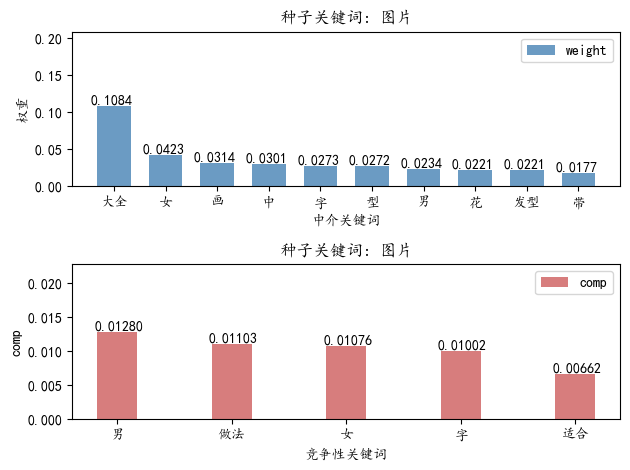

In [52]:
# 导入绘图模块
import matplotlib.pyplot as plt
import numpy as np

def get_agencywords(seedword):
    agencywords_list=[]
    agencywords_data = open('./seedwords_agencywords/agency_words/seedword_'+seedword+'.txt', encoding = 'utf-8')
    line_count = 0 
    for line in agencywords_data:
        data = line.split("||")  
        word = data[0][4:]
        if word == seedword:
            continue      #该关键词是种子关键词，则丢弃
        elif word_similarity(seedword,word):
            continue      #将相似度很高的词进行剔除
        agencywords_list.append(word)
        
        line_count += 1
        if line_count >= 10:
            break  # 达到10行后退出循环
    return agencywords_list
# 种子关键字选择
seedword = "图片"


comp_list = []
compkey_list = []

agencywords_list = []
weight_list = []

# 获取agencyword中介关键词和相应的权重
agencywords_list = get_agencywords(seedword)
for agencyword in agencywords_list:
        with open('./seedwords_agencywords/agency_words/seedword_'+seedword+'.txt', 'r', encoding='utf-8') as file:
            for record in file:
                info = record.split("||")
                if info[0][4:] == agencyword:
                    weight_value = float(info[2][8:])
                    weight_list.append(weight_value)
            

# 获取comp
with open('./comp/seedword_'+seedword+'.txt', 'r', encoding='utf-8') as file:
        count = 0
        for record in file:
            info = record.split("||")
            comp_list.append(float(info[1][5:]))
            compkey_list.append(info[0][6:])
            count += 1
            if count == 5:
                break

# 构建数据
bar_width = 0.65

# 中文乱码的处理
plt.rcParams['font.sans-serif'] =["KaiTi"]
plt.rcParams['axes.unicode_minus'] = False
plt.subplot(2, 1, 1)  # 2行1列的子图，选择第1个子图
# 绘图,先绘制中介词和权重的图像
plt.bar(np.arange(10), weight_list, label = 'weight', color = 'steelblue', alpha = 0.8, width = bar_width)

# 添加轴标签
plt.xlabel('中介关键词')
plt.ylabel('权重')
# 添加标题
plt.title("种子关键词: " + seedword  )
# 添加刻度标签
plt.xticks(np.arange(10),agencywords_list)
# 设置Y轴的刻度范围
plt.ylim([0, weight_list[0]+0.1])

# 为每个条形图添加数值标签
for i,weight in enumerate(weight_list):
    plt.text(i-bar_width+0.2, weight, '{:.4f}'.format(weight), va='bottom')

# 显示图例
plt.legend()



# 构建数据
bar_width = 0.35
plt.subplot(2, 1, 2)  # 2行1列的子图，选择第2个子图
plt.bar(np.arange(5), comp_list, label = 'comp', color = 'indianred', alpha = 0.8, width = bar_width)
# 添加轴标签
plt.xlabel('竞争性关键词')
plt.ylabel('comp')
# 添加标题
plt.title("种子关键词: " + seedword  )
# 添加刻度标签
plt.xticks(np.arange(5),compkey_list)
# 设置Y轴的刻度范围
plt.ylim([0, comp_list[0]+0.01])
for i,comp in enumerate(comp_list):
    plt.text(i-0.2, comp, '{:.5f}'.format(comp), va='bottom')

# 显示图例
plt.legend()

# 调整子图的间距
plt.tight_layout()
# 显示图形
plt.show()